In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)

In [2]:
data = pd.read_csv("ESGData.csv")

In [3]:
df = data.copy()
df = df.iloc[3266:]

In [4]:
df.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
3266,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,25.700000,27.250000,28.500000,30.000000,31.100000,32.45000,33.800000,35.4,NaN,NaN
3267,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,89.500000,71.500000,97.700000,97.700000,93.430878,97.70000,97.700000,97.7,NaN,NaN
3268,Afghanistan,AFG,Adjusted savings: natural resources depletion ...,NY.ADJ.DRES.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.288231,0.295242,0.355951,0.344837,0.397921,0.36222,0.381654,NaN,NaN,NaN


In [5]:
df = df.drop(columns=['Unnamed: 67'])

In [6]:
df.columns.tolist()

['Country Name',
 'Country Code',
 'Indicator Name',
 'Indicator Code',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022']

In [7]:
# Filter the data for specific 'Indicator Name' values
filtered_indicators = [
    'Life expectancy at birth, total (years)',  
    'GDP growth (annual %)',
    'Standardised Precipitation-Evapotranspiration Index'
]
df_filtered = df[df['Indicator Name'].isin(filtered_indicators)]

# Transpose the year columns and create a new DataFrame
df_formatted = pd.melt(df_filtered, 
                       id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                       var_name='Year', 
                       value_name='Value')

# Display the first few rows of the formatted DataFrame
df_formatted.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1960,NaN
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,32.53500
2,Afghanistan,AFG,Standardised Precipitation-Evapotranspiration ...,EN.CLC.SPEI.XD,1960,0.76152
3,Albania,ALB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1960,NaN
4,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,54.43900


In [8]:
# Splitting df_formatted into separate DataFrames for each Indicator Name
life_expectancy_df = df_formatted[df_formatted['Indicator Name'] == 'Life expectancy at birth, total (years)'][
    ['Country Name', 'Country Code', 'Year', 'Value']
].rename(columns={'Value': 'Life expectancy at birth, total (years)'})

gdp_growth_df = df_formatted[df_formatted['Indicator Name'] == 'GDP growth (annual %)'][
    ['Country Name', 'Country Code', 'Year', 'Value']
].rename(columns={'Value': 'GDP growth (annual %)'})

spei_df = df_formatted[df_formatted['Indicator Name'] == 'Standardised Precipitation-Evapotranspiration Index'][
    ['Country Name', 'Country Code', 'Year', 'Value']
].rename(columns={'Value': 'Standardised Precipitation-Evapotranspiration Index'})

# Merging the DataFrames on 'Country Name', 'Country Code', and 'Year' to combine them
merged_df = life_expectancy_df.merge(gdp_growth_df, on=['Country Name', 'Country Code', 'Year'], how='outer')\
                              .merge(spei_df, on=['Country Name', 'Country Code', 'Year'], how='outer')

# Display the first few rows of the final merged DataFrame
merged_df.head()

,Country Name,Country Code,Year,"Life expectancy at birth, total (years)",GDP growth (annual %),Standardised Precipitation-Evapotranspiration Index
0,Afghanistan,AFG,1960,32.535,NaN,0.761520
1,Albania,ALB,1960,54.439,NaN,1.341166
2,Algeria,DZA,1960,40.532,NaN,-0.304291
3,Andorra,AND,1960,NaN,NaN,1.628674
4,Angola,AGO,1960,38.211,NaN,1.592433


In [9]:
merged_df.loc[(merged_df['Country Name'] == 'Austria')].sort_values(by ='Year')

,Country Name,Country Code,Year,"Life expectancy at birth, total (years)",GDP growth (annual %),Standardised Precipitation-Evapotranspiration Index
9,Austria,AUT,1960,68.585610,NaN,0.817471
202,Austria,AUT,1961,69.577317,5.537979,-0.945359
395,Austria,AUT,1962,69.309512,2.648675,0.665004
588,Austria,AUT,1963,69.443659,4.138268,-1.061164
781,Austria,AUT,1964,69.921951,6.124354,0.193018
974,Austria,AUT,1965,69.722195,3.480175,1.981050
1167,Austria,AUT,1966,70.045854,5.642861,1.620247
1360,Austria,AUT,1967,69.917805,3.008048,-0.605576
1553,Austria,AUT,1968,70.057561,4.472313,-0.670223
1746,Austria,AUT,1969,69.833171,6.275867,-0.890059


In [10]:
# Selecting specified columns
selected_df_2 = merged_df[['Country Name', 'Country Code', 'Year', 'GDP growth (annual %)']].copy()

# Sorting by 'Country Name' and 'Year' to prepare for rolling calculations
selected_df_2 = selected_df_2.sort_values(by=['Country Name', 'Year'])

# Creating Moving Average and STD columns for the specified time frames (2, 3, 5, and 10 years)
# time_frames = [2, 3, 5, 10]
time_frames = [2, 3, 5, 10]
for window in time_frames:
    selected_df_2[f'GDP Moving_Avg_{window}Y'] = selected_df_2.groupby('Country Name')['GDP growth (annual %)'].transform(lambda x: x.rolling(window, min_periods=1).mean())
    # selected_df[f'STD_{window}Y'] = selected_df.groupby('Country Name')['Life expectancy at birth, total (years)'].transform(lambda x: x.rolling(window, min_periods=1).std())

# Displaying the first few rows of the updated DataFrame
selected_df_2.loc[selected_df_2['Country Name'] == 'Canada']

,Country Name,Country Code,Year,GDP growth (annual %),GDP Moving_Avg_2Y,GDP Moving_Avg_3Y,GDP Moving_Avg_5Y,GDP Moving_Avg_10Y
31,Canada,CAN,1960,NaN,NaN,NaN,NaN,NaN
224,Canada,CAN,1961,3.163292,3.163292,3.163292,3.163292,3.163292
417,Canada,CAN,1962,7.425385,5.294338,5.294338,5.294338,5.294338
610,Canada,CAN,1963,5.349546,6.387466,5.312741,5.312741,5.312741
803,Canada,CAN,1964,6.642894,5.996220,6.472609,5.645279,5.645279
996,Canada,CAN,1965,6.316714,6.479804,6.103052,5.779566,5.779566
1189,Canada,CAN,1966,6.704992,6.510853,6.554867,6.487906,5.933804
1382,Canada,CAN,1967,3.091206,4.898099,5.370971,5.621071,5.527718
1575,Canada,CAN,1968,4.995667,4.043436,4.930621,5.550295,5.461212
1768,Canada,CAN,1969,5.045456,5.020561,4.377443,5.230807,5.415017


In [11]:
selected_df_2.columns.tolist()

['Country Name',
 'Country Code',
 'Year',
 'GDP growth (annual %)',
 'GDP Moving_Avg_2Y',
 'GDP Moving_Avg_3Y',
 'GDP Moving_Avg_5Y',
 'GDP Moving_Avg_10Y']

In [12]:
selected_df_2['Year'] = selected_df_2['Year'].astype(int)

In [13]:
selected_df_2

,Country Name,Country Code,Year,GDP growth (annual %),GDP Moving_Avg_2Y,GDP Moving_Avg_3Y,GDP Moving_Avg_5Y,GDP Moving_Avg_10Y
0,Afghanistan,AFG,1960,NaN,NaN,NaN,NaN,NaN
193,Afghanistan,AFG,1961,NaN,NaN,NaN,NaN,NaN
386,Afghanistan,AFG,1962,NaN,NaN,NaN,NaN,NaN
579,Afghanistan,AFG,1963,NaN,NaN,NaN,NaN,NaN
772,Afghanistan,AFG,1964,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
11386,Zimbabwe,ZWE,2018,5.009867,4.545065,3.330362,2.699856,8.053271
11579,Zimbabwe,ZWE,2019,-6.332446,-0.661290,0.919228,1.136458,6.218071
11772,Zimbabwe,ZWE,2020,-7.816951,-7.074699,-3.046510,-0.831662,3.291170
11965,Zimbabwe,ZWE,2021,8.468017,0.325533,-1.893793,0.681750,2.675951


In [14]:
selected_df_2['Country Name'].nunique()

193

In [15]:
selected_df_2.columns.tolist()

['Country Name',
 'Country Code',
 'Year',
 'GDP growth (annual %)',
 'GDP Moving_Avg_2Y',
 'GDP Moving_Avg_3Y',
 'GDP Moving_Avg_5Y',
 'GDP Moving_Avg_10Y']

## Training and testing the model for indicator 2

In [16]:
!pip install scikit-learn

In [17]:
import logging
from sklearn.ensemble import RandomForestRegressor

# Define year variables for training and prediction
TRAIN_START_YEAR = 1990
TRAIN_END_YEAR = 2009
PREDICTION_START_YEAR = 2010
PREDICTION_END_YEAR = 2019

# Setting up logging configuration
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

# Splitting data into training (2000-2019) set and setting up prediction years
train_df_2 = selected_df_2[(selected_df_2['Year'] >= TRAIN_START_YEAR) & (selected_df_2['Year'] <= TRAIN_END_YEAR)].dropna(subset=['GDP growth (annual %)'])
prediction_years = range(PREDICTION_START_YEAR, PREDICTION_END_YEAR + 1)

# Preparing training data for the model
X_train = train_df_2[['Year', 'GDP Moving_Avg_2Y', 'GDP Moving_Avg_3Y', 'GDP Moving_Avg_5Y', 'GDP Moving_Avg_10Y']].values
y_train = train_df_2['GDP growth (annual %)'].values

# Initializing and training the Random Forest model on all training data
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
logger.info(f"Model trained on all countries' data ({TRAIN_START_YEAR}-{TRAIN_END_YEAR}). Starting recursive forecasting.")

# Dictionary to store predictions for each country
country_recursive_predictions_rf = {}

# Recursive forecasting for each country separately with detailed logging
for country in train_df_2['Country Name'].unique():
    logger.info(f"Processing country: {country}")

    # Get the last available data point for the country to start recursive prediction
    country_data = train_df_2[train_df_2['Country Name'] == country].iloc[-1].copy()
    predictions_per_country = {country_data['Year']: country_data['GDP growth (annual %)']}

    # Recursive prediction loop from PREDICTION_START_YEAR to PREDICTION_END_YEAR
    for year in prediction_years:
        country_data['Year'] = year
        
        # Logging the input data used for this prediction
        logger.info(f"Prediction inputs for {country} in {year}: Year={year}, "
                    f"GDP Moving_Avg_2Y={country_data['GDP Moving_Avg_2Y']}, "
                    f"GDP Moving_Avg_3Y={country_data['GDP Moving_Avg_3Y']}, "
                    f"GDP Moving_Avg_5Y={country_data['GDP Moving_Avg_5Y']}, "
                    f"GDP Moving_Avg_10Y={country_data['GDP Moving_Avg_10Y']}")
        
        # Preparing the features for the current prediction
        X_test = country_data[['Year', 'GDP Moving_Avg_2Y', 'GDP Moving_Avg_3Y', 'GDP Moving_Avg_5Y', 'GDP Moving_Avg_10Y']].values.reshape(1, -1)
        
        # Predicting life expectancy for the current year
        predicted_value = model_rf.predict(X_test)[0]
        logger.info(f"Predicted value for {country} in {year}: {predicted_value}")
        
        # Update the prediction in the dictionary
        predictions_per_country[year] = predicted_value
        
        # Update the features for the next prediction year based on the new prediction
        country_data['GDP growth (annual %)'] = predicted_value
        country_data['GDP Moving_Avg_2Y'] = (predictions_per_country.get(year - 1, predicted_value) + predicted_value) / 2
        country_data['GDP Moving_Avg_3Y'] = (predictions_per_country.get(year - 2, predicted_value) +
                                         predictions_per_country.get(year - 1, predicted_value) + predicted_value) / 3
        country_data['GDP Moving_Avg_5Y'] = (sum(predictions_per_country.get(y, predicted_value) for y in range(year - 4, year + 1)) / 5)
        country_data['GDP Moving_Avg_10Y'] = (sum(predictions_per_country.get(y, predicted_value) for y in range(year - 9, year + 1)) / 10)

    # Store the predictions for the country
    country_recursive_predictions_rf[country] = predictions_per_country


2024-11-11 16:55:18,861 - INFO - Model trained on all countries' data (1990-2009). Starting recursive forecasting.
2024-11-11 16:55:18,861 - INFO - Processing country: Afghanistan
2024-11-11 16:55:18,861 - INFO - Prediction inputs for Afghanistan in 2010: Year=2010, GDP Moving_Avg_2Y=12.657756107361166, GDP Moving_Avg_3Y=13.047277254232876, GDP Moving_Avg_5Y=11.145789967521008, GDP Moving_Avg_10Y=9.425049375832932
2024-11-11 16:55:18,876 - INFO - Predicted value for Afghanistan in 2010: 17.897580219731584
2024-11-11 16:55:18,877 - INFO - Prediction inputs for Afghanistan in 2011: Year=2011, GDP Moving_Avg_2Y=19.644054306419093, GDP Moving_Avg_3Y=19.061896277523257, GDP Moving_Avg_5Y=18.596169854406586, GDP Moving_Avg_10Y=18.246875037069085
2024-11-11 16:55:18,882 - INFO - Predicted value for Afghanistan in 2011: 16.915936135391174
2024-11-11 16:55:18,883 - INFO - Prediction inputs for Afghanistan in 2012: Year=2012, GDP Moving_Avg_2Y=17.40675817756138, GDP Moving_Avg_3Y=18.734681582743

2024-11-11 16:55:19,035 - INFO - Predicted value for Algeria in 2014: -0.8565582978608848
2024-11-11 16:55:19,035 - INFO - Prediction inputs for Algeria in 2015: Year=2015, GDP Moving_Avg_2Y=-0.4382749461888333, GDP Moving_Avg_3Y=-0.9275880362476792, GDP Moving_Avg_5Y=-0.6791218117613026, GDP Moving_Avg_10Y=-0.5221842249874192
2024-11-11 16:55:19,052 - INFO - Predicted value for Algeria in 2015: -0.16076347246850614
2024-11-11 16:55:19,052 - INFO - Prediction inputs for Algeria in 2016: Year=2016, GDP Moving_Avg_2Y=-0.5086608851646954, GDP Moving_Avg_3Y=-0.3457711216153909, GDP Moving_Avg_5Y=-0.9214459802524549, GDP Moving_Avg_10Y=-0.24386629483046773
2024-11-11 16:55:19,052 - INFO - Predicted value for Algeria in 2016: -1.0908010040495126
2024-11-11 16:55:19,052 - INFO - Prediction inputs for Algeria in 2017: Year=2017, GDP Moving_Avg_2Y=-0.6257822382590094, GDP Moving_Avg_3Y=-0.7027075914596345, GDP Moving_Avg_5Y=-0.8068657170522112, GDP Moving_Avg_10Y=-0.5228775543047697
2024-11-11 

2024-11-11 16:55:19,219 - INFO - Predicted value for Angola in 2019: -1.551427395780624
2024-11-11 16:55:19,219 - INFO - Processing country: Antigua and Barbuda
2024-11-11 16:55:19,219 - INFO - Prediction inputs for Antigua and Barbuda in 2010: Year=2010, GDP Moving_Avg_2Y=-5.988518950388948, GDP Moving_Avg_3Y=-0.8872182457934569, GDP Moving_Avg_5Y=3.304065022362651, GDP Moving_Avg_10Y=3.1046767162894287
2024-11-11 16:55:19,236 - INFO - Predicted value for Antigua and Barbuda in 2010: -11.239791663022922
2024-11-11 16:55:19,236 - INFO - Prediction inputs for Antigua and Barbuda in 2011: Year=2011, GDP Moving_Avg_2Y=-11.601244455928612, GDP Moving_Avg_3Y=-11.480760191626715, GDP Moving_Avg_5Y=-11.384372780185199, GDP Moving_Avg_10Y=-11.312082221604062
2024-11-11 16:55:19,236 - INFO - Predicted value for Antigua and Barbuda in 2011: -11.074077878058418
2024-11-11 16:55:19,236 - INFO - Prediction inputs for Antigua and Barbuda in 2012: Year=2012, GDP Moving_Avg_2Y=-11.15693477054067, GDP 

2024-11-11 16:55:19,392 - INFO - Predicted value for Armenia in 2013: -6.0745328177755775
2024-11-11 16:55:19,392 - INFO - Prediction inputs for Armenia in 2014: Year=2014, GDP Moving_Avg_2Y=-9.751617552996471, GDP Moving_Avg_3Y=-9.792612649192197, GDP Moving_Avg_5Y=-11.108476447999001, GDP Moving_Avg_10Y=-8.59150463288729
2024-11-11 16:55:19,403 - INFO - Predicted value for Armenia in 2014: -12.898738441505106
2024-11-11 16:55:19,404 - INFO - Prediction inputs for Armenia in 2015: Year=2015, GDP Moving_Avg_2Y=-9.486635629640341, GDP Moving_Avg_3Y=-10.800657849166015, GDP Moving_Avg_5Y=-10.868224136160062, GDP Moving_Avg_10Y=-12.003607444752054
2024-11-11 16:55:19,409 - INFO - Predicted value for Armenia in 2015: -12.66035444931327
2024-11-11 16:55:19,409 - INFO - Prediction inputs for Armenia in 2016: Year=2016, GDP Moving_Avg_2Y=-12.779546445409188, GDP Moving_Avg_3Y=-10.544541902864651, GDP Moving_Avg_5Y=-10.987386167678993, GDP Moving_Avg_10Y=-11.908253847875319
2024-11-11 16:55:19

2024-11-11 16:55:19,568 - INFO - Predicted value for Austria in 2018: -0.2442138214712949
2024-11-11 16:55:19,569 - INFO - Prediction inputs for Austria in 2019: Year=2019, GDP Moving_Avg_2Y=-0.3680258897097684, GDP Moving_Avg_3Y=-0.7041366566864906, GDP Moving_Avg_5Y=-1.0062656509856711, GDP Moving_Avg_10Y=-1.2449693649894653
2024-11-11 16:55:19,575 - INFO - Predicted value for Austria in 2019: 0.464707249132639
2024-11-11 16:55:19,575 - INFO - Processing country: Azerbaijan
2024-11-11 16:55:19,575 - INFO - Prediction inputs for Azerbaijan in 2010: Year=2010, GDP Moving_Avg_2Y=10.027670902469655, GDP Moving_Avg_3Y=15.018447218835869, GDP Moving_Avg_5Y=21.503375952944143, GDP Moving_Avg_10Y=15.741789624032402
2024-11-11 16:55:19,575 - INFO - Predicted value for Azerbaijan in 2010: 8.54682930427741
2024-11-11 16:55:19,585 - INFO - Prediction inputs for Azerbaijan in 2011: Year=2011, GDP Moving_Avg_2Y=8.92159652437416, GDP Moving_Avg_3Y=8.796674117675243, GDP Moving_Avg_5Y=8.696736192316

2024-11-11 16:55:19,752 - INFO - Prediction inputs for Bahrain in 2013: Year=2013, GDP Moving_Avg_2Y=0.8135144510764745, GDP Moving_Avg_3Y=1.5379714241351516, GDP Moving_Avg_5Y=1.527852591482244, GDP Moving_Avg_10Y=1.0066576703187449
2024-11-11 16:55:19,758 - INFO - Predicted value for Bahrain in 2013: -2.3525492832620323
2024-11-11 16:55:19,759 - INFO - Prediction inputs for Bahrain in 2014: Year=2014, GDP Moving_Avg_2Y=-0.9335432670533932, GDP Moving_Avg_3Y=-0.24184012703636112, GDP Moving_Avg_5Y=0.9602501849987883, GDP Moving_Avg_10Y=-0.6961495491316219
2024-11-11 16:55:19,759 - INFO - Predicted value for Bahrain in 2014: -1.623848737106208
2024-11-11 16:55:19,759 - INFO - Prediction inputs for Bahrain in 2015: Year=2015, GDP Moving_Avg_2Y=-1.98819901018412, GDP Moving_Avg_3Y=-1.1636450904043316, GDP Moving_Avg_5Y=0.12750325040744293, GDP Moving_Avg_10Y=-0.33179927605370974
2024-11-11 16:55:19,771 - INFO - Predicted value for Bahrain in 2015: 0.019857639509035113
2024-11-11 16:55:19

2024-11-11 16:55:19,937 - INFO - Predicted value for Barbados in 2017: -0.2988341514889152
2024-11-11 16:55:19,937 - INFO - Prediction inputs for Barbados in 2018: Year=2018, GDP Moving_Avg_2Y=-1.1150304762873446, GDP Moving_Avg_3Y=-1.3201669658126478, GDP Moving_Avg_5Y=-0.48297368396161955, GDP Moving_Avg_10Y=-1.6270307500854906
2024-11-11 16:55:19,937 - INFO - Predicted value for Barbados in 2018: -0.35753043248204963
2024-11-11 16:55:19,937 - INFO - Prediction inputs for Barbados in 2019: Year=2019, GDP Moving_Avg_2Y=-0.32818229198548243, GDP Moving_Avg_3Y=-0.8625304616855797, GDP Moving_Avg_5Y=-0.9253360611362498, GDP Moving_Avg_10Y=-1.6329003781848042
2024-11-11 16:55:19,952 - INFO - Predicted value for Barbados in 2019: -0.3579819339078423
2024-11-11 16:55:19,952 - INFO - Processing country: Belarus
2024-11-11 16:55:19,952 - INFO - Prediction inputs for Belarus in 2010: Year=2010, GDP Moving_Avg_2Y=5.199997374779171, GDP Moving_Avg_3Y=6.333333761935481, GDP Moving_Avg_5Y=7.679999

2024-11-11 16:55:20,125 - INFO - Predicted value for Belize in 2012: -0.42268936510694977
2024-11-11 16:55:20,125 - INFO - Prediction inputs for Belize in 2013: Year=2013, GDP Moving_Avg_2Y=-0.21176497551674403, GDP Moving_Avg_3Y=-0.5952574232678008, GDP Moving_Avg_5Y=-0.5321659831821766, GDP Moving_Avg_10Y=-0.4774276741445632
2024-11-11 16:55:20,125 - INFO - Predicted value for Belize in 2013: -0.929075012294269
2024-11-11 16:55:20,125 - INFO - Prediction inputs for Belize in 2014: Year=2014, GDP Moving_Avg_2Y=-0.6758821887006095, GDP Moving_Avg_3Y=-0.45086832110925235, GDP Moving_Avg_5Y=-0.6334431126196405, GDP Moving_Avg_10Y=-0.7812590624569549
2024-11-11 16:55:20,140 - INFO - Predicted value for Belize in 2014: -1.2699802755119014
2024-11-11 16:55:20,141 - INFO - Prediction inputs for Belize in 2015: Year=2015, GDP Moving_Avg_2Y=-1.0995276439030852, GDP Moving_Avg_3Y=-0.8739148843043735, GDP Moving_Avg_5Y=-0.7969655115219145, GDP Moving_Avg_10Y=-0.9517116940657712
2024-11-11 16:55:

2024-11-11 16:55:20,292 - INFO - Prediction inputs for Bhutan in 2018: Year=2018, GDP Moving_Avg_2Y=2.9644732807042615, GDP Moving_Avg_3Y=3.174385772785392, GDP Moving_Avg_5Y=3.74566749013655, GDP Moving_Avg_10Y=4.401689981077988
2024-11-11 16:55:20,292 - INFO - Predicted value for Bhutan in 2018: 1.4369581400855949
2024-11-11 16:55:20,302 - INFO - Prediction inputs for Bhutan in 2019: Year=2019, GDP Moving_Avg_2Y=1.9697648658096045, GDP Moving_Avg_3Y=2.4553015671647063, GDP Moving_Avg_5Y=3.0917913013425093, GDP Moving_Avg_10Y=4.295128635933184
2024-11-11 16:55:20,304 - INFO - Predicted value for Bhutan in 2019: 1.1171450859593357
2024-11-11 16:55:20,304 - INFO - Processing country: Bolivia
2024-11-11 16:55:20,304 - INFO - Prediction inputs for Bolivia in 2010: Year=2010, GDP Moving_Avg_2Y=4.752748724463645, GDP Moving_Avg_3Y=4.689960572602054, GDP Moving_Avg_5Y=4.657664733649324, GDP Moving_Avg_10Y=3.68501347684672
2024-11-11 16:55:20,304 - INFO - Predicted value for Bolivia in 2010: 

2024-11-11 16:55:20,460 - INFO - Predicted value for Botswana in 2011: -12.639499416825226
2024-11-11 16:55:20,460 - INFO - Prediction inputs for Botswana in 2012: Year=2012, GDP Moving_Avg_2Y=-12.129302644412583, GDP Moving_Avg_3Y=-12.800946635055821, GDP Moving_Avg_5Y=-12.736367747763582, GDP Moving_Avg_10Y=-12.687933582294406
2024-11-11 16:55:20,469 - INFO - Predicted value for Botswana in 2012: -5.664817219893414
2024-11-11 16:55:20,470 - INFO - Prediction inputs for Botswana in 2013: Year=2013, GDP Moving_Avg_2Y=-9.15215831835932, GDP Moving_Avg_3Y=-9.97447416957286, GDP Moving_Avg_5Y=-9.946494868990857, GDP Moving_Avg_10Y=-7.805656044442136
2024-11-11 16:55:20,475 - INFO - Predicted value for Botswana in 2013: -12.877245933342703
2024-11-11 16:55:20,475 - INFO - Prediction inputs for Botswana in 2014: Year=2014, GDP Moving_Avg_2Y=-9.271031576618059, GDP Moving_Avg_3Y=-10.393854190020447, GDP Moving_Avg_5Y=-11.388980611680717, GDP Moving_Avg_10Y=-12.13311327251171
2024-11-11 16:55

2024-11-11 16:55:20,626 - INFO - Prediction inputs for Brunei Darussalam in 2016: Year=2016, GDP Moving_Avg_2Y=-1.029762648736538, GDP Moving_Avg_3Y=-1.2014666450434286, GDP Moving_Avg_5Y=-0.5353571140328843, GDP Moving_Avg_10Y=-0.7187154718883031
2024-11-11 16:55:20,636 - INFO - Predicted value for Brunei Darussalam in 2016: -0.9154685508289778
2024-11-11 16:55:20,636 - INFO - Prediction inputs for Brunei Darussalam in 2017: Year=2017, GDP Moving_Avg_2Y=-0.6267176817225321, GDP Moving_Avg_3Y=-0.9916646161006847, GDP Moving_Avg_5Y=-0.8641125419291267, GDP Moving_Avg_10Y=-0.8919659933521705
2024-11-11 16:55:20,642 - INFO - Predicted value for Brunei Darussalam in 2017: 0.4027114448946167
2024-11-11 16:55:20,642 - INFO - Prediction inputs for Brunei Darussalam in 2018: Year=2018, GDP Moving_Avg_2Y=-0.2563785529671806, GDP Moving_Avg_3Y=-0.2835746395168158, GDP Moving_Avg_5Y=-0.8234314082129295, GDP Moving_Avg_10Y=-0.6283299942074516
2024-11-11 16:55:20,642 - INFO - Predicted value for Br

2024-11-11 16:55:20,791 - INFO - Prediction inputs for Burundi in 2010: Year=2010, GDP Moving_Avg_2Y=4.337230866730294, GDP Moving_Avg_3Y=4.042136765760007, GDP Moving_Avg_5Y=3.6880434886192743, GDP Moving_Avg_10Y=2.769560971313271
2024-11-11 16:55:20,791 - INFO - Predicted value for Burundi in 2010: 3.8765419573648843
2024-11-11 16:55:20,791 - INFO - Prediction inputs for Burundi in 2011: Year=2011, GDP Moving_Avg_2Y=3.844643661849532, GDP Moving_Avg_3Y=3.855276427021316, GDP Moving_Avg_5Y=3.8637826391587438, GDP Moving_Avg_10Y=3.870162298261814
2024-11-11 16:55:20,805 - INFO - Predicted value for Burundi in 2011: 1.8328412526170046
2024-11-11 16:55:20,805 - INFO - Prediction inputs for Burundi in 2012: Year=2012, GDP Moving_Avg_2Y=2.8546916049909443, GDP Moving_Avg_3Y=3.174042858772023, GDP Moving_Avg_5Y=2.6375622163100156, GDP Moving_Avg_10Y=2.23520173446351
2024-11-11 16:55:20,808 - INFO - Predicted value for Burundi in 2012: 2.2927735932475315
2024-11-11 16:55:20,808 - INFO - Pred

2024-11-11 16:55:20,958 - INFO - Predicted value for Cambodia in 2014: -0.755806215720016
2024-11-11 16:55:20,958 - INFO - Prediction inputs for Cambodia in 2015: Year=2015, GDP Moving_Avg_2Y=-0.958170674431577, GDP Moving_Avg_3Y=-0.8127916799159914, GDP Moving_Avg_5Y=-0.8007207017597577, GDP Moving_Avg_10Y=-0.6940131412408241
2024-11-11 16:55:20,970 - INFO - Predicted value for Cambodia in 2015: -0.9199941948853823
2024-11-11 16:55:20,970 - INFO - Prediction inputs for Cambodia in 2016: Year=2016, GDP Moving_Avg_2Y=-0.8379002053026992, GDP Moving_Avg_3Y=-0.945445181249512, GDP Moving_Avg_5Y=-1.0652484757358187, GDP Moving_Avg_10Y=-0.7596883329069707
2024-11-11 16:55:20,975 - INFO - Predicted value for Cambodia in 2016: 0.4648166451402458
2024-11-11 16:55:20,975 - INFO - Prediction inputs for Cambodia in 2017: Year=2017, GDP Moving_Avg_2Y=-0.22758877487256823, GDP Moving_Avg_3Y=-0.40366125515505086, GDP Moving_Avg_5Y=-0.5787105178986222, GDP Moving_Avg_10Y=-0.3442450808992823
2024-11-1

2024-11-11 16:55:21,126 - INFO - Predicted value for Canada in 2019: -0.6285072840022814
2024-11-11 16:55:21,126 - INFO - Processing country: Central African Republic
2024-11-11 16:55:21,126 - INFO - Prediction inputs for Central African Republic in 2010: Year=2010, GDP Moving_Avg_2Y=5.320695694207395, GDP Moving_Avg_3Y=5.082975414311681, GDP Moving_Avg_5Y=4.185644437649609, GDP Moving_Avg_10Y=2.711746997530212
2024-11-11 16:55:21,135 - INFO - Predicted value for Central African Republic in 2010: 7.288827066659244
2024-11-11 16:55:21,136 - INFO - Prediction inputs for Central African Republic in 2011: Year=2011, GDP Moving_Avg_2Y=7.938043746534593, GDP Moving_Avg_3Y=7.721638186576143, GDP Moving_Avg_5Y=7.548513738609382, GDP Moving_Avg_10Y=7.418670402634312
2024-11-11 16:55:21,141 - INFO - Predicted value for Central African Republic in 2011: 7.5163162851648995
2024-11-11 16:55:21,141 - INFO - Prediction inputs for Central African Republic in 2012: Year=2012, GDP Moving_Avg_2Y=7.402571

2024-11-11 16:55:21,286 - INFO - Predicted value for Chile in 2013: -1.5999783754847625
2024-11-11 16:55:21,286 - INFO - Prediction inputs for Chile in 2014: Year=2014, GDP Moving_Avg_2Y=-0.7929554590278007, GDP Moving_Avg_3Y=-0.5191047968061387, GDP Moving_Avg_5Y=-0.8133821724199303, GDP Moving_Avg_10Y=-1.2066802739523463
2024-11-11 16:55:21,286 - INFO - Predicted value for Chile in 2014: -1.3924954912303626
2024-11-11 16:55:21,286 - INFO - Prediction inputs for Chile in 2015: Year=2015, GDP Moving_Avg_2Y=-1.4962369333575625, GDP Moving_Avg_3Y=-0.9928021364286547, GDP Moving_Avg_5Y=-0.8682738233802466, GDP Moving_Avg_10Y=-1.1029388318251463
2024-11-11 16:55:21,304 - INFO - Predicted value for Chile in 2015: -0.03500169203337975
2024-11-11 16:55:21,304 - INFO - Prediction inputs for Chile in 2016: Year=2016, GDP Moving_Avg_2Y=-0.7137485916318712, GDP Moving_Avg_3Y=-1.009158519582835, GDP Moving_Avg_5Y=-0.5969623147364318, GDP Moving_Avg_10Y=-0.5599413121463532
2024-11-11 16:55:21,304 -

2024-11-11 16:55:21,458 - INFO - Prediction inputs for Colombia in 2019: Year=2019, GDP Moving_Avg_2Y=-0.6624938098361214, GDP Moving_Avg_3Y=-0.8541031637901509, GDP Moving_Avg_5Y=-0.6481660569015875, GDP Moving_Avg_10Y=-0.49735731828629826
2024-11-11 16:55:21,472 - INFO - Predicted value for Colombia in 2019: 0.13592873271619207
2024-11-11 16:55:21,473 - INFO - Processing country: Comoros
2024-11-11 16:55:21,474 - INFO - Prediction inputs for Comoros in 2010: Year=2010, GDP Moving_Avg_2Y=3.6026759584932213, GDP Moving_Avg_3Y=2.6684647553139427, GDP Moving_Avg_5Y=2.6979795223532697, GDP Moving_Avg_10Y=3.301915963372017
2024-11-11 16:55:21,475 - INFO - Predicted value for Comoros in 2010: 2.737913447196105
2024-11-11 16:55:21,475 - INFO - Prediction inputs for Comoros in 2011: Year=2011, GDP Moving_Avg_2Y=2.9893270877321974, GDP Moving_Avg_3Y=2.905522540886833, GDP Moving_Avg_5Y=2.838478903410542, GDP Moving_Avg_10Y=2.788196175303323
2024-11-11 16:55:21,488 - INFO - Predicted value for 

2024-11-11 16:55:21,625 - INFO - Prediction inputs for Congo, Rep. in 2013: Year=2013, GDP Moving_Avg_2Y=9.327746430392994, GDP Moving_Avg_3Y=9.73518144582638, GDP Moving_Avg_5Y=10.111821679905878, GDP Moving_Avg_10Y=9.914048440190166
2024-11-11 16:55:21,625 - INFO - Predicted value for Congo, Rep. in 2013: 9.708006116685292
2024-11-11 16:55:21,625 - INFO - Prediction inputs for Congo, Rep. in 2014: Year=2014, GDP Moving_Avg_2Y=9.712140658579873, GDP Moving_Avg_3Y=9.454499659157094, GDP Moving_Avg_5Y=10.110167863148046, GDP Moving_Avg_10Y=9.90908698991667
2024-11-11 16:55:21,639 - INFO - Predicted value for Congo, Rep. in 2014: 10.12135374865144
2024-11-11 16:55:21,640 - INFO - Prediction inputs for Congo, Rep. in 2015: Year=2015, GDP Moving_Avg_2Y=9.914679932668367, GDP Moving_Avg_3Y=9.848545021937062, GDP Moving_Avg_5Y=9.806980840563174, GDP Moving_Avg_10Y=10.115760805899743
2024-11-11 16:55:21,646 - INFO - Predicted value for Congo, Rep. in 2015: 9.357655960328863
2024-11-11 16:55:2

2024-11-11 16:55:21,793 - INFO - Predicted value for Cote d'Ivoire in 2017: -1.9606709089899437
2024-11-11 16:55:21,802 - INFO - Prediction inputs for Cote d'Ivoire in 2018: Year=2018, GDP Moving_Avg_2Y=-2.0662087102949678, GDP Moving_Avg_3Y=-1.8586528202840338, GDP Moving_Avg_5Y=-0.5698737218906155, GDP Moving_Avg_10Y=0.8204334868247447
2024-11-11 16:55:21,808 - INFO - Predicted value for Cote d'Ivoire in 2018: -3.1032947660829597
2024-11-11 16:55:21,808 - INFO - Prediction inputs for Cote d'Ivoire in 2019: Year=2019, GDP Moving_Avg_2Y=-2.531982837536452, GDP Moving_Avg_3Y=-2.4119040622242984, GDP Moving_Avg_5Y=-1.5649145953286614, GDP Moving_Avg_10Y=0.706171101115443
2024-11-11 16:55:21,808 - INFO - Predicted value for Cote d'Ivoire in 2019: -2.8983596962082463
2024-11-11 16:55:21,808 - INFO - Processing country: Croatia
2024-11-11 16:55:21,808 - INFO - Prediction inputs for Croatia in 2010: Year=2010, GDP Moving_Avg_2Y=-2.595790369120625, GDP Moving_Avg_3Y=-0.07688763365384362, GDP 

2024-11-11 16:55:21,972 - INFO - Predicted value for Cyprus in 2012: -0.6862222792218369
2024-11-11 16:55:21,972 - INFO - Prediction inputs for Cyprus in 2013: Year=2013, GDP Moving_Avg_2Y=0.5731407802898976, GDP Moving_Avg_3Y=-0.27014514675611995, GDP Moving_Avg_5Y=-0.7023840157117732, GDP Moving_Avg_10Y=-0.6943031474668051
2024-11-11 16:55:21,987 - INFO - Predicted value for Cyprus in 2013: -1.6137341902509137
2024-11-11 16:55:21,987 - INFO - Prediction inputs for Cyprus in 2014: Year=2014, GDP Moving_Avg_2Y=-1.1499782347363752, GDP Moving_Avg_3Y=-0.1558175432237062, GDP Moving_Avg_5Y=-0.8878863979175886, GDP Moving_Avg_10Y=-1.2508102940842512
2024-11-11 16:55:22,002 - INFO - Predicted value for Cyprus in 2014: -1.4461922816381287
2024-11-11 16:55:22,003 - INFO - Prediction inputs for Cyprus in 2015: Year=2015, GDP Moving_Avg_2Y=-1.5299632359445212, GDP Moving_Avg_3Y=-1.248716250370293, GDP Moving_Avg_5Y=-0.7740723824314804, GDP Moving_Avg_10Y=-1.167039339777859
2024-11-11 16:55:22,0

2024-11-11 16:55:22,167 - INFO - Predicted value for Denmark in 2017: -0.3111039604376515
2024-11-11 16:55:22,167 - INFO - Prediction inputs for Denmark in 2018: Year=2018, GDP Moving_Avg_2Y=-0.35566596665115924, GDP Moving_Avg_3Y=-0.6661065213082048, GDP Moving_Avg_5Y=-0.736803283405583, GDP Moving_Avg_10Y=-1.3530475386010228
2024-11-11 16:55:22,174 - INFO - Predicted value for Denmark in 2018: -0.8354671362315496
2024-11-11 16:55:22,174 - INFO - Prediction inputs for Denmark in 2019: Year=2019, GDP Moving_Avg_2Y=-0.5732855483346005, GDP Moving_Avg_3Y=-0.5155996898446227, GDP Moving_Avg_5Y=-0.8173036829222049, GDP Moving_Avg_10Y=-1.4054838561804126
2024-11-11 16:55:22,181 - INFO - Predicted value for Denmark in 2019: -0.936163905340996
2024-11-11 16:55:22,181 - INFO - Processing country: Dominica
2024-11-11 16:55:22,187 - INFO - Prediction inputs for Dominica in 2010: Year=2010, GDP Moving_Avg_2Y=2.9757336712415148, GDP Moving_Avg_3Y=4.101479927311111, GDP Moving_Avg_5Y=3.523951507442

2024-11-11 16:55:22,338 - INFO - Predicted value for Ecuador in 2011: -2.3919903843696204
2024-11-11 16:55:22,339 - INFO - Prediction inputs for Ecuador in 2012: Year=2012, GDP Moving_Avg_2Y=-0.49578774856896723, GDP Moving_Avg_3Y=-0.1416946350126138, GDP Moving_Avg_5Y=-1.0418129347554166, GDP Moving_Avg_10Y=-1.7169016595625184
2024-11-11 16:55:22,345 - INFO - Predicted value for Ecuador in 2012: -0.8670457300865978
2024-11-11 16:55:22,345 - INFO - Prediction inputs for Ecuador in 2013: Year=2013, GDP Moving_Avg_2Y=-1.6295180572281092, GDP Moving_Avg_3Y=-0.6195404090748441, GDP Moving_Avg_5Y=-0.4318350730422075, GDP Moving_Avg_10Y=-0.6494404015644026
2024-11-11 16:55:22,350 - INFO - Predicted value for Ecuador in 2013: -1.064472817981166
2024-11-11 16:55:22,351 - INFO - Prediction inputs for Ecuador in 2014: Year=2014, GDP Moving_Avg_2Y=-0.9657592740338818, GDP Moving_Avg_3Y=-1.4411696441457948, GDP Moving_Avg_5Y=-0.471320490621121, GDP Moving_Avg_10Y=-0.7678966543011434
2024-11-11 16:

2024-11-11 16:55:22,506 - INFO - Prediction inputs for El Salvador in 2016: Year=2016, GDP Moving_Avg_2Y=-1.0038708299251338, GDP Moving_Avg_3Y=-1.037810370709987, GDP Moving_Avg_5Y=-0.5330735843294957, GDP Moving_Avg_10Y=-0.8732883060390062
2024-11-11 16:55:22,511 - INFO - Predicted value for El Salvador in 2016: -0.23536470388952263
2024-11-11 16:55:22,512 - INFO - Prediction inputs for El Salvador in 2017: Year=2017, GDP Moving_Avg_2Y=-0.4659837072149918, GDP Moving_Avg_3Y=-0.7477021212465967, GDP Moving_Avg_5Y=-0.9237843281949962, GDP Moving_Avg_10Y=-0.7349169040437247
2024-11-11 16:55:22,517 - INFO - Predicted value for El Salvador in 2017: -0.10719192143126455
2024-11-11 16:55:22,518 - INFO - Prediction inputs for El Salvador in 2018: Year=2018, GDP Moving_Avg_2Y=-0.1712783126603936, GDP Moving_Avg_3Y=-0.3463864452870828, GDP Moving_Avg_5Y=-0.6911975474901497, GDP Moving_Avg_10Y=-0.7092823475520731
2024-11-11 16:55:22,524 - INFO - Predicted value for El Salvador in 2018: -1.84622

2024-11-11 16:55:22,664 - INFO - Processing country: Estonia
2024-11-11 16:55:22,665 - INFO - Prediction inputs for Estonia in 2010: Year=2010, GDP Moving_Avg_2Y=-9.880527995053745, GDP Moving_Avg_3Y=-4.060638489879946, GDP Moving_Avg_5Y=1.4220189743916243, GDP Moving_Avg_10Y=4.437704444974358
2024-11-11 16:55:22,671 - INFO - Predicted value for Estonia in 2010: -14.928163333498425
2024-11-11 16:55:22,671 - INFO - Prediction inputs for Estonia in 2011: Year=2011, GDP Moving_Avg_2Y=-14.778609182960363, GDP Moving_Avg_3Y=-14.82846056647305, GDP Moving_Avg_5Y=-14.8683416732832, GDP Moving_Avg_10Y=-14.898252503390811
2024-11-11 16:55:22,678 - INFO - Predicted value for Estonia in 2011: -13.01466387006511
2024-11-11 16:55:22,679 - INFO - Prediction inputs for Estonia in 2012: Year=2012, GDP Moving_Avg_2Y=-13.971413601781768, GDP Moving_Avg_3Y=-14.19062741199528, GDP Moving_Avg_5Y=-13.72024199522321, GDP Moving_Avg_10Y=-13.36745293264416
2024-11-11 16:55:22,684 - INFO - Predicted value for E

2024-11-11 16:55:22,832 - INFO - Predicted value for Ethiopia in 2014: 8.162840055963077
2024-11-11 16:55:22,832 - INFO - Prediction inputs for Ethiopia in 2015: Year=2015, GDP Moving_Avg_2Y=8.053798091261855, GDP Moving_Avg_3Y=8.160267615712963, GDP Moving_Avg_5Y=8.270146664538512, GDP Moving_Avg_10Y=8.280464674437052
2024-11-11 16:55:22,848 - INFO - Predicted value for Ethiopia in 2015: 7.8503688249724295
2024-11-11 16:55:22,848 - INFO - Prediction inputs for Ethiopia in 2016: Year=2016, GDP Moving_Avg_2Y=8.006604440467754, GDP Moving_Avg_3Y=7.985988335832047, GDP Moving_Avg_5Y=8.092111196667712, GDP Moving_Avg_10Y=8.155476182040795
2024-11-11 16:55:22,848 - INFO - Predicted value for Ethiopia in 2016: 7.6998346760488126
2024-11-11 16:55:22,848 - INFO - Prediction inputs for Ethiopia in 2017: Year=2017, GDP Moving_Avg_2Y=7.775101750510621, GDP Moving_Avg_3Y=7.904347852328107, GDP Moving_Avg_5Y=8.006201269632026, GDP Moving_Avg_10Y=8.110315937363708
2024-11-11 16:55:22,848 - INFO - Pr

2024-11-11 16:55:22,989 - INFO - Predicted value for Finland in 2019: -0.6160703870482221
2024-11-11 16:55:22,989 - INFO - Processing country: France
2024-11-11 16:55:22,989 - INFO - Prediction inputs for France in 2010: Year=2010, GDP Moving_Avg_2Y=-1.3091839341861524, GDP Moving_Avg_3Y=-0.06454387499975149, GDP Moving_Avg_5Y=0.783782391284077, GDP Moving_Avg_10Y=1.4614747769622973
2024-11-11 16:55:22,989 - INFO - Predicted value for France in 2010: -2.705911334520037
2024-11-11 16:55:22,989 - INFO - Prediction inputs for France in 2011: Year=2011, GDP Moving_Avg_2Y=-2.789612581508173, GDP Moving_Avg_3Y=-2.761712165845461, GDP Moving_Avg_5Y=-2.7393918333152913, GDP Moving_Avg_10Y=-2.7226515839176644
2024-11-11 16:55:23,005 - INFO - Predicted value for France in 2011: 2.2473615177360147
2024-11-11 16:55:23,005 - INFO - Prediction inputs for France in 2012: Year=2012, GDP Moving_Avg_2Y=-0.22927490839201115, GDP Moving_Avg_3Y=-1.1106212150934438, GDP Moving_Avg_5Y=0.23257187803833945, GD

2024-11-11 16:55:23,160 - INFO - Predicted value for Gambia, The in 2014: 5.546822564072669
2024-11-11 16:55:23,161 - INFO - Prediction inputs for Gambia, The in 2015: Year=2015, GDP Moving_Avg_2Y=5.872217556640706, GDP Moving_Avg_3Y=5.719823656797886, GDP Moving_Avg_5Y=5.947593369074145, GDP Moving_Avg_10Y=5.8590981409498095
2024-11-11 16:55:23,166 - INFO - Predicted value for Gambia, The in 2015: 6.381389853336522
2024-11-11 16:55:23,167 - INFO - Prediction inputs for Gambia, The in 2016: Year=2016, GDP Moving_Avg_2Y=5.964106208704596, GDP Moving_Avg_3Y=6.041941655539311, GDP Moving_Avg_5Y=5.973732357484291, GDP Moving_Avg_10Y=6.192925056655351
2024-11-11 16:55:23,173 - INFO - Predicted value for Gambia, The in 2016: 5.655517406712774
2024-11-11 16:55:23,173 - INFO - Prediction inputs for Gambia, The in 2017: Year=2017, GDP Moving_Avg_2Y=6.0184536300246485, GDP Moving_Avg_3Y=5.861243274707323, GDP Moving_Avg_5Y=5.839275646088591, GDP Moving_Avg_10Y=5.975163322668227
2024-11-11 16:55:

2024-11-11 16:55:23,322 - INFO - Predicted value for Germany in 2019: 0.8084226184855932
2024-11-11 16:55:23,322 - INFO - Processing country: Ghana
2024-11-11 16:55:23,323 - INFO - Prediction inputs for Ghana in 2010: Year=2010, GDP Moving_Avg_2Y=6.9971429950344675, GDP Moving_Avg_3Y=6.113701698156574, GDP Moving_Avg_5Y=6.128204303840221, GDP Moving_Avg_10Y=5.364102141180313
2024-11-11 16:55:23,329 - INFO - Predicted value for Ghana in 2010: 5.989846389804461
2024-11-11 16:55:23,330 - INFO - Prediction inputs for Ghana in 2011: Year=2011, GDP Moving_Avg_2Y=5.41716672077761, GDP Moving_Avg_3Y=5.60805994378656, GDP Moving_Avg_5Y=5.760774522193721, GDP Moving_Avg_10Y=5.875310455999092
2024-11-11 16:55:23,336 - INFO - Predicted value for Ghana in 2011: 4.523433687336143
2024-11-11 16:55:23,337 - INFO - Prediction inputs for Ghana in 2012: Year=2012, GDP Moving_Avg_2Y=5.256640038570302, GDP Moving_Avg_3Y=5.119255709630455, GDP Moving_Avg_5Y=4.88092690071273, GDP Moving_Avg_10Y=4.70218029402

2024-11-11 16:55:23,485 - INFO - Predicted value for Grenada in 2014: -0.8089963665722765
2024-11-11 16:55:23,486 - INFO - Prediction inputs for Grenada in 2015: Year=2015, GDP Moving_Avg_2Y=1.1527802936269542, GDP Moving_Avg_3Y=0.07953348047504342, GDP Moving_Avg_5Y=-2.0321197031749607, GDP Moving_Avg_10Y=-2.0009865330159355
2024-11-11 16:55:23,491 - INFO - Predicted value for Grenada in 2015: -1.4295594371770424
2024-11-11 16:55:23,492 - INFO - Prediction inputs for Grenada in 2016: Year=2016, GDP Moving_Avg_2Y=-1.1192779018746595, GDP Moving_Avg_3Y=0.29200038335895534, GDP Moving_Avg_5Y=-0.9979882178500661, GDP Moving_Avg_10Y=-2.249211761257842
2024-11-11 16:55:23,498 - INFO - Predicted value for Grenada in 2016: -0.6646509500111115
2024-11-11 16:55:23,499 - INFO - Prediction inputs for Grenada in 2017: Year=2017, GDP Moving_Avg_2Y=-1.047105193594077, GDP Moving_Avg_3Y=-0.9677355845868102, GDP Moving_Avg_5Y=-0.37112198915260475, GDP Moving_Avg_10Y=-2.0197392151080633
2024-11-11 16:5

2024-11-11 16:55:23,661 - INFO - Predicted value for Guinea in 2019: -0.10861466862206673
2024-11-11 16:55:23,661 - INFO - Processing country: Guinea-Bissau
2024-11-11 16:55:23,663 - INFO - Prediction inputs for Guinea-Bissau in 2010: Year=2010, GDP Moving_Avg_2Y=3.286271132332405, GDP Moving_Avg_3Y=3.2784992402492414, GDP Moving_Avg_5Y=3.2821909299699454, GDP Moving_Avg_10Y=2.6371583473002116
2024-11-11 16:55:23,669 - INFO - Predicted value for Guinea-Bissau in 2010: 3.0544998284789178
2024-11-11 16:55:23,669 - INFO - Prediction inputs for Guinea-Bissau in 2011: Year=2011, GDP Moving_Avg_2Y=3.2117373931053788, GDP Moving_Avg_3Y=3.159324871563225, GDP Moving_Avg_5Y=3.1173948543295023, GDP Moving_Avg_10Y=3.08594734140421
2024-11-11 16:55:23,669 - INFO - Predicted value for Guinea-Bissau in 2011: 2.8108149093640034
2024-11-11 16:55:23,669 - INFO - Prediction inputs for Guinea-Bissau in 2012: Year=2012, GDP Moving_Avg_2Y=2.9326573689214603, GDP Moving_Avg_3Y=3.078096565191587, GDP Moving_

2024-11-11 16:55:23,830 - INFO - Predicted value for Haiti in 2014: 1.544449795615707
2024-11-11 16:55:23,830 - INFO - Prediction inputs for Haiti in 2015: Year=2015, GDP Moving_Avg_2Y=2.365109866727108, GDP Moving_Avg_3Y=3.0908502944834666, GDP Moving_Avg_5Y=3.862510235693769, GDP Moving_Avg_10Y=3.1380729309374833
2024-11-11 16:55:23,836 - INFO - Predicted value for Haiti in 2015: 0.9562603931509075
2024-11-11 16:55:23,836 - INFO - Prediction inputs for Haiti in 2016: Year=2016, GDP Moving_Avg_2Y=1.2503550943833073, GDP Moving_Avg_3Y=1.8954933755350414, GDP Moving_Avg_5Y=3.072165245937742, GDP Moving_Avg_10Y=2.902797169951563
2024-11-11 16:55:23,836 - INFO - Predicted value for Haiti in 2016: -0.9085225167502631
2024-11-11 16:55:23,836 - INFO - Prediction inputs for Haiti in 2017: Year=2017, GDP Moving_Avg_2Y=0.02386893820032221, GDP Moving_Avg_3Y=0.5307292240054505, GDP Moving_Avg_5Y=1.8640577519702088, GDP Moving_Avg_10Y=2.343362296981212
2024-11-11 16:55:23,853 - INFO - Predicted v

2024-11-11 16:55:24,004 - INFO - Predicted value for Hungary in 2019: 0.6612802531609431
2024-11-11 16:55:24,004 - INFO - Processing country: Iceland
2024-11-11 16:55:24,004 - INFO - Prediction inputs for Iceland in 2010: Year=2010, GDP Moving_Avg_2Y=-2.727156570719244, GDP Moving_Avg_3Y=1.0001823182303398, GDP Moving_Avg_5Y=3.088395801279578, GDP Moving_Avg_10Y=3.494512629954909
2024-11-11 16:55:24,004 - INFO - Predicted value for Iceland in 2010: -6.358702464543034
2024-11-11 16:55:24,018 - INFO - Prediction inputs for Iceland in 2011: Year=2011, GDP Moving_Avg_2Y=-7.011256012401252, GDP Moving_Avg_3Y=-6.793738163115179, GDP Moving_Avg_5Y=-6.619723883686321, GDP Moving_Avg_10Y=-6.489213174114679
2024-11-11 16:55:24,024 - INFO - Predicted value for Iceland in 2011: -4.620919794253823
2024-11-11 16:55:24,024 - INFO - Prediction inputs for Iceland in 2012: Year=2012, GDP Moving_Avg_2Y=-5.489811129398429, GDP Moving_Avg_3Y=-6.214477273018776, GDP Moving_Avg_5Y=-5.577054281512796, GDP Mov

2024-11-11 16:55:24,170 - INFO - Predicted value for Indonesia in 2014: 1.3751722675107976
2024-11-11 16:55:24,170 - INFO - Prediction inputs for Indonesia in 2015: Year=2015, GDP Moving_Avg_2Y=2.045630041524365, GDP Moving_Avg_3Y=2.5255600718502387, GDP Moving_Avg_5Y=3.1674896347749097, GDP Moving_Avg_10Y=2.5967008426479268
2024-11-11 16:55:24,186 - INFO - Predicted value for Indonesia in 2015: 0.16746885385869
2024-11-11 16:55:24,187 - INFO - Prediction inputs for Indonesia in 2016: Year=2016, GDP Moving_Avg_2Y=0.7713205606847438, GDP Moving_Avg_3Y=1.4195763123024732, GDP Moving_Avg_5Y=2.300688175630461, GDP Moving_Avg_10Y=2.1136194771870835
2024-11-11 16:55:24,191 - INFO - Predicted value for Indonesia in 2016: -1.9399667967351117
2024-11-11 16:55:24,191 - INFO - Prediction inputs for Indonesia in 2017: Year=2017, GDP Moving_Avg_2Y=-0.8862489714382109, GDP Moving_Avg_3Y=-0.1324418917885414, GDP Moving_Avg_5Y=1.1608364545348588, GDP Moving_Avg_10Y=1.4813887820089433
2024-11-11 16:55:

2024-11-11 16:55:24,387 - INFO - Prediction inputs for Iraq in 2019: Year=2019, GDP Moving_Avg_2Y=-3.3314769936841664, GDP Moving_Avg_3Y=-2.8229538442378654, GDP Moving_Avg_5Y=-2.0438146628845955, GDP Moving_Avg_10Y=0.46314223213791256
2024-11-11 16:55:24,387 - INFO - Predicted value for Iraq in 2019: -4.151237369953351
2024-11-11 16:55:24,387 - INFO - Processing country: Ireland
2024-11-11 16:55:24,387 - INFO - Prediction inputs for Ireland in 2010: Year=2010, GDP Moving_Avg_2Y=-4.789926623758944, GDP Moving_Avg_3Y=-1.4232450335331606, GDP Moving_Avg_5Y=1.291580108350242, GDP Moving_Avg_10Y=3.6868590139778
2024-11-11 16:55:24,403 - INFO - Predicted value for Ireland in 2010: -7.113960208668575
2024-11-11 16:55:24,404 - INFO - Prediction inputs for Ireland in 2011: Year=2011, GDP Moving_Avg_2Y=-6.104871481995873, GDP Moving_Avg_3Y=-6.441234390886773, GDP Moving_Avg_5Y=-6.710324717999494, GDP Moving_Avg_10Y=-6.912142463334034
2024-11-11 16:55:24,404 - INFO - Predicted value for Ireland 

2024-11-11 16:55:24,571 - INFO - Predicted value for Italy in 2013: -0.6043116889013281
2024-11-11 16:55:24,571 - INFO - Prediction inputs for Italy in 2014: Year=2014, GDP Moving_Avg_2Y=-2.7455862716724266, GDP Moving_Avg_3Y=-2.8692443799614913, GDP Moving_Avg_5Y=-4.384527215370328, GDP Moving_Avg_10Y=-2.4944194521358285
2024-11-11 16:55:24,571 - INFO - Predicted value for Italy in 2014: 1.8811146987379117
2024-11-11 16:55:24,571 - INFO - Prediction inputs for Italy in 2015: Year=2015, GDP Moving_Avg_2Y=0.6384015049182918, GDP Moving_Avg_3Y=-1.2033526148689806, GDP Moving_Avg_5Y=-2.952116833964126, GDP Moving_Avg_10Y=-1.251706258316208
2024-11-11 16:55:24,586 - INFO - Predicted value for Italy in 2015: -1.058496651310476
2024-11-11 16:55:24,587 - INFO - Prediction inputs for Italy in 2016: Year=2016, GDP Moving_Avg_2Y=0.4113090237137178, GDP Moving_Avg_3Y=0.0727687861753692, GDP Moving_Avg_5Y=-1.5570230184914073, GDP Moving_Avg_10Y=-2.427550798335564
2024-11-11 16:55:24,590 - INFO - P

2024-11-11 16:55:24,741 - INFO - Predicted value for Japan in 2018: -0.9418735048673897
2024-11-11 16:55:24,741 - INFO - Prediction inputs for Japan in 2019: Year=2019, GDP Moving_Avg_2Y=-0.717617491871013, GDP Moving_Avg_3Y=-0.5522619634652965, GDP Moving_Avg_5Y=-0.9614556198317192, GDP Moving_Avg_10Y=-1.4609781541982048
2024-11-11 16:55:24,741 - INFO - Predicted value for Japan in 2019: -0.45256342769728763
2024-11-11 16:55:24,741 - INFO - Processing country: Jordan
2024-11-11 16:55:24,752 - INFO - Prediction inputs for Jordan in 2010: Year=2010, GDP Moving_Avg_2Y=6.122048222764036, GDP Moving_Avg_3Y=6.80675546585818, GDP Moving_Avg_5Y=7.331967297298637, GDP Moving_Avg_10Y=6.468819570702671
2024-11-11 16:55:24,757 - INFO - Predicted value for Jordan in 2010: 4.6446289273336925
2024-11-11 16:55:24,758 - INFO - Prediction inputs for Jordan in 2011: Year=2011, GDP Moving_Avg_2Y=4.834169500030191, GDP Moving_Avg_3Y=4.770989309131358, GDP Moving_Avg_5Y=4.720445156412292, GDP Moving_Avg_10

2024-11-11 16:55:24,922 - INFO - Predicted value for Kenya in 2013: -1.8020399019298232
2024-11-11 16:55:24,923 - INFO - Prediction inputs for Kenya in 2014: Year=2014, GDP Moving_Avg_2Y=-1.4844853842128676, GDP Moving_Avg_3Y=-0.6503288316263874, GDP Moving_Avg_5Y=0.5963516715985747, GDP Moving_Avg_10Y=-0.6028441151656242
2024-11-11 16:55:24,924 - INFO - Predicted value for Kenya in 2014: -1.3455167274476876
2024-11-11 16:55:24,924 - INFO - Prediction inputs for Kenya in 2015: Year=2015, GDP Moving_Avg_2Y=-1.5737783146887554, GDP Moving_Avg_3Y=-1.4381624986244743, GDP Moving_Avg_5Y=-0.334139637153141, GDP Moving_Avg_10Y=-0.37458252792455654
2024-11-11 16:55:24,936 - INFO - Predicted value for Kenya in 2015: -0.7072971730586315
2024-11-11 16:55:24,937 - INFO - Prediction inputs for Kenya in 2016: Year=2016, GDP Moving_Avg_2Y=-1.0264069502531594, GDP Moving_Avg_3Y=-1.284951267478714, GDP Moving_Avg_5Y=-0.8007600790770961, GDP Moving_Avg_10Y=-0.11929470616893405
2024-11-11 16:55:24,940 - 

2024-11-11 16:55:25,091 - INFO - Predicted value for Korea, Rep. in 2018: -0.7295371403728685
2024-11-11 16:55:25,091 - INFO - Prediction inputs for Korea, Rep. in 2019: Year=2019, GDP Moving_Avg_2Y=-0.9622517351651575, GDP Moving_Avg_3Y=-0.3840214338804115, GDP Moving_Avg_5Y=-0.5829308912867681, GDP Moving_Avg_10Y=-0.581698418708416
2024-11-11 16:55:25,091 - INFO - Predicted value for Korea, Rep. in 2019: -1.7055988959861261
2024-11-11 16:55:25,091 - INFO - Processing country: Kuwait
2024-11-11 16:55:25,103 - INFO - Prediction inputs for Kuwait in 2010: Year=2010, GDP Moving_Avg_2Y=-2.298149743974335, GDP Moving_Avg_3Y=0.4650920075481597, GDP Moving_Avg_5Y=3.9038188013814983, GDP Moving_Avg_10Y=5.5007610082271166
2024-11-11 16:55:25,108 - INFO - Predicted value for Kuwait in 2010: -7.3512546251795765
2024-11-11 16:55:25,108 - INFO - Prediction inputs for Kuwait in 2011: Year=2011, GDP Moving_Avg_2Y=-7.213655527956844, GDP Moving_Avg_3Y=-7.259521893697754, GDP Moving_Avg_5Y=-7.29621498

2024-11-11 16:55:25,252 - INFO - Prediction inputs for Lao PDR in 2013: Year=2013, GDP Moving_Avg_2Y=7.930206397685337, GDP Moving_Avg_3Y=8.146920172743348, GDP Moving_Avg_5Y=8.00525592384017, GDP Moving_Avg_10Y=8.044500056103121
2024-11-11 16:55:25,252 - INFO - Predicted value for Lao PDR in 2013: 7.680514353367238
2024-11-11 16:55:25,252 - INFO - Prediction inputs for Lao PDR in 2014: Year=2014, GDP Moving_Avg_2Y=7.882129270866656, GDP Moving_Avg_3Y=7.8469757162459715, GDP Moving_Avg_5Y=7.924609956840402, GDP Moving_Avg_10Y=7.802562155103821
2024-11-11 16:55:25,252 - INFO - Predicted value for Lao PDR in 2014: 7.5488782696474255
2024-11-11 16:55:25,252 - INFO - Prediction inputs for Lao PDR in 2015: Year=2015, GDP Moving_Avg_2Y=7.614696311507332, GDP Moving_Avg_3Y=7.771045603793579, GDP Moving_Avg_5Y=7.934030628248941, GDP Moving_Avg_10Y=7.736744113243915
2024-11-11 16:55:25,267 - INFO - Predicted value for Lao PDR in 2015: 6.438521860179554
2024-11-11 16:55:25,267 - INFO - Predictio

2024-11-11 16:55:25,441 - INFO - Predicted value for Lebanon in 2018: 9.931350247604792
2024-11-11 16:55:25,441 - INFO - Prediction inputs for Lebanon in 2019: Year=2019, GDP Moving_Avg_2Y=9.822595813308855, GDP Moving_Avg_3Y=9.724194709691508, GDP Moving_Avg_5Y=9.77119169031033, GDP Moving_Avg_10Y=9.813937679919631
2024-11-11 16:55:25,441 - INFO - Predicted value for Lebanon in 2019: 9.565437842087572
2024-11-11 16:55:25,441 - INFO - Processing country: Lesotho
2024-11-11 16:55:25,441 - INFO - Prediction inputs for Lesotho in 2010: Year=2010, GDP Moving_Avg_2Y=2.1332567877713395, GDP Moving_Avg_3Y=2.8181426645129974, GDP Moving_Avg_5Y=3.2301290658150172, GDP Moving_Avg_10Y=3.0563761313395332
2024-11-11 16:55:25,456 - INFO - Predicted value for Lesotho in 2010: -0.518876165498187
2024-11-11 16:55:25,457 - INFO - Prediction inputs for Lesotho in 2011: Year=2011, GDP Moving_Avg_2Y=-0.8871953956121135, GDP Moving_Avg_3Y=-0.7644223189074714, GDP Moving_Avg_5Y=-0.6662038575437575, GDP Movin

2024-11-11 16:55:25,621 - INFO - Predicted value for Libya in 2013: -0.5334988273720337
2024-11-11 16:55:25,622 - INFO - Prediction inputs for Libya in 2014: Year=2014, GDP Moving_Avg_2Y=0.3177269227279898, GDP Moving_Avg_3Y=-0.02723632614104447, GDP Moving_Avg_5Y=-1.908140046477565, GDP Moving_Avg_10Y=-1.2208194369247996
2024-11-11 16:55:25,624 - INFO - Predicted value for Libya in 2014: -1.343938343131377
2024-11-11 16:55:25,624 - INFO - Prediction inputs for Libya in 2015: Year=2015, GDP Moving_Avg_2Y=-0.9387185852517053, GDP Moving_Avg_3Y=-0.23616149922513244, GDP Moving_Avg_5Y=-1.2968913624834209, GDP Moving_Avg_10Y=-1.626039194804471
2024-11-11 16:55:25,624 - INFO - Predicted value for Libya in 2015: -1.2183433750048678
2024-11-11 16:55:25,635 - INFO - Prediction inputs for Libya in 2016: Year=2016, GDP Moving_Avg_2Y=-1.2811408590681224, GDP Moving_Avg_3Y=-1.0319268485027593, GDP Moving_Avg_5Y=-0.5287981393118756, GDP Moving_Avg_10Y=-1.5758012075538672
2024-11-11 16:55:25,641 - I

2024-11-11 16:55:25,787 - INFO - Prediction inputs for Lithuania in 2018: Year=2018, GDP Moving_Avg_2Y=1.8211391101205294, GDP Moving_Avg_3Y=-0.0002652916062854856, GDP Moving_Avg_5Y=-2.560463254953096, GDP Moving_Avg_10Y=-5.827631466715792
2024-11-11 16:55:25,791 - INFO - Predicted value for Lithuania in 2018: 0.8339149394681578
2024-11-11 16:55:25,791 - INFO - Prediction inputs for Lithuania in 2019: Year=2019, GDP Moving_Avg_2Y=0.7294297580516431, GDP Moving_Avg_3Y=1.492064386569739, GDP Moving_Avg_5Y=-0.3609180141922313, GDP Moving_Avg_10Y=-5.806734430432488
2024-11-11 16:55:25,791 - INFO - Predicted value for Lithuania in 2019: -1.2301325868410342
2024-11-11 16:55:25,791 - INFO - Processing country: Luxembourg
2024-11-11 16:55:25,791 - INFO - Prediction inputs for Luxembourg in 2010: Year=2010, GDP Moving_Avg_2Y=-1.769565110637275, GDP Moving_Avg_3Y=1.5198457951102833, GDP Moving_Avg_5Y=2.611825435494596, GDP Moving_Avg_10Y=3.3148299212633345
2024-11-11 16:55:25,806 - INFO - Predi

2024-11-11 16:55:25,958 - INFO - Predicted value for Malawi in 2012: 7.36104539781545
2024-11-11 16:55:25,958 - INFO - Prediction inputs for Malawi in 2013: Year=2013, GDP Moving_Avg_2Y=7.474501225547094, GDP Moving_Avg_3Y=7.602085151198715, GDP Moving_Avg_5Y=7.699082140710933, GDP Moving_Avg_10Y=7.530063769263191
2024-11-11 16:55:25,958 - INFO - Predicted value for Malawi in 2013: 6.414672766039883
2024-11-11 16:55:25,968 - INFO - Prediction inputs for Malawi in 2014: Year=2014, GDP Moving_Avg_2Y=6.887859081927666, GDP Moving_Avg_3Y=7.1212250723780235, GDP Moving_Avg_5Y=7.509807614355819, GDP Moving_Avg_10Y=6.962240190197851
2024-11-11 16:55:25,974 - INFO - Predicted value for Malawi in 2014: 5.239827464413432
2024-11-11 16:55:25,974 - INFO - Prediction inputs for Malawi in 2015: Year=2015, GDP Moving_Avg_2Y=5.827250115226658, GDP Moving_Avg_3Y=6.338515209422922, GDP Moving_Avg_5Y=6.8921511368098916, GDP Moving_Avg_10Y=6.374817539384626
2024-11-11 16:55:25,974 - INFO - Predicted value

2024-11-11 16:55:26,136 - INFO - Predicted value for Maldives in 2017: -0.6115389176141396
2024-11-11 16:55:26,137 - INFO - Prediction inputs for Maldives in 2018: Year=2018, GDP Moving_Avg_2Y=-1.2235968892922215, GDP Moving_Avg_3Y=-1.2800360907185384, GDP Moving_Avg_5Y=-0.5283738662320443, GDP Moving_Avg_10Y=-2.0454177152060358
2024-11-11 16:55:26,141 - INFO - Predicted value for Maldives in 2018: -0.3961674588310106
2024-11-11 16:55:26,141 - INFO - Prediction inputs for Maldives in 2019: Year=2019, GDP Moving_Avg_2Y=-0.5038531882225751, GDP Moving_Avg_3Y=-0.9477870791384846, GDP Moving_Avg_5Y=-0.9075296508709851, GDP Moving_Avg_10Y=-2.023880569327723
2024-11-11 16:55:26,141 - INFO - Predicted value for Maldives in 2019: 0.2833685119005321
2024-11-11 16:55:26,141 - INFO - Processing country: Mali
2024-11-11 16:55:26,153 - INFO - Prediction inputs for Mali in 2010: Year=2010, GDP Moving_Avg_2Y=4.789733674204195, GDP Moving_Avg_3Y=4.357694720315277, GDP Moving_Avg_5Y=4.8540099626683855,

2024-11-11 16:55:26,308 - INFO - Predicted value for Marshall Islands in 2012: -2.636535557010704
2024-11-11 16:55:26,308 - INFO - Prediction inputs for Marshall Islands in 2013: Year=2013, GDP Moving_Avg_2Y=-1.0840872881803343, GDP Moving_Avg_3Y=-0.49387081042298725, GDP Moving_Avg_5Y=-0.08896645668984524, GDP Moving_Avg_10Y=-1.3627510068502748
2024-11-11 16:55:26,318 - INFO - Predicted value for Marshall Islands in 2013: -1.23533193899223
2024-11-11 16:55:26,320 - INFO - Prediction inputs for Marshall Islands in 2014: Year=2014, GDP Moving_Avg_2Y=-1.935933748001467, GDP Moving_Avg_3Y=-1.1345021717842994, GDP Moving_Avg_5Y=0.1912742669138495, GDP Moving_Avg_10Y=-0.5220288360391903
2024-11-11 16:55:26,325 - INFO - Predicted value for Marshall Islands in 2014: -1.9811335236612937
2024-11-11 16:55:26,325 - INFO - Prediction inputs for Marshall Islands in 2015: Year=2015, GDP Moving_Avg_2Y=-1.608232731326762, GDP Moving_Avg_3Y=-1.9510003398880758, GDP Moving_Avg_5Y=-0.9396155787844972, GD

2024-11-11 16:55:26,475 - INFO - Prediction inputs for Mauritius in 2017: Year=2017, GDP Moving_Avg_2Y=-2.5975832301541133, GDP Moving_Avg_3Y=-2.5299816131983133, GDP Moving_Avg_5Y=-1.1567114801331253, GDP Moving_Avg_10Y=-0.35595966153890646
2024-11-11 16:55:26,488 - INFO - Predicted value for Mauritius in 2017: -3.6366976492175347
2024-11-11 16:55:26,489 - INFO - Prediction inputs for Mauritius in 2018: Year=2018, GDP Moving_Avg_2Y=-3.550339648125781, GDP Moving_Avg_3Y=-2.9439547031752533, GDP Moving_Avg_5Y=-2.214031309731027, GDP Moving_Avg_10Y=-0.3905028619756078
2024-11-11 16:55:26,491 - INFO - Predicted value for Mauritius in 2018: -5.097333270336612
2024-11-11 16:55:26,491 - INFO - Prediction inputs for Mauritius in 2019: Year=2019, GDP Moving_Avg_2Y=-4.367015459777074, GDP Moving_Avg_3Y=-4.066004188862725, GDP Moving_Avg_5Y=-3.264795151829817, GDP Moving_Avg_10Y=-0.5365664240875156
2024-11-11 16:55:26,504 - INFO - Predicted value for Mauritius in 2019: -6.3145633944632085
2024-1

2024-11-11 16:55:26,641 - INFO - Predicted value for Moldova in 2010: -4.736750325294691
2024-11-11 16:55:26,641 - INFO - Prediction inputs for Moldova in 2011: Year=2011, GDP Moving_Avg_2Y=-5.36837530734172, GDP Moving_Avg_3Y=-5.157833646659378, GDP Moving_Avg_5Y=-4.989400318113503, GDP Moving_Avg_10Y=-4.863075321704098
2024-11-11 16:55:26,641 - INFO - Predicted value for Moldova in 2011: -3.0226036807995196
2024-11-11 16:55:26,641 - INFO - Prediction inputs for Moldova in 2012: Year=2012, GDP Moving_Avg_2Y=-3.8796770030471057, GDP Moving_Avg_3Y=-4.586451431827654, GDP Moving_Avg_5Y=-3.9609123314164, GDP Moving_Avg_10Y=-3.49175800610796
2024-11-11 16:55:26,657 - INFO - Predicted value for Moldova in 2012: 2.2778050473919396
2024-11-11 16:55:26,657 - INFO - Prediction inputs for Moldova in 2013: Year=2013, GDP Moving_Avg_2Y=-0.37239931670379, GDP Moving_Avg_3Y=-1.8271829862340905, GDP Moving_Avg_5Y=-1.8407488401398164, GDP Moving_Avg_10Y=0.21852810362606165
2024-11-11 16:55:26,658 - IN

2024-11-11 16:55:26,808 - INFO - Predicted value for Mongolia in 2015: -0.9638359497644384
2024-11-11 16:55:26,808 - INFO - Prediction inputs for Mongolia in 2016: Year=2016, GDP Moving_Avg_2Y=-0.7244222460958382, GDP Moving_Avg_3Y=-1.0214297123083327, GDP Moving_Avg_5Y=-0.7591823728167914, GDP Moving_Avg_10Y=-0.8465439989893666
2024-11-11 16:55:26,808 - INFO - Predicted value for Mongolia in 2016: -0.18615007879783615
2024-11-11 16:55:26,818 - INFO - Prediction inputs for Mongolia in 2017: Year=2017, GDP Moving_Avg_2Y=-0.5749930142811372, GDP Moving_Avg_3Y=-0.5449981903298374, GDP Moving_Avg_5Y=-0.6341970206905699, GDP Moving_Avg_10Y=-0.6132382376993858
2024-11-11 16:55:26,824 - INFO - Predicted value for Mongolia in 2017: -0.7140382039007753
2024-11-11 16:55:26,824 - INFO - Prediction inputs for Mongolia in 2018: Year=2018, GDP Moving_Avg_2Y=-0.45009414134930575, GDP Moving_Avg_3Y=-0.6213414108210166, GDP Moving_Avg_5Y=-0.792895483924722, GDP Moving_Avg_10Y=-0.7188158627199737
2024-1

2024-11-11 16:55:26,987 - INFO - Predicted value for Mozambique in 2010: 5.683053631315023
2024-11-11 16:55:26,987 - INFO - Prediction inputs for Mozambique in 2011: Year=2011, GDP Moving_Avg_2Y=6.0006254319020265, GDP Moving_Avg_3Y=5.894768165039692, GDP Moving_Avg_5Y=5.810082351549824, GDP Moving_Avg_10Y=5.746567991432423
2024-11-11 16:55:26,987 - INFO - Predicted value for Mozambique in 2011: 5.880727793468242
2024-11-11 16:55:26,987 - INFO - Prediction inputs for Mozambique in 2012: Year=2012, GDP Moving_Avg_2Y=5.7818907123916325, GDP Moving_Avg_3Y=5.960659552424098, GDP Moving_Avg_5Y=5.928686848841755, GDP Moving_Avg_10Y=5.904707321154997
2024-11-11 16:55:27,000 - INFO - Predicted value for Mozambique in 2012: 5.518910179042699
2024-11-11 16:55:27,000 - INFO - Prediction inputs for Mozambique in 2013: Year=2013, GDP Moving_Avg_2Y=5.699818986255471, GDP Moving_Avg_3Y=5.694230534608654, GDP Moving_Avg_5Y=5.7839598030715385, GDP Moving_Avg_10Y=5.651434991057117
2024-11-11 16:55:27,00

2024-11-11 16:55:27,168 - INFO - Predicted value for Namibia in 2015: -0.5021631272035421
2024-11-11 16:55:27,169 - INFO - Prediction inputs for Namibia in 2016: Year=2016, GDP Moving_Avg_2Y=-0.35792832893062554, GDP Moving_Avg_3Y=-0.4780733232840973, GDP Moving_Avg_5Y=-0.7571555218704281, GDP Moving_Avg_10Y=-0.5410627894678371
2024-11-11 16:55:27,175 - INFO - Predicted value for Namibia in 2016: -1.7041768141889053
2024-11-11 16:55:27,175 - INFO - Prediction inputs for Namibia in 2017: Year=2017, GDP Moving_Avg_2Y=-1.1031699706962237, GDP Moving_Avg_3Y=-0.8066778240167188, GDP Moving_Avg_5Y=-0.7957339351698997, GDP Moving_Avg_10Y=-0.9016668955634461
2024-11-11 16:55:27,175 - INFO - Predicted value for Namibia in 2017: -0.31730011249013557
2024-11-11 16:55:27,175 - INFO - Prediction inputs for Namibia in 2018: Year=2018, GDP Moving_Avg_2Y=-1.0107384633395204, GDP Moving_Avg_3Y=-0.8412133512941944, GDP Moving_Avg_5Y=-0.6911393793062667, GDP Moving_Avg_10Y=-0.6242915552236921
2024-11-11 

2024-11-11 16:55:27,338 - INFO - Predicted value for Netherlands in 2010: -2.862422192671904
2024-11-11 16:55:27,339 - INFO - Prediction inputs for Netherlands in 2011: Year=2011, GDP Moving_Avg_2Y=-3.264653065015077, GDP Moving_Avg_3Y=-3.1305761075673524, GDP Moving_Avg_5Y=-3.023314541609173, GDP Moving_Avg_10Y=-2.9428683671405382
2024-11-11 16:55:27,341 - INFO - Predicted value for Netherlands in 2011: -4.370478812377374
2024-11-11 16:55:27,341 - INFO - Prediction inputs for Netherlands in 2012: Year=2012, GDP Moving_Avg_2Y=-3.6164505025246387, GDP Moving_Avg_3Y=-3.633261647469176, GDP Moving_Avg_5Y=-3.928148513432455, GDP Moving_Avg_10Y=-4.149313662904914
2024-11-11 16:55:27,353 - INFO - Predicted value for Netherlands in 2012: 1.412999616436076
2024-11-11 16:55:27,353 - INFO - Prediction inputs for Netherlands in 2013: Year=2013, GDP Moving_Avg_2Y=-1.4787395979706488, GDP Moving_Avg_3Y=-1.9399671295377339, GDP Moving_Avg_5Y=-1.6147571419070748, GDP Moving_Avg_10Y=-0.100878762735499

2024-11-11 16:55:27,506 - INFO - Prediction inputs for Nicaragua in 2015: Year=2015, GDP Moving_Avg_2Y=-1.4511114873394984, GDP Moving_Avg_3Y=-1.096579722219355, GDP Moving_Avg_5Y=-0.682852819746597, GDP Moving_Avg_10Y=-1.1148193013980712
2024-11-11 16:55:27,508 - INFO - Predicted value for Nicaragua in 2015: -0.3715251020365182
2024-11-11 16:55:27,508 - INFO - Prediction inputs for Nicaragua in 2016: Year=2016, GDP Moving_Avg_2Y=-0.7408081845902266, GDP Moving_Avg_3Y=-1.0912493589051715, GDP Moving_Avg_5Y=-0.21707227960782965, GDP Moving_Avg_10Y=-0.8193928353551048
2024-11-11 16:55:27,519 - INFO - Predicted value for Nicaragua in 2016: -0.19662669420684284
2024-11-11 16:55:27,519 - INFO - Prediction inputs for Nicaragua in 2017: Year=2017, GDP Moving_Avg_2Y=-0.2840758981216805, GDP Moving_Avg_3Y=-0.559414354462432, GDP Moving_Avg_5Y=-0.7715781925802851, GDP Moving_Avg_10Y=-0.7669233130062021
2024-11-11 16:55:27,524 - INFO - Predicted value for Nicaragua in 2017: -1.4850942663287154
20

2024-11-11 16:55:27,668 - INFO - Processing country: North Macedonia
2024-11-11 16:55:27,668 - INFO - Prediction inputs for North Macedonia in 2010: Year=2010, GDP Moving_Avg_2Y=2.5566932665881392, GDP Moving_Avg_3Y=3.8622911302332494, GDP Moving_Avg_5Y=4.289597438850907, GDP Moving_Avg_10Y=3.1320223061589187
2024-11-11 16:55:27,668 - INFO - Predicted value for North Macedonia in 2010: 0.14301728330633579
2024-11-11 16:55:27,683 - INFO - Prediction inputs for North Macedonia in 2011: Year=2011, GDP Moving_Avg_2Y=-0.1077987868366676, GDP Moving_Avg_3Y=-0.024193430122333142, GDP Moving_Avg_5Y=0.04269085524913443, GDP Moving_Avg_10Y=0.09285406927773511
2024-11-11 16:55:27,683 - INFO - Predicted value for North Macedonia in 2011: -2.468043677317716
2024-11-11 16:55:27,683 - INFO - Prediction inputs for North Macedonia in 2012: Year=2012, GDP Moving_Avg_2Y=-1.1625131970056901, GDP Moving_Avg_3Y=-0.8945470836636837, GDP Moving_Avg_5Y=-1.5239457211252965, GDP Moving_Avg_10Y=-1.995994699221506

2024-11-11 16:55:27,831 - INFO - Predicted value for Oman in 2014: 4.731768405770748
2024-11-11 16:55:27,831 - INFO - Prediction inputs for Oman in 2015: Year=2015, GDP Moving_Avg_2Y=4.987288016986399, GDP Moving_Avg_3Y=5.287807505632567, GDP Moving_Avg_5Y=5.538952047727934, GDP Moving_Avg_10Y=5.273422946965726
2024-11-11 16:55:27,848 - INFO - Predicted value for Oman in 2015: 5.127099883742735
2024-11-11 16:55:27,848 - INFO - Prediction inputs for Oman in 2016: Year=2016, GDP Moving_Avg_2Y=4.929434144756742, GDP Moving_Avg_3Y=5.033891972571845, GDP Moving_Avg_5Y=5.306480045120464, GDP Moving_Avg_10Y=5.431555538154521
2024-11-11 16:55:27,852 - INFO - Predicted value for Oman in 2016: 4.685127580712391
2024-11-11 16:55:27,852 - INFO - Prediction inputs for Oman in 2017: Year=2017, GDP Moving_Avg_2Y=4.906113732227563, GDP Moving_Avg_3Y=4.847998623408625, GDP Moving_Avg_5Y=5.135129996270566, GDP Moving_Avg_10Y=5.2989638472454175
2024-11-11 16:55:27,863 - INFO - Predicted value for Oman in

2024-11-11 16:55:28,001 - INFO - Predicted value for Palau in 2019: -0.14687844771403802
2024-11-11 16:55:28,001 - INFO - Processing country: Panama
2024-11-11 16:55:28,001 - INFO - Prediction inputs for Panama in 2010: Year=2010, GDP Moving_Avg_2Y=5.54932358467437, GDP Moving_Avg_3Y=7.694210854711945, GDP Moving_Avg_5Y=7.785275515407578, GDP Moving_Avg_10Y=5.617274954179997
2024-11-11 16:55:28,016 - INFO - Predicted value for Panama in 2010: 2.227887651364617
2024-11-11 16:55:28,018 - INFO - Prediction inputs for Panama in 2011: Year=2011, GDP Moving_Avg_2Y=1.7354399845643684, GDP Moving_Avg_3Y=1.899589206831118, GDP Moving_Avg_5Y=2.0309085846445174, GDP Moving_Avg_10Y=2.129398118004567
2024-11-11 16:55:28,018 - INFO - Predicted value for Panama in 2011: -0.05509288567694787
2024-11-11 16:55:28,018 - INFO - Prediction inputs for Panama in 2012: Year=2012, GDP Moving_Avg_2Y=1.0863973828438345, GDP Moving_Avg_3Y=1.1385956944839297, GDP Moving_Avg_5Y=0.6611202624195787, GDP Moving_Avg_10

2024-11-11 16:55:28,164 - INFO - Prediction inputs for Paraguay in 2014: Year=2014, GDP Moving_Avg_2Y=-0.671922086131398, GDP Moving_Avg_3Y=-1.0903094850709045, GDP Moving_Avg_5Y=-0.6394924281264988, GDP Moving_Avg_10Y=-1.0208918859334795
2024-11-11 16:55:28,180 - INFO - Predicted value for Paraguay in 2014: 0.06008472536764145
2024-11-11 16:55:28,180 - INFO - Prediction inputs for Paraguay in 2015: Year=2015, GDP Moving_Avg_2Y=-0.6711033091864095, GDP Moving_Avg_3Y=-0.42791981563171816, GDP Moving_Avg_5Y=-0.5752480174369143, GDP Moving_Avg_10Y=-0.2897038513794287
2024-11-11 16:55:28,186 - INFO - Predicted value for Paraguay in 2015: -1.266226887434797
2024-11-11 16:55:28,186 - INFO - Prediction inputs for Paraguay in 2016: Year=2016, GDP Moving_Avg_2Y=-0.6030710810335778, GDP Moving_Avg_3Y=-0.8694778352692053, GDP Moving_Avg_5Y=-0.8954141234559738, GDP Moving_Avg_10Y=-0.8202284965004042
2024-11-11 16:55:28,186 - INFO - Predicted value for Paraguay in 2016: 0.3920775186265422
2024-11-1

2024-11-11 16:55:28,337 - INFO - Predicted value for Philippines in 2018: -1.3225484744454454
2024-11-11 16:55:28,337 - INFO - Prediction inputs for Philippines in 2019: Year=2019, GDP Moving_Avg_2Y=-0.7313409803799936, GDP Moving_Avg_3Y=-1.028779826254621, GDP Moving_Avg_5Y=-0.759152561261272, GDP Moving_Avg_10Y=-0.4819712669232117
2024-11-11 16:55:28,352 - INFO - Predicted value for Philippines in 2019: -0.18615007879783615
2024-11-11 16:55:28,352 - INFO - Processing country: Poland
2024-11-11 16:55:28,352 - INFO - Prediction inputs for Poland in 2010: Year=2010, GDP Moving_Avg_2Y=3.5160826588191947, GDP Moving_Avg_3Y=4.697899983735283, GDP Moving_Avg_5Y=4.746334204824029, GDP Moving_Avg_10Y=4.00683247190944
2024-11-11 16:55:28,352 - INFO - Predicted value for Poland in 2010: 2.7286329445801516
2024-11-11 16:55:28,352 - INFO - Prediction inputs for Poland in 2011: Year=2011, GDP Moving_Avg_2Y=2.7804084988845608, GDP Moving_Avg_3Y=2.763149980783091, GDP Moving_Avg_5Y=2.749343166301915

2024-11-11 16:55:28,510 - INFO - Predicted value for Qatar in 2013: 14.012557312095646
2024-11-11 16:55:28,510 - INFO - Prediction inputs for Qatar in 2014: Year=2014, GDP Moving_Avg_2Y=14.174095259887787, GDP Moving_Avg_3Y=13.576462801183938, GDP Moving_Avg_5Y=13.129508993083657, GDP Moving_Avg_10Y=13.571033152589653
2024-11-11 16:55:28,525 - INFO - Predicted value for Qatar in 2014: 14.164943282711736
2024-11-11 16:55:28,525 - INFO - Prediction inputs for Qatar in 2015: Year=2015, GDP Moving_Avg_2Y=14.088750297403692, GDP Moving_Avg_3Y=14.171044600829104, GDP Moving_Avg_5Y=13.571185423844287, GDP Moving_Avg_10Y=13.647226137897698
2024-11-11 16:55:28,525 - INFO - Predicted value for Qatar in 2015: 15.354140357089964
2024-11-11 16:55:28,525 - INFO - Prediction inputs for Qatar in 2016: Year=2016, GDP Moving_Avg_2Y=14.75954181990085, GDP Moving_Avg_3Y=14.510546983965781, GDP Moving_Avg_5Y=14.049694408670703, GDP Moving_Avg_10Y=14.122904967648989
2024-11-11 16:55:28,541 - INFO - Predicte

2024-11-11 16:55:28,681 - INFO - Prediction inputs for Russian Federation in 2018: Year=2018, GDP Moving_Avg_2Y=-1.2481743505193577, GDP Moving_Avg_3Y=-1.0077507600646691, GDP Moving_Avg_5Y=-0.429410622706631, GDP Moving_Avg_10Y=-2.6446857957528978
2024-11-11 16:55:28,681 - INFO - Predicted value for Russian Federation in 2018: -0.18490501818763863
2024-11-11 16:55:28,681 - INFO - Prediction inputs for Russian Federation in 2019: Year=2019, GDP Moving_Avg_2Y=-0.8446732238468555, GDP Moving_Avg_3Y=-0.893751239742118, GDP Moving_Avg_5Y=-0.3725132807186996, GDP Moving_Avg_10Y=-2.5127321546210544
2024-11-11 16:55:28,697 - INFO - Predicted value for Russian Federation in 2019: -0.2726870150049766
2024-11-11 16:55:28,697 - INFO - Processing country: Rwanda
2024-11-11 16:55:28,697 - INFO - Prediction inputs for Rwanda in 2010: Year=2010, GDP Moving_Avg_2Y=8.704761682130837, GDP Moving_Avg_3Y=8.347601210378498, GDP Moving_Avg_5Y=8.729554382774149, GDP Moving_Avg_10Y=8.33453861263947
2024-11-11

2024-11-11 16:55:28,853 - INFO - Predicted value for San Marino in 2012: -4.743686225949871
2024-11-11 16:55:28,853 - INFO - Prediction inputs for San Marino in 2013: Year=2013, GDP Moving_Avg_2Y=-8.924878986756003, GDP Moving_Avg_3Y=-9.00943847092266, GDP Moving_Avg_5Y=-8.418591643036212, GDP Moving_Avg_10Y=-6.58113893449304
2024-11-11 16:55:28,853 - INFO - Predicted value for San Marino in 2013: -11.680015472996493
2024-11-11 16:55:28,853 - INFO - Prediction inputs for San Marino in 2014: Year=2014, GDP Moving_Avg_2Y=-8.211850849473182, GDP Moving_Avg_3Y=-9.843257815502833, GDP Moving_Avg_5Y=-9.805857492445536, GDP Moving_Avg_10Y=-10.742936482721014
2024-11-11 16:55:28,867 - INFO - Predicted value for San Marino in 2014: -5.4223219360800154
2024-11-11 16:55:28,867 - INFO - Prediction inputs for San Marino in 2015: Year=2015, GDP Moving_Avg_2Y=-8.551168704538254, GDP Moving_Avg_3Y=-7.282007878342125, GDP Moving_Avg_5Y=-8.8261305643689, GDP Moving_Avg_10Y=-7.614089714262773
2024-11-11 

2024-11-11 16:55:29,017 - INFO - Predicted value for Saudi Arabia in 2016: -0.024443362315358506
2024-11-11 16:55:29,017 - INFO - Prediction inputs for Saudi Arabia in 2017: Year=2017, GDP Moving_Avg_2Y=-0.28432558017908055, GDP Moving_Avg_3Y=-0.4958829785479728, GDP Moving_Avg_5Y=-0.7935808443040011, GDP Moving_Avg_10Y=-0.6216241303746083
2024-11-11 16:55:29,017 - INFO - Predicted value for Saudi Arabia in 2017: -1.76495663906446
2024-11-11 16:55:29,033 - INFO - Prediction inputs for Saudi Arabia in 2018: Year=2018, GDP Moving_Avg_2Y=-0.8947000006899093, GDP Moving_Avg_3Y=-0.7778692664742071, GDP Moving_Avg_5Y=-0.9368462968816813, GDP Moving_Avg_10Y=-0.9697267857244285
2024-11-11 16:55:29,033 - INFO - Predicted value for Saudi Arabia in 2018: -0.26996528406209364
2024-11-11 16:55:29,033 - INFO - Prediction inputs for Saudi Arabia in 2019: Year=2019, GDP Moving_Avg_2Y=-1.0174609615632768, GDP Moving_Avg_3Y=-0.6864550951473042, GDP Moving_Avg_5Y=-0.7045141717540945, GDP Moving_Avg_10Y=-

2024-11-11 16:55:29,184 - INFO - Predicted value for Seychelles in 2011: 2.6879818841464473
2024-11-11 16:55:29,184 - INFO - Prediction inputs for Seychelles in 2012: Year=2012, GDP Moving_Avg_2Y=-0.3500517744164182, GDP Moving_Avg_3Y=-1.0598264986980688, GDP Moving_Avg_5Y=0.43929685443973765, GDP Moving_Avg_10Y=1.5636393692930926
2024-11-11 16:55:29,184 - INFO - Predicted value for Seychelles in 2012: -0.9044039029717087
2024-11-11 16:55:29,184 - INFO - Prediction inputs for Seychelles in 2013: Year=2013, GDP Moving_Avg_2Y=0.8917889905873693, GDP Moving_Avg_3Y=-0.5348358172681817, GDP Moving_Avg_5Y=-0.9976574604075246, GDP Moving_Avg_10Y=-0.9510306816896167
2024-11-11 16:55:29,199 - INFO - Predicted value for Seychelles in 2013: -1.2787722258382783
2024-11-11 16:55:29,199 - INFO - Prediction inputs for Seychelles in 2014: Year=2014, GDP Moving_Avg_2Y=-1.0915880644049936, GDP Moving_Avg_3Y=0.1682685851121534, GDP Moving_Avg_5Y=-1.0725311249808385, GDP Moving_Avg_10Y=-1.1756516754095583

2024-11-11 16:55:29,356 - INFO - Prediction inputs for Singapore in 2016: Year=2016, GDP Moving_Avg_2Y=-0.5571580130856907, GDP Moving_Avg_3Y=-0.3435400913572378, GDP Moving_Avg_5Y=-0.402832757732828, GDP Moving_Avg_10Y=-0.36642545917705993
2024-11-11 16:55:29,356 - INFO - Predicted value for Singapore in 2016: -1.2489863028826715
2024-11-11 16:55:29,356 - INFO - Prediction inputs for Singapore in 2017: Year=2017, GDP Moving_Avg_2Y=-0.5785564209951432, GDP Moving_Avg_3Y=-0.7877674430180176, GDP Moving_Avg_5Y=-0.7234278011613823, GDP Moving_Avg_10Y=-0.7686833883095769
2024-11-11 16:55:29,370 - INFO - Predicted value for Singapore in 2017: -0.05440427965558717
2024-11-11 16:55:29,371 - INFO - Prediction inputs for Singapore in 2018: Year=2018, GDP Moving_Avg_2Y=-0.6516952912691294, GDP Moving_Avg_3Y=-0.4038390405486245, GDP Moving_Avg_5Y=-0.4668021713219944, GDP Moving_Avg_10Y=-0.5297669836641601
2024-11-11 16:55:29,374 - INFO - Predicted value for Singapore in 2018: -1.1226007995216545


2024-11-11 16:55:29,522 - INFO - Prediction inputs for Solomon Islands in 2010: Year=2010, GDP Moving_Avg_2Y=4.545118722718145, GDP Moving_Avg_3Y=4.243303291639213, GDP Moving_Avg_5Y=4.845206425346332, GDP Moving_Avg_10Y=1.3399210367294159
2024-11-11 16:55:29,524 - INFO - Predicted value for Solomon Islands in 2010: 3.071568750294434
2024-11-11 16:55:29,524 - INFO - Prediction inputs for Solomon Islands in 2011: Year=2011, GDP Moving_Avg_2Y=2.967918325984407, GDP Moving_Avg_3Y=3.002468467421083, GDP Moving_Avg_5Y=3.030108580570423, GDP Moving_Avg_10Y=3.0508386654324293
2024-11-11 16:55:29,535 - INFO - Predicted value for Solomon Islands in 2011: 1.627238813788794
2024-11-11 16:55:29,536 - INFO - Prediction inputs for Solomon Islands in 2012: Year=2012, GDP Moving_Avg_2Y=2.3494037820416143, GDP Moving_Avg_3Y=2.521025155252536, GDP Moving_Avg_5Y=2.1635106186670394, GDP Moving_Avg_10Y=1.8953747162279169
2024-11-11 16:55:29,541 - INFO - Predicted value for Solomon Islands in 2012: 1.117227

2024-11-11 16:55:29,675 - INFO - Predicted value for South Africa in 2014: -1.2400523800740852
2024-11-11 16:55:29,685 - INFO - Prediction inputs for South Africa in 2015: Year=2015, GDP Moving_Avg_2Y=-1.2736880432115352, GDP Moving_Avg_3Y=-0.899158238959219, GDP Moving_Avg_5Y=-0.8493112418401347, GDP Moving_Avg_10Y=-1.0744854864752844
2024-11-11 16:55:29,691 - INFO - Predicted value for South Africa in 2015: -0.3067021595483061
2024-11-11 16:55:29,691 - INFO - Prediction inputs for South Africa in 2016: Year=2016, GDP Moving_Avg_2Y=-0.7733772698111957, GDP Moving_Avg_3Y=-0.9513594153237922, GDP Moving_Avg_5Y=-0.5727207022704316, GDP Moving_Avg_10Y=-0.7011453982649727
2024-11-11 16:55:29,691 - INFO - Predicted value for South Africa in 2016: -0.17302957856971413
2024-11-11 16:55:29,691 - INFO - Prediction inputs for South Africa in 2017: Year=2017, GDP Moving_Avg_2Y=-0.2398658690590101, GDP Moving_Avg_3Y=-0.5732613727307019, GDP Moving_Avg_5Y=-0.6354412909991354, GDP Moving_Avg_10Y=-0.

2024-11-11 16:55:29,841 - INFO - Predicted value for Spain in 2019: 0.5784697748286589
2024-11-11 16:55:29,841 - INFO - Processing country: Sri Lanka
2024-11-11 16:55:29,841 - INFO - Prediction inputs for Sri Lanka in 2010: Year=2010, GDP Moving_Avg_2Y=4.744500098958694, GDP Moving_Avg_3Y=5.428608772282016, GDP Moving_Avg_5Y=6.0391732523379416, GDP Moving_Avg_10Y=5.000049732832574
2024-11-11 16:55:29,856 - INFO - Predicted value for Sri Lanka in 2010: 3.943068933979948
2024-11-11 16:55:29,856 - INFO - Prediction inputs for Sri Lanka in 2011: Year=2011, GDP Moving_Avg_2Y=3.740990493579184, GDP Moving_Avg_3Y=3.808349973712772, GDP Moving_Avg_5Y=3.8622375578196424, GDP Moving_Avg_10Y=3.9026532458997947
2024-11-11 16:55:29,857 - INFO - Predicted value for Sri Lanka in 2011: 2.4316057148312225
2024-11-11 16:55:29,857 - INFO - Prediction inputs for Sri Lanka in 2012: Year=2012, GDP Moving_Avg_2Y=3.1873373244055854, GDP Moving_Avg_3Y=3.304528900663197, GDP Moving_Avg_5Y=2.955359626330407, GDP

2024-11-11 16:55:30,008 - INFO - Predicted value for St. Lucia in 2013: 0.184428068779119
2024-11-11 16:55:30,008 - INFO - Prediction inputs for St. Lucia in 2014: Year=2014, GDP Moving_Avg_2Y=0.06130342255833225, GDP Moving_Avg_3Y=0.13730407131022057, GDP Moving_Avg_5Y=-0.9523946991890687, GDP Moving_Avg_10Y=-0.38398331520497486
2024-11-11 16:55:30,021 - INFO - Predicted value for St. Lucia in 2014: -1.4066176680703162
2024-11-11 16:55:30,022 - INFO - Prediction inputs for St. Lucia in 2015: Year=2015, GDP Moving_Avg_2Y=-0.6110947996455987, GDP Moving_Avg_3Y=-0.42800360765121725, GDP Moving_Avg_5Y=-0.6679383231418757, GDP Moving_Avg_10Y=-1.1795061836296923
2024-11-11 16:55:30,024 - INFO - Predicted value for St. Lucia in 2015: -1.0755910035217056
2024-11-11 16:55:30,024 - INFO - Prediction inputs for St. Lucia in 2016: Year=2016, GDP Moving_Avg_2Y=-1.241104335796011, GDP Moving_Avg_3Y=-0.7659268676043011, GDP Moving_Avg_5Y=-0.41405929153227206, GDP Moving_Avg_10Y=-1.0470955178102481
2

2024-11-11 16:55:30,174 - INFO - Prediction inputs for Sudan in 2017: Year=2017, GDP Moving_Avg_2Y=-0.10489140548265141, GDP Moving_Avg_3Y=-0.4142458033737195, GDP Moving_Avg_5Y=-0.6758130025865686, GDP Moving_Avg_10Y=-0.6608329475447124
2024-11-11 16:55:30,186 - INFO - Predicted value for Sudan in 2017: -1.8250272621781796
2024-11-11 16:55:30,187 - INFO - Prediction inputs for Sudan in 2018: Year=2018, GDP Moving_Avg_2Y=-0.8581513167866037, GDP Moving_Avg_3Y=-0.6782700243811609, GDP Moving_Avg_5Y=-0.8836001584430605, GDP Moving_Avg_10Y=-1.047583325701343
2024-11-11 16:55:30,192 - INFO - Predicted value for Sudan in 2018: -0.490396181729703
2024-11-11 16:55:30,192 - INFO - Prediction inputs for Sudan in 2019: Year=2019, GDP Moving_Avg_2Y=-1.1577117219539412, GDP Moving_Avg_3Y=-0.7355662717676368, GDP Moving_Avg_5Y=-0.7116321708058082, GDP Moving_Avg_10Y=-0.9141202176564953
2024-11-11 16:55:30,192 - INFO - Predicted value for Sudan in 2019: -0.7171654212426729
2024-11-11 16:55:30,192 - 

2024-11-11 16:55:30,341 - INFO - Predicted value for Switzerland in 2011: -1.4107771033754606
2024-11-11 16:55:30,341 - INFO - Prediction inputs for Switzerland in 2012: Year=2012, GDP Moving_Avg_2Y=-1.7481497806046717, GDP Moving_Avg_3Y=-1.931224730641598, GDP Moving_Avg_5Y=-1.723045679735143, GDP Moving_Avg_10Y=-1.5669113915553017
2024-11-11 16:55:30,341 - INFO - Predicted value for Switzerland in 2012: 0.9035957554532519
2024-11-11 16:55:30,351 - INFO - Prediction inputs for Switzerland in 2013: Year=2013, GDP Moving_Avg_2Y=-0.25359067396110435, GDP Moving_Avg_3Y=-0.8642346019186972, GDP Moving_Avg_5Y=-0.7972965362036579, GDP Moving_Avg_10Y=0.053149609624797
2024-11-11 16:55:30,357 - INFO - Predicted value for Switzerland in 2013: -0.7054331152375838
2024-11-11 16:55:30,358 - INFO - Prediction inputs for Switzerland in 2014: Year=2014, GDP Moving_Avg_2Y=0.09908132010783405, GDP Moving_Avg_3Y=-0.4042048210532642, GDP Moving_Avg_5Y=-1.1191023103418252, GDP Moving_Avg_10Y=-0.9122677127

2024-11-11 16:55:30,499 - INFO - Predicted value for Tajikistan in 2015: -2.334155433611074
2024-11-11 16:55:30,499 - INFO - Prediction inputs for Tajikistan in 2016: Year=2016, GDP Moving_Avg_2Y=-1.11573748261325, GDP Moving_Avg_3Y=-0.20291582199376434, GDP Moving_Avg_5Y=0.9998401768021463, GDP Moving_Avg_10Y=0.6306574714873789
2024-11-11 16:55:30,499 - INFO - Predicted value for Tajikistan in 2016: -1.8169835231482065
2024-11-11 16:55:30,515 - INFO - Prediction inputs for Tajikistan in 2017: Year=2017, GDP Moving_Avg_2Y=-2.0755694783796406, GDP Moving_Avg_3Y=-1.3494861627915686, GDP Moving_Avg_5Y=-0.05944174258188735, GDP Moving_Avg_10Y=0.7858090446262391
2024-11-11 16:55:30,518 - INFO - Predicted value for Tajikistan in 2017: -3.6769270742963243
2024-11-11 16:55:30,518 - INFO - Prediction inputs for Tajikistan in 2018: Year=2018, GDP Moving_Avg_2Y=-2.7469552987222654, GDP Moving_Avg_3Y=-2.609355343685202, GDP Moving_Avg_5Y=-1.2205316126851649, GDP Moving_Avg_10Y=0.4138203343966156
2

2024-11-11 16:55:30,668 - INFO - Predicted value for Timor-Leste in 2010: 9.95064271868721
2024-11-11 16:55:30,668 - INFO - Prediction inputs for Timor-Leste in 2011: Year=2011, GDP Moving_Avg_2Y=10.047474110701906, GDP Moving_Avg_3Y=10.01519698003034, GDP Moving_Avg_5Y=9.989375275493089, GDP Moving_Avg_10Y=9.970008997090147
2024-11-11 16:55:30,668 - INFO - Predicted value for Timor-Leste in 2011: 10.302828852068508
2024-11-11 16:55:30,668 - INFO - Prediction inputs for Timor-Leste in 2012: Year=2012, GDP Moving_Avg_2Y=10.126735785377859, GDP Moving_Avg_3Y=10.132592357824107, GDP Moving_Avg_5Y=10.200686955521867, GDP Moving_Avg_10Y=10.25175790379519
2024-11-11 16:55:30,668 - INFO - Predicted value for Timor-Leste in 2012: 9.591734294703517
2024-11-11 16:55:30,668 - INFO - Prediction inputs for Timor-Leste in 2013: Year=2013, GDP Moving_Avg_2Y=9.947281573386013, GDP Moving_Avg_3Y=9.948401955153079, GDP Moving_Avg_5Y=9.91624913257587, GDP Moving_Avg_10Y=9.753991713639692
2024-11-11 16:55

2024-11-11 16:55:30,832 - INFO - Prediction inputs for Tonga in 2016: Year=2016, GDP Moving_Avg_2Y=-0.7575200103868197, GDP Moving_Avg_3Y=-1.0164723221713594, GDP Moving_Avg_5Y=-0.16744088210241329, GDP Moving_Avg_10Y=-1.0758645194215073
2024-11-11 16:55:30,835 - INFO - Predicted value for Tonga in 2016: -0.304361668121058
2024-11-11 16:55:30,835 - INFO - Prediction inputs for Tonga in 2017: Year=2017, GDP Moving_Avg_2Y=-0.32952021889738997, GDP Moving_Avg_3Y=-0.6064672296315657, GDP Moving_Avg_5Y=-0.6999424933039722, GDP Moving_Avg_10Y=-1.0607693889557082
2024-11-11 16:55:30,835 - INFO - Predicted value for Tonga in 2017: -0.8801307994495227
2024-11-11 16:55:30,835 - INFO - Prediction inputs for Tonga in 2018: Year=2018, GDP Moving_Avg_2Y=-0.5922462337852903, GDP Moving_Avg_3Y=-0.5130570790814342, GDP Moving_Avg_5Y=-0.8467818868169317, GDP Moving_Avg_10Y=-1.1759232152214012
2024-11-11 16:55:30,835 - INFO - Predicted value for Tonga in 2018: -0.9273339621490914
2024-11-11 16:55:30,850 

2024-11-11 16:55:30,982 - INFO - Processing country: Turkiye
2024-11-11 16:55:30,982 - INFO - Prediction inputs for Turkiye in 2010: Year=2010, GDP Moving_Avg_2Y=-2.0040646900049945, GDP Moving_Avg_3Y=0.34512618385368504, GDP Moving_Avg_5Y=3.3951343147092317, GDP Moving_Avg_10Y=4.0165769226028525
2024-11-11 16:55:30,998 - INFO - Predicted value for Turkiye in 2010: -5.1051874384505584
2024-11-11 16:55:30,998 - INFO - Prediction inputs for Turkiye in 2011: Year=2011, GDP Moving_Avg_2Y=-4.964170695734124, GDP Moving_Avg_3Y=-5.011176276639602, GDP Moving_Avg_5Y=-5.048780741363984, GDP Moving_Avg_10Y=-5.0769840899072705
2024-11-11 16:55:30,998 - INFO - Predicted value for Turkiye in 2011: -0.6035606233644907
2024-11-11 16:55:30,998 - INFO - Prediction inputs for Turkiye in 2012: Year=2012, GDP Moving_Avg_2Y=-2.8543740309075245, GDP Moving_Avg_3Y=-3.510634004944246, GDP Moving_Avg_5Y=-2.3478046523123437, GDP Moving_Avg_10Y=-1.4756826378384174
2024-11-11 16:55:31,014 - INFO - Predicted value

2024-11-11 16:55:31,151 - INFO - Predicted value for Tuvalu in 2014: -1.4446403506006313
2024-11-11 16:55:31,151 - INFO - Prediction inputs for Tuvalu in 2015: Year=2015, GDP Moving_Avg_2Y=-0.8593716049431811, GDP Moving_Avg_3Y=0.27248143718328705, GDP Moving_Avg_5Y=-1.3341636330814026, GDP Moving_Avg_10Y=-1.869937956780954
2024-11-11 16:55:31,167 - INFO - Predicted value for Tuvalu in 2015: -1.3089804337305306
2024-11-11 16:55:31,167 - INFO - Prediction inputs for Tuvalu in 2016: Year=2016, GDP Moving_Avg_2Y=-1.376810392165581, GDP Moving_Avg_3Y=-1.0092412145389644, GDP Moving_Avg_5Y=-0.7050591801327357, GDP Moving_Avg_10Y=-1.8156739900329135
2024-11-11 16:55:31,167 - INFO - Predicted value for Tuvalu in 2016: -0.480035580762214
2024-11-11 16:55:31,167 - INFO - Prediction inputs for Tuvalu in 2017: Year=2017, GDP Moving_Avg_2Y=-0.8945080072463722, GDP Moving_Avg_3Y=-1.0778854550311252, GDP Moving_Avg_5Y=-0.19431434058857672, GDP Moving_Avg_10Y=-1.5669905341424186
2024-11-11 16:55:31,1

2024-11-11 16:55:31,318 - INFO - Processing country: United Arab Emirates
2024-11-11 16:55:31,318 - INFO - Prediction inputs for United Arab Emirates in 2010: Year=2010, GDP Moving_Avg_2Y=-1.0255428152860298, GDP Moving_Avg_3Y=0.3777681810334486, GDP Moving_Avg_5Y=3.1651531025788566, GDP Moving_Avg_10Y=4.887798901820668
2024-11-11 16:55:31,333 - INFO - Predicted value for United Arab Emirates in 2010: -4.153337044562556
2024-11-11 16:55:31,333 - INFO - Prediction inputs for United Arab Emirates in 2011: Year=2011, GDP Moving_Avg_2Y=-4.698129475619227, GDP Moving_Avg_3Y=-4.516531998600336, GDP Moving_Avg_5Y=-4.371254016985224, GDP Moving_Avg_10Y=-4.26229553077389
2024-11-11 16:55:31,333 - INFO - Predicted value for United Arab Emirates in 2011: -0.9877369165237178
2024-11-11 16:55:31,333 - INFO - Prediction inputs for United Arab Emirates in 2012: Year=2012, GDP Moving_Avg_2Y=-2.570536980543137, GDP Moving_Avg_3Y=-3.461331955920724, GDP Moving_Avg_5Y=-2.4718939401619218, GDP Moving_Avg_

2024-11-11 16:55:31,485 - INFO - Predicted value for United States in 2013: 0.5168819331722581
2024-11-11 16:55:31,485 - INFO - Prediction inputs for United States in 2014: Year=2014, GDP Moving_Avg_2Y=0.03503618990808005, GDP Moving_Avg_3Y=0.13645843849049422, GDP Moving_Avg_5Y=-0.9387111106312513, GDP Moving_Avg_10Y=-0.21091458872949662
2024-11-11 16:55:31,485 - INFO - Predicted value for United States in 2014: -1.853020780034001
2024-11-11 16:55:31,485 - INFO - Prediction inputs for United States in 2015: Year=2015, GDP Moving_Avg_2Y=-0.6680694234308715, GDP Moving_Avg_3Y=-0.5943161334059469, GDP Moving_Avg_5Y=-0.7893375964209355, GDP Moving_Avg_10Y=-1.3958659453326265
2024-11-11 16:55:31,501 - INFO - Predicted value for United States in 2015: -0.6547863777604193
2024-11-11 16:55:31,501 - INFO - Prediction inputs for United States in 2016: Year=2016, GDP Moving_Avg_2Y=-1.2539035788972102, GDP Moving_Avg_3Y=-0.6636417415407208, GDP Moving_Avg_5Y=-0.41968636846458746, GDP Moving_Avg_1

2024-11-11 16:55:31,648 - INFO - Predicted value for Uzbekistan in 2018: 5.429368354307151
2024-11-11 16:55:31,648 - INFO - Prediction inputs for Uzbekistan in 2019: Year=2019, GDP Moving_Avg_2Y=5.470941117875453, GDP Moving_Avg_3Y=5.877958461938451, GDP Moving_Avg_5Y=6.500886646163866, GDP Moving_Avg_10Y=7.2569296760685145
2024-11-11 16:55:31,648 - INFO - Predicted value for Uzbekistan in 2019: 5.288197689660263
2024-11-11 16:55:31,648 - INFO - Processing country: Vanuatu
2024-11-11 16:55:31,648 - INFO - Prediction inputs for Vanuatu in 2010: Year=2010, GDP Moving_Avg_2Y=4.31914768123408, GDP Moving_Avg_3Y=3.8380625500739867, GDP Moving_Avg_5Y=5.056042318973698, GDP Moving_Avg_10Y=3.088484732177892
2024-11-11 16:55:31,664 - INFO - Predicted value for Vanuatu in 2010: 3.484452970195865
2024-11-11 16:55:31,664 - INFO - Prediction inputs for Vanuatu in 2011: Year=2011, GDP Moving_Avg_2Y=3.2608782555959426, GDP Moving_Avg_3Y=3.335403160462583, GDP Moving_Avg_5Y=3.395023084355896, GDP Movi

2024-11-11 16:55:31,798 - INFO - Predicted value for Vietnam in 2013: 5.063655319709155
2024-11-11 16:55:31,814 - INFO - Prediction inputs for Vietnam in 2014: Year=2014, GDP Moving_Avg_2Y=5.187376189858414, GDP Moving_Avg_3Y=5.190743556883661, GDP Moving_Avg_5Y=5.2576355169936875, GDP Moving_Avg_10Y=5.160645418351422
2024-11-11 16:55:31,814 - INFO - Predicted value for Vietnam in 2014: 4.705049882087376
2024-11-11 16:55:31,814 - INFO - Prediction inputs for Vietnam in 2015: Year=2015, GDP Moving_Avg_2Y=4.884352600898266, GDP Moving_Avg_3Y=5.026600753934734, GDP Moving_Avg_5Y=5.1190659848573015, GDP Moving_Avg_10Y=4.981342699540532
2024-11-11 16:55:31,814 - INFO - Predicted value for Vietnam in 2015: 4.082485714729304
2024-11-11 16:55:31,814 - INFO - Prediction inputs for Vietnam in 2016: Year=2016, GDP Moving_Avg_2Y=4.393767798408341, GDP Moving_Avg_3Y=4.6170636388419455, GDP Moving_Avg_5Y=4.871953253493533, GDP Moving_Avg_10Y=4.732317032597304
2024-11-11 16:55:31,829 - INFO - Predict

2024-11-11 16:55:31,966 - INFO - Predicted value for Zambia in 2018: 9.794211484152575
2024-11-11 16:55:31,966 - INFO - Prediction inputs for Zambia in 2019: Year=2019, GDP Moving_Avg_2Y=9.77165005813095, GDP Moving_Avg_3Y=9.709084628271052, GDP Moving_Avg_5Y=9.737038462575894, GDP Moving_Avg_10Y=9.597463661319065
2024-11-11 16:55:31,982 - INFO - Predicted value for Zambia in 2019: 9.576464779662304
2024-11-11 16:55:31,982 - INFO - Processing country: Zimbabwe
2024-11-11 16:55:31,982 - INFO - Prediction inputs for Zimbabwe in 2010: Year=2010, GDP Moving_Avg_2Y=-2.8246931776315494, GDP Moving_Avg_3Y=-3.1009043968727195, GDP Moving_Avg_5Y=-3.6950584169870937, GDP Moving_Avg_10Y=-5.179150282016923
2024-11-11 16:55:31,982 - INFO - Predicted value for Zimbabwe in 2010: 9.001354848689072
2024-11-11 16:55:31,982 - INFO - Prediction inputs for Zimbabwe in 2011: Year=2011, GDP Moving_Avg_2Y=10.510457411765685, GDP Moving_Avg_3Y=10.00742322407348, GDP Moving_Avg_5Y=9.604995873919716, GDP Moving_

In [18]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize lists to collect all actual and predicted values across countries
all_actual_values = []
all_predicted_values = []

for country, predictions in country_recursive_predictions_rf.items():
    predicted_years = list(predictions.keys())
    predicted_values = list(predictions.values())

    # Extract actual values from selected_df for the specified prediction years
    actual_data = selected_df_2[(selected_df_2['Country Name'] == country) & (selected_df_2['Year'].isin(predicted_years))]
    actual_values = actual_data['GDP growth (annual %)'].values

    # Ensure no NaN or inf values in actual and predicted values
    if len(actual_values) == len(predicted_values):
        actual_values_clean = np.array(actual_values)
        predicted_values_clean = np.array(predicted_values)
        
        # Filter out any NaN or inf values
        valid_indices = ~np.isnan(actual_values_clean) & ~np.isinf(actual_values_clean) & \
                        ~np.isnan(predicted_values_clean) & ~np.isinf(predicted_values_clean)
        actual_values_clean = actual_values_clean[valid_indices]
        predicted_values_clean = predicted_values_clean[valid_indices]

        # Append clean values to the overall lists
        all_actual_values.extend(actual_values_clean)
        all_predicted_values.extend(predicted_values_clean)

# Calculate overall metrics across all countries
if len(all_actual_values) > 0:
    overall_mae = mean_absolute_error(all_actual_values, all_predicted_values)
    overall_mse = mean_squared_error(all_actual_values, all_predicted_values)
    overall_rmse = np.sqrt(overall_mse)
    overall_r2 = r2_score(all_actual_values, all_predicted_values)

else:
    logger.warning("No valid values available for metric calculation.")

# Displaying the overall metrics
print(f"Overall Mean Absolute Error (MAE): {overall_mae:.2f}")
print(f"Overall Mean Squared Error (MSE): {overall_mse:.2f}")
print(f"Overall Root Mean Squared Error (RMSE): {overall_rmse:.2f}")
print(f"Overall R-squared (R²): {overall_r2:.2f}")

Overall Mean Absolute Error (MAE): 4.35
Overall Mean Squared Error (MSE): 40.07
Overall Root Mean Squared Error (RMSE): 6.33
Overall R-squared (R²): -0.60


Residual Plot: Scatter plot of residuals vs. predicted values, with a horizontal line at zero. Ideally, residuals should scatter randomly around zero without any discernible pattern. <br>
Error Distribution Plot: Histogram of residuals with a density curve to check for normality. <br>
Prediction vs. Actual Plot: Scatter plot of actual vs. predicted values with a red dashed line representing perfect predictions.  Points close to this line indicate accurate predictions.

In [19]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib>=2.2 in c:\programdata\anaconda3\lib\site-packages (from seaborn) (3.4.3)



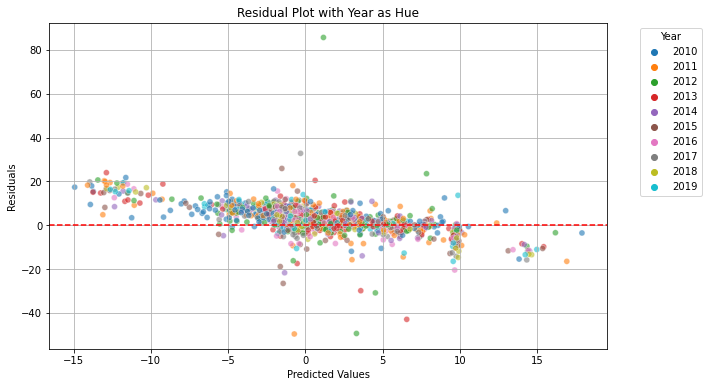

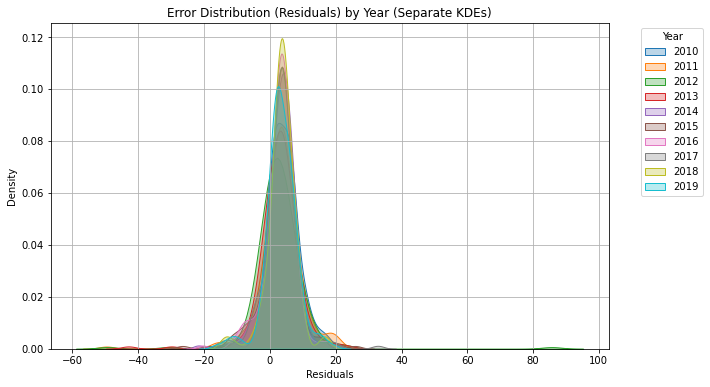

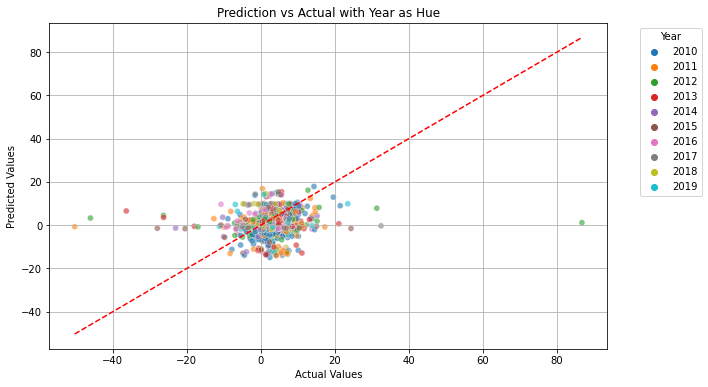

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Initialize lists to collect all actual, predicted values, and years across countries
all_actual_values = []
all_predicted_values = []
all_years = []

for country, predictions in country_recursive_predictions_rf.items():
    # Get predictions and corresponding years
    predicted_years = [year for year in predictions.keys() if year >= 2010]
    predicted_values = [predictions[year] for year in predicted_years]

    # Extract actual values from selected_df for the specified prediction years
    actual_data = selected_df_2[(selected_df_2['Country Name'] == country) & (selected_df_2['Year'].isin(predicted_years))]
    actual_values = actual_data['GDP growth (annual %)'].values
    years = actual_data['Year'].values

    # Ensure no NaN or inf values in actual and predicted values
    if len(actual_values) == len(predicted_values):
        actual_values_clean = np.array(actual_values)
        predicted_values_clean = np.array(predicted_values)
        
        # Filter out any NaN or inf values
        valid_indices = ~np.isnan(actual_values_clean) & ~np.isinf(actual_values_clean) & \
                        ~np.isnan(predicted_values_clean) & ~np.isinf(predicted_values_clean)
        
        actual_values_clean = actual_values_clean[valid_indices]
        predicted_values_clean = predicted_values_clean[valid_indices]
        years_clean = years[valid_indices]

        # Append clean values from 2010 onward to the overall lists
        all_actual_values.extend(actual_values_clean)
        all_predicted_values.extend(predicted_values_clean)
        all_years.extend(years_clean)

# Create a DataFrame for easier plotting with hue
plot_data = pd.DataFrame({
    'Actual': all_actual_values,
    'Predicted': all_predicted_values,
    'Residuals': np.array(all_actual_values) - np.array(all_predicted_values),
    'Year': all_years
})

# 1. Residual Plot with Year as Hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_data, x="Predicted", y="Residuals", hue="Year", palette="tab10", alpha=0.6)  # Using a discrete palette
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot with Year as Hue")
plt.grid(True)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)  # Adjust legend for clarity
plt.show()

# 2. Error Distribution Plot with Year as Hue (using Kernel Density Estimate)
plt.figure(figsize=(10, 6))
for year in plot_data['Year'].unique():
    sns.kdeplot(data=plot_data[plot_data['Year'] == year], x="Residuals", label=str(year), fill=True, alpha=0.3)
plt.xlabel("Residuals")
plt.title("Error Distribution (Residuals) by Year (Separate KDEs)")
plt.grid(True)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 3. Prediction vs. Actual Plot with Year as Hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_data, x="Actual", y="Predicted", hue="Year", palette="tab10", alpha=0.6)  # Using a discrete palette
plt.plot([plot_data['Actual'].min(), plot_data['Actual'].max()],
         [plot_data['Actual'].min(), plot_data['Actual'].max()], 'r--')  # Line of perfect prediction
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs Actual with Year as Hue")
plt.grid(True)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)  # Adjust legend for better readability
plt.show()

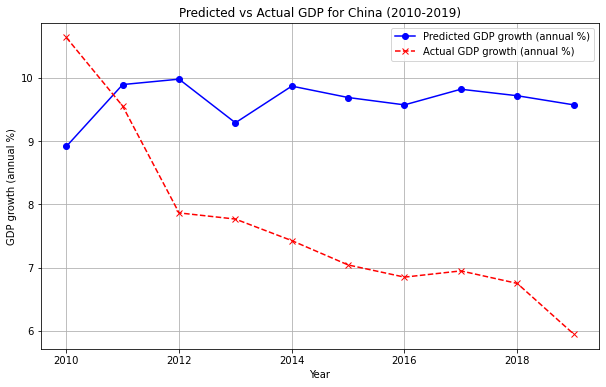

In [21]:
import matplotlib.pyplot as plt

# Function to plot predictions vs actual values for a specified country
def plot_country_predictions_vs_actual(country_name):
    # Extracting predictions for the specified country
    if country_name not in country_recursive_predictions_rf:
        logger.error(f"No predictions found for {country_name}.")
        return

    predictions = country_recursive_predictions_rf[country_name]
    predicted_years = [year for year in predictions.keys() if year >= 2010]
    predicted_values = [predictions[year] for year in predicted_years]

    # Extracting actual values for the specified country and prediction years (2010 onward)
    actual_data = test_df[(test_df['Country Name'] == country_name) & (test_df['Year'].isin(predicted_years))]
    actual_years = actual_data['Year'].values
    actual_values = actual_data['GDP growth (annual %)'].values

    # Plotting predictions vs actual values from 2010 onward
    plt.figure(figsize=(10, 6))
    plt.plot(predicted_years, predicted_values, label='Predicted GDP growth (annual %)', color='blue', marker='o')
    plt.plot(actual_years, actual_values, label='Actual GDP growth (annual %)', color='red', linestyle='--', marker='x')
    plt.xlabel("Year")
    plt.ylabel("GDP growth (annual %)")
    plt.title(f"Predicted vs Actual GDP for {country_name} (2010-2019)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Redefining test_df based on the years 2010-2019 from selected_df
test_df = selected_df_2[(selected_df_2['Year'] >= 2010) & (selected_df_2['Year'] <= 2019)].dropna(subset=['GDP growth (annual %)'])

# Rerun the plotting function for Kenya as an example
plot_country_predictions_vs_actual("China")

## Forecasting

In [22]:
import logging
from sklearn.ensemble import RandomForestRegressor

# Define year variables for training and prediction
TRAIN_START_YEAR = 2000
TRAIN_END_YEAR = 2019
PREDICTION_START_YEAR = 2019
PREDICTION_END_YEAR = 2030

# Setting up logging configuration
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

# Splitting data into training (2000-2019) set and setting up prediction years
train_df = selected_df_2[(selected_df_2['Year'] >= TRAIN_START_YEAR) & (selected_df_2['Year'] <= TRAIN_END_YEAR)].dropna(subset=['GDP growth (annual %)'])
prediction_years = range(PREDICTION_START_YEAR, PREDICTION_END_YEAR + 1)

# Preparing training data for the model
X_train = train_df[['Year', 'GDP Moving_Avg_2Y', 'GDP Moving_Avg_3Y', 'GDP Moving_Avg_5Y', 'GDP Moving_Avg_10Y']].values
y_train = train_df['GDP growth (annual %)'].values

# Initializing and training the Random Forest model on all training data
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
logger.info(f"Model trained on all countries' data ({TRAIN_START_YEAR}-{TRAIN_END_YEAR}). Starting recursive forecasting.")

# Dictionary to store predictions for each country
country_recursive_predictions_rf = {}

# Recursive forecasting for each country separately with detailed logging
for country in train_df['Country Name'].unique():
    logger.info(f"Processing country: {country}")

    # Get the last available data point for the country to start recursive prediction
    country_data = train_df[train_df['Country Name'] == country].iloc[-1].copy()
    predictions_per_country = {country_data['Year']: country_data['GDP growth (annual %)']}

    # Recursive prediction loop from PREDICTION_START_YEAR to PREDICTION_END_YEAR
    for year in prediction_years:
        country_data['Year'] = year
        
        # Logging the input data used for this prediction
        logger.info(f"Prediction inputs for {country} in {year}: Year={year}, "
                    f"GDP Moving_Avg_2Y={country_data['GDP Moving_Avg_2Y']}, "
                    f"GDP Moving_Avg_3Y={country_data['GDP Moving_Avg_3Y']}, "
                    f"GDP Moving_Avg_5Y={country_data['GDP Moving_Avg_5Y']}, "
                    f"GDP Moving_Avg_10Y={country_data['GDP Moving_Avg_10Y']}")
        
        # Preparing the features for the current prediction
        X_test = country_data[['Year', 'GDP Moving_Avg_2Y', 'GDP Moving_Avg_3Y', 'GDP Moving_Avg_5Y', 'GDP Moving_Avg_10Y']].values.reshape(1, -1)
        
        # Predicting life expectancy for the current year
        predicted_value = model_rf.predict(X_test)[0]
        logger.info(f"Predicted value for {country} in {year}: {predicted_value}")
        
        # Update the prediction in the dictionary
        predictions_per_country[year] = predicted_value
        
        # Update the features for the next prediction year based on the new prediction
        country_data['GDP growth (annual %)'] = predicted_value
        country_data['GDP Moving_Avg_2Y'] = (predictions_per_country.get(year - 1, predicted_value) + predicted_value) / 2
        country_data['GDP Moving_Avg_3Y'] = (predictions_per_country.get(year - 2, predicted_value) +
                                         predictions_per_country.get(year - 1, predicted_value) + predicted_value) / 3
        country_data['GDP Moving_Avg_5Y'] = (sum(predictions_per_country.get(y, predicted_value) for y in range(year - 4, year + 1)) / 5)
        country_data['GDP Moving_Avg_10Y'] = (sum(predictions_per_country.get(y, predicted_value) for y in range(year - 9, year + 1)) / 10)

    # Store the predictions for the country
    country_recursive_predictions_rf[country] = predictions_per_country


2024-11-11 16:55:36,346 - INFO - Model trained on all countries' data (2000-2019). Starting recursive forecasting.
2024-11-11 16:55:36,346 - INFO - Processing country: Afghanistan
2024-11-11 16:55:36,357 - INFO - Prediction inputs for Afghanistan in 2019: Year=2019, GDP Moving_Avg_2Y=2.5504157739016717, GDP Moving_Avg_3Y=2.5826115832537333, GDP Moving_Avg_5Y=2.291892722232654, GDP Moving_Avg_10Y=4.732583497570776
2024-11-11 16:55:36,369 - INFO - Predicted value for Afghanistan in 2019: 3.5729548701460345
2024-11-11 16:55:36,369 - INFO - Prediction inputs for Afghanistan in 2020: Year=2020, GDP Moving_Avg_2Y=3.5729548701460345, GDP Moving_Avg_3Y=3.5729548701460345, GDP Moving_Avg_5Y=3.5729548701460345, GDP Moving_Avg_10Y=3.5729548701460345
2024-11-11 16:55:36,371 - INFO - Predicted value for Afghanistan in 2020: 3.5587801100027496
2024-11-11 16:55:36,371 - INFO - Prediction inputs for Afghanistan in 2021: Year=2021, GDP Moving_Avg_2Y=3.565867490074392, GDP Moving_Avg_3Y=3.56350503005051

2024-11-11 16:55:36,539 - INFO - Predicted value for Algeria in 2019: 0.7522229667633822
2024-11-11 16:55:36,551 - INFO - Prediction inputs for Algeria in 2020: Year=2020, GDP Moving_Avg_2Y=0.7522229667633822, GDP Moving_Avg_3Y=0.7522229667633823, GDP Moving_Avg_5Y=0.7522229667633822, GDP Moving_Avg_10Y=0.7522229667633821
2024-11-11 16:55:36,555 - INFO - Predicted value for Algeria in 2020: 0.34087994070711053
2024-11-11 16:55:36,555 - INFO - Prediction inputs for Algeria in 2021: Year=2021, GDP Moving_Avg_2Y=0.5465514537352464, GDP Moving_Avg_3Y=0.4779942827258678, GDP Moving_Avg_5Y=0.42314854591836487, GDP Moving_Avg_10Y=0.3820142433127377
2024-11-11 16:55:36,567 - INFO - Predicted value for Algeria in 2021: 0.5384375507013764
2024-11-11 16:55:36,568 - INFO - Prediction inputs for Algeria in 2022: Year=2022, GDP Moving_Avg_2Y=0.43965874570424346, GDP Moving_Avg_3Y=0.5438468193906231, GDP Moving_Avg_5Y=0.5416831119149245, GDP Moving_Avg_10Y=0.5400603313081505
2024-11-11 16:55:36,571 -

2024-11-11 16:55:36,722 - INFO - Predicted value for Angola in 2020: -0.06383784347040472
2024-11-11 16:55:36,722 - INFO - Prediction inputs for Angola in 2021: Year=2021, GDP Moving_Avg_2Y=-0.2959433404623236, GDP Moving_Avg_3Y=-0.21857484146501735, GDP Moving_Avg_5Y=-0.15668004226717228, GDP Moving_Avg_10Y=-0.1102589428687885
2024-11-11 16:55:36,722 - INFO - Predicted value for Angola in 2021: -0.5824950045880842
2024-11-11 16:55:36,722 - INFO - Prediction inputs for Angola in 2022: Year=2022, GDP Moving_Avg_2Y=-0.32316642402924445, GDP Moving_Avg_3Y=-0.3914605618375771, GDP Moving_Avg_5Y=-0.46787433893778, GDP Moving_Avg_10Y=-0.525184671762932
2024-11-11 16:55:36,737 - INFO - Predicted value for Angola in 2022: -0.3851143502287308
2024-11-11 16:55:36,738 - INFO - Prediction inputs for Angola in 2023: Year=2023, GDP Moving_Avg_2Y=-0.4838046774084075, GDP Moving_Avg_3Y=-0.34381573276240657, GDP Moving_Avg_5Y=-0.38892207719403865, GDP Moving_Avg_10Y=-0.3870182137113847
2024-11-11 16:55

2024-11-11 16:55:36,872 - INFO - Predicted value for Argentina in 2020: -0.6760882003685685
2024-11-11 16:55:36,872 - INFO - Prediction inputs for Argentina in 2021: Year=2021, GDP Moving_Avg_2Y=-1.3983503879630632, GDP Moving_Avg_3Y=-1.1575963254315649, GDP Moving_Avg_5Y=-0.9649930754063666, GDP Moving_Avg_10Y=-0.8205406378874676
2024-11-11 16:55:36,872 - INFO - Predicted value for Argentina in 2021: -0.047547942096011944
2024-11-11 16:55:36,872 - INFO - Prediction inputs for Argentina in 2022: Year=2022, GDP Moving_Avg_2Y=-0.36181807123229026, GDP Moving_Avg_3Y=-0.9480829060073795, GDP Moving_Avg_5Y=-0.5878689204428325, GDP Moving_Avg_10Y=-0.3177084312694222
2024-11-11 16:55:36,889 - INFO - Predicted value for Argentina in 2022: -0.09327671213293937
2024-11-11 16:55:36,889 - INFO - Prediction inputs for Argentina in 2023: Year=2023, GDP Moving_Avg_2Y=-0.07041232711447565, GDP Moving_Avg_3Y=-0.27230428486583996, GDP Moving_Avg_5Y=-0.6061604284576034, GDP Moving_Avg_10Y=-0.349718570295

2024-11-11 16:55:37,038 - INFO - Predicted value for Australia in 2021: 2.3087318708154054
2024-11-11 16:55:37,038 - INFO - Prediction inputs for Australia in 2022: Year=2022, GDP Moving_Avg_2Y=2.3307929882358334, GDP Moving_Avg_3Y=2.3514843599433033, GDP Moving_Avg_5Y=2.3343833642921443, GDP Moving_Avg_10Y=2.3215576175537747
2024-11-11 16:55:37,038 - INFO - Predicted value for Australia in 2022: 2.1838937668336005
2024-11-11 16:55:37,038 - INFO - Prediction inputs for Australia in 2023: Year=2023, GDP Moving_Avg_2Y=2.246312818824503, GDP Moving_Avg_3Y=2.2818265811017557, GDP Moving_Avg_5Y=2.2844481226994224, GDP Moving_Avg_10Y=2.234170944766511
2024-11-11 16:55:37,053 - INFO - Predicted value for Australia in 2023: 2.1768978257830156
2024-11-11 16:55:37,054 - INFO - Prediction inputs for Australia in 2024: Year=2024, GDP Moving_Avg_2Y=2.180395796308308, GDP Moving_Avg_3Y=2.223174487810674, GDP Moving_Avg_5Y=2.2830489344893055, GDP Moving_Avg_10Y=2.2299733801361605
2024-11-11 16:55:37,

2024-11-11 16:55:37,204 - INFO - Predicted value for Azerbaijan in 2022: 2.1591090924919976
2024-11-11 16:55:37,204 - INFO - Prediction inputs for Azerbaijan in 2023: Year=2023, GDP Moving_Avg_2Y=2.2174633011017226, GDP Moving_Avg_3Y=2.2633858143127163, GDP Moving_Avg_5Y=2.276259331598408, GDP Moving_Avg_10Y=2.217684212045203
2024-11-11 16:55:37,204 - INFO - Predicted value for Azerbaijan in 2023: 2.1394582839672225
2024-11-11 16:55:37,204 - INFO - Prediction inputs for Azerbaijan in 2024: Year=2024, GDP Moving_Avg_2Y=2.14928368822961, GDP Moving_Avg_3Y=2.1914616287235558, GDP Moving_Avg_5Y=2.272329169893453, GDP Moving_Avg_10Y=2.205893726930338
2024-11-11 16:55:37,221 - INFO - Predicted value for Azerbaijan in 2024: 2.123853211739732
2024-11-11 16:55:37,221 - INFO - Prediction inputs for Azerbaijan in 2025: Year=2025, GDP Moving_Avg_2Y=2.1316557478534772, GDP Moving_Avg_3Y=2.1408068627329837, GDP Moving_Avg_5Y=2.2106937877290207, GDP Moving_Avg_10Y=2.1980911908165925
2024-11-11 16:55:

2024-11-11 16:55:37,356 - INFO - Prediction inputs for Bahrain in 2023: Year=2023, GDP Moving_Avg_2Y=0.8244296869452228, GDP Moving_Avg_3Y=0.966100954261381, GDP Moving_Avg_5Y=1.0696485810863017, GDP Moving_Avg_10Y=0.9374208121936076
2024-11-11 16:55:37,356 - INFO - Predicted value for Bahrain in 2023: 0.8393648083747067
2024-11-11 16:55:37,367 - INFO - Prediction inputs for Bahrain in 2024: Year=2024, GDP Moving_Avg_2Y=0.82227892583781, GDP Moving_Avg_3Y=0.8294080607550507, GDP Moving_Avg_5Y=1.0764829341010604, GDP Moving_Avg_10Y=0.9579238712378837
2024-11-11 16:55:37,372 - INFO - Predicted value for Bahrain in 2024: 0.9525275544380937
2024-11-11 16:55:37,372 - INFO - Prediction inputs for Bahrain in 2025: Year=2025, GDP Moving_Avg_2Y=0.8959461814064003, GDP Moving_Avg_3Y=0.8656951353712379, GDP Moving_Avg_5Y=0.9380390451193886, GDP Moving_Avg_10Y=1.0145052442695772
2024-11-11 16:55:37,372 - INFO - Predicted value for Bahrain in 2025: 0.7457973328663818
2024-11-11 16:55:37,372 - INFO 

2024-11-11 16:55:37,522 - INFO - Prediction inputs for Barbados in 2024: Year=2024, GDP Moving_Avg_2Y=-0.41738428571661096, GDP Moving_Avg_3Y=-0.412089225255567, GDP Moving_Avg_5Y=-0.3804259065061193, GDP Moving_Avg_10Y=-0.44353243530757364
2024-11-11 16:55:37,522 - INFO - Predicted value for Barbados in 2024: -0.3455429604247148
2024-11-11 16:55:37,522 - INFO - Prediction inputs for Barbados in 2025: Year=2025, GDP Moving_Avg_2Y=-0.4260909622668714, GDP Moving_Avg_3Y=-0.3934371772859789, GDP Moving_Avg_5Y=-0.40674323584260563, GDP Moving_Avg_10Y=-0.36298443346541703
2024-11-11 16:55:37,522 - INFO - Predicted value for Barbados in 2025: -0.29683472707894537
2024-11-11 16:55:37,534 - INFO - Prediction inputs for Barbados in 2026: Year=2026, GDP Moving_Avg_2Y=-0.3211888437518301, GDP Moving_Avg_3Y=-0.3830055505375627, GDP Moving_Avg_5Y=-0.37572907265407224, GDP Moving_Avg_10Y=-0.34350114012710936
2024-11-11 16:55:37,538 - INFO - Predicted value for Barbados in 2026: -0.43224152085856477


2024-11-11 16:55:37,685 - INFO - Prediction inputs for Belgium in 2025: Year=2025, GDP Moving_Avg_2Y=1.2819338485266099, GDP Moving_Avg_3Y=1.4218458669436504, GDP Moving_Avg_5Y=1.6311245141956356, GDP Moving_Avg_10Y=1.4587851343907168
2024-11-11 16:55:37,689 - INFO - Predicted value for Belgium in 2025: 1.1698342725607174
2024-11-11 16:55:37,689 - INFO - Prediction inputs for Belgium in 2026: Year=2026, GDP Moving_Avg_2Y=1.130664081558147, GDP Moving_Avg_3Y=1.2445673232046457, GDP Moving_Avg_5Y=1.4627614911895006, GDP Moving_Avg_10Y=1.490121287192773
2024-11-11 16:55:37,689 - INFO - Predicted value for Belgium in 2026: 0.8050659868973465
2024-11-11 16:55:37,689 - INFO - Prediction inputs for Belgium in 2027: Year=2027, GDP Moving_Avg_2Y=0.9874501297290319, GDP Moving_Avg_3Y=1.0221313833378802, GDP Moving_Avg_5Y=1.248087572057803, GDP Moving_Avg_10Y=1.380690801493762
2024-11-11 16:55:37,703 - INFO - Predicted value for Belgium in 2027: 0.803835052767286
2024-11-11 16:55:37,704 - INFO - 

2024-11-11 16:55:37,855 - INFO - Predicted value for Benin in 2026: 5.8997341520090405
2024-11-11 16:55:37,856 - INFO - Prediction inputs for Benin in 2027: Year=2027, GDP Moving_Avg_2Y=5.928404832032507, GDP Moving_Avg_3Y=6.019556425437554, GDP Moving_Avg_5Y=6.151289743931365, GDP Moving_Avg_10Y=6.208555848746417
2024-11-11 16:55:37,857 - INFO - Predicted value for Benin in 2027: 5.87703279864603
2024-11-11 16:55:37,857 - INFO - Prediction inputs for Benin in 2028: Year=2028, GDP Moving_Avg_2Y=5.888383475327535, GDP Moving_Avg_3Y=5.911280820903682, GDP Moving_Avg_5Y=6.036892091830023, GDP Moving_Avg_10Y=6.204015578073815
2024-11-11 16:55:37,867 - INFO - Predicted value for Benin in 2028: 6.00803386928869
2024-11-11 16:55:37,868 - INFO - Prediction inputs for Benin in 2029: Year=2029, GDP Moving_Avg_2Y=5.94253333396736, GDP Moving_Avg_3Y=5.9282669399812535, GDP Moving_Avg_5Y=5.988747188849477, GDP Moving_Avg_10Y=6.217115685138081
2024-11-11 16:55:37,871 - INFO - Predicted value for Ben

2024-11-11 16:55:38,021 - INFO - Predicted value for Bolivia in 2028: 1.9113396068739983
2024-11-11 16:55:38,022 - INFO - Prediction inputs for Bolivia in 2029: Year=2029, GDP Moving_Avg_2Y=1.9080789324629637, GDP Moving_Avg_3Y=1.9417091776508884, GDP Moving_Avg_5Y=2.028848912240231, GDP Moving_Avg_10Y=2.163878069710684
2024-11-11 16:55:38,022 - INFO - Predicted value for Bolivia in 2029: 1.6619147397096703
2024-11-11 16:55:38,022 - INFO - Prediction inputs for Bolivia in 2030: Year=2030, GDP Moving_Avg_2Y=1.7866271732918344, GDP Moving_Avg_3Y=1.8260242015451993, GDP Moving_Avg_5Y=1.9274151014035776, GDP Moving_Avg_10Y=2.080943847336188
2024-11-11 16:55:38,022 - INFO - Predicted value for Bolivia in 2030: 1.4109333081127227
2024-11-11 16:55:38,022 - INFO - Processing country: Bosnia and Herzegovina
2024-11-11 16:55:38,035 - INFO - Prediction inputs for Bosnia and Herzegovina in 2019: Year=2019, GDP Moving_Avg_2Y=3.3574212748088605, GDP Moving_Avg_3Y=3.319647836170793, GDP Moving_Avg_5Y

2024-11-11 16:55:38,184 - INFO - Predicted value for Botswana in 2028: 2.722017324465719
2024-11-11 16:55:38,185 - INFO - Prediction inputs for Botswana in 2029: Year=2029, GDP Moving_Avg_2Y=2.7197259272243137, GDP Moving_Avg_3Y=2.740555741123829, GDP Moving_Avg_5Y=2.74990578656043, GDP Moving_Avg_10Y=2.8372388497171466
2024-11-11 16:55:38,189 - INFO - Predicted value for Botswana in 2029: 2.778613214763094
2024-11-11 16:55:38,189 - INFO - Prediction inputs for Botswana in 2030: Year=2030, GDP Moving_Avg_2Y=2.7503152696144064, GDP Moving_Avg_3Y=2.739355023070574, GDP Moving_Avg_5Y=2.762822546117933, GDP Moving_Avg_10Y=2.7901416195559205
2024-11-11 16:55:38,189 - INFO - Predicted value for Botswana in 2030: 2.792939467056953
2024-11-11 16:55:38,189 - INFO - Processing country: Brazil
2024-11-11 16:55:38,189 - INFO - Prediction inputs for Brazil in 2019: Year=2019, GDP Moving_Avg_2Y=1.5022222926212092, GDP Moving_Avg_3Y=1.4424378797621384, GDP Moving_Avg_5Y=-0.49887333224595204, GDP Movi

2024-11-11 16:55:38,356 - INFO - Predicted value for Brunei Darussalam in 2029: 2.5078688675628995
2024-11-11 16:55:38,356 - INFO - Prediction inputs for Brunei Darussalam in 2030: Year=2030, GDP Moving_Avg_2Y=2.700563164699325, GDP Moving_Avg_3Y=2.7451849352594517, GDP Moving_Avg_5Y=2.7373498356442085, GDP Moving_Avg_10Y=2.744337714624521
2024-11-11 16:55:38,370 - INFO - Predicted value for Brunei Darussalam in 2030: 2.6378261560638583
2024-11-11 16:55:38,370 - INFO - Processing country: Bulgaria
2024-11-11 16:55:38,372 - INFO - Prediction inputs for Bulgaria in 2019: Year=2019, GDP Moving_Avg_2Y=3.361451396332171, GDP Moving_Avg_3Y=3.1616912507589867, GDP Moving_Avg_5Y=3.190590788421246, GDP Moving_Avg_10Y=2.075726658802336
2024-11-11 16:55:38,372 - INFO - Predicted value for Bulgaria in 2019: 3.6494206732972727
2024-11-11 16:55:38,372 - INFO - Prediction inputs for Bulgaria in 2020: Year=2020, GDP Moving_Avg_2Y=3.6494206732972727, GDP Moving_Avg_3Y=3.6494206732972727, GDP Moving_Avg

2024-11-11 16:55:38,522 - INFO - Predicted value for Burkina Faso in 2030: 6.054583953159782
2024-11-11 16:55:38,522 - INFO - Processing country: Burundi
2024-11-11 16:55:38,522 - INFO - Prediction inputs for Burundi in 2019: Year=2019, GDP Moving_Avg_2Y=1.7112503726463286, GDP Moving_Avg_3Y=1.3075006692406461, GDP Moving_Avg_5Y=-0.11549979637598966, GDP Moving_Avg_10Y=2.219080744445062
2024-11-11 16:55:38,538 - INFO - Predicted value for Burundi in 2019: 1.9559932857202127
2024-11-11 16:55:38,538 - INFO - Prediction inputs for Burundi in 2020: Year=2020, GDP Moving_Avg_2Y=1.9559932857202127, GDP Moving_Avg_3Y=1.9559932857202125, GDP Moving_Avg_5Y=1.9559932857202127, GDP Moving_Avg_10Y=1.9559932857202127
2024-11-11 16:55:38,538 - INFO - Predicted value for Burundi in 2020: 1.6750458576307412
2024-11-11 16:55:38,538 - INFO - Prediction inputs for Burundi in 2021: Year=2021, GDP Moving_Avg_2Y=1.8155195716754768, GDP Moving_Avg_3Y=1.7686950003272317, GDP Moving_Avg_5Y=1.7312353432486354, 

2024-11-11 16:55:38,688 - INFO - Predicted value for Cambodia in 2019: 7.1324702754827225
2024-11-11 16:55:38,688 - INFO - Prediction inputs for Cambodia in 2020: Year=2020, GDP Moving_Avg_2Y=7.1324702754827225, GDP Moving_Avg_3Y=7.132470275482722, GDP Moving_Avg_5Y=7.1324702754827225, GDP Moving_Avg_10Y=7.1324702754827225
2024-11-11 16:55:38,688 - INFO - Predicted value for Cambodia in 2020: 7.0441752394363695
2024-11-11 16:55:38,688 - INFO - Prediction inputs for Cambodia in 2021: Year=2021, GDP Moving_Avg_2Y=7.0883227574595455, GDP Moving_Avg_3Y=7.073606918118487, GDP Moving_Avg_5Y=7.06183424664564, GDP Moving_Avg_10Y=7.053004743041005
2024-11-11 16:55:38,706 - INFO - Predicted value for Cambodia in 2021: 7.078533722802911
2024-11-11 16:55:38,706 - INFO - Prediction inputs for Cambodia in 2022: Year=2022, GDP Moving_Avg_2Y=7.06135448111964, GDP Moving_Avg_3Y=7.085059745907334, GDP Moving_Avg_5Y=7.082449336665564, GDP Moving_Avg_10Y=7.080491529734237
2024-11-11 16:55:38,706 - INFO - 

2024-11-11 16:55:38,858 - INFO - Prediction inputs for Canada in 2021: Year=2021, GDP Moving_Avg_2Y=1.7492443791456, GDP Moving_Avg_3Y=1.7002917404653701, GDP Moving_Avg_5Y=1.6611296295211866, GDP Moving_Avg_10Y=1.6317580463130483
2024-11-11 16:55:38,858 - INFO - Predicted value for Canada in 2021: 1.5439988886348175
2024-11-11 16:55:38,858 - INFO - Prediction inputs for Canada in 2022: Year=2022, GDP Moving_Avg_2Y=1.573192675869864, GDP Moving_Avg_3Y=1.680829215642006, GDP Moving_Avg_5Y=1.6260970848391305, GDP Moving_Avg_10Y=1.5850479867369738
2024-11-11 16:55:38,873 - INFO - Predicted value for Canada in 2022: 1.0856228585214485
2024-11-11 16:55:38,873 - INFO - Prediction inputs for Canada in 2023: Year=2023, GDP Moving_Avg_2Y=1.314810873578133, GDP Moving_Avg_3Y=1.410669403420392, GDP Moving_Avg_5Y=1.442746672793783, GDP Moving_Avg_10Y=1.2641847656576155
2024-11-11 16:55:38,884 - INFO - Predicted value for Canada in 2023: 1.109925216716092
2024-11-11 16:55:38,885 - INFO - Prediction

2024-11-11 16:55:39,022 - INFO - Prediction inputs for Chad in 2021: Year=2021, GDP Moving_Avg_2Y=2.8580549887190774, GDP Moving_Avg_3Y=2.821327324919673, GDP Moving_Avg_5Y=2.7919451938801503, GDP Moving_Avg_10Y=2.769908595600507
2024-11-11 16:55:39,034 - INFO - Predicted value for Chad in 2021: 2.6404589784370707
2024-11-11 16:55:39,035 - INFO - Prediction inputs for Chad in 2022: Year=2022, GDP Moving_Avg_2Y=2.694165487878968, GDP Moving_Avg_3Y=2.785522985291742, GDP Moving_Avg_5Y=2.727497382549873, GDP Moving_Avg_10Y=2.683978180493472
2024-11-11 16:55:39,039 - INFO - Predicted value for Chad in 2022: 2.6862990033060554
2024-11-11 16:55:39,039 - INFO - Prediction inputs for Chad in 2023: Year=2023, GDP Moving_Avg_2Y=2.6633789908715633, GDP Moving_Avg_3Y=2.6915433263546635, GDP Moving_Avg_5Y=2.745833392497467, GDP Moving_Avg_10Y=2.7160661979017613
2024-11-11 16:55:39,039 - INFO - Predicted value for Chad in 2023: 2.8806558130634112
2024-11-11 16:55:39,039 - INFO - Prediction inputs fo

2024-11-11 16:55:39,189 - INFO - Predicted value for China in 2022: 6.121270319634845
2024-11-11 16:55:39,189 - INFO - Prediction inputs for China in 2023: Year=2023, GDP Moving_Avg_2Y=5.953476689722452, GDP Moving_Avg_3Y=5.94707197644232, GDP Moving_Avg_5Y=6.001098319874602, GDP Moving_Avg_10Y=6.061184319754723
2024-11-11 16:55:39,203 - INFO - Predicted value for China in 2023: 6.017499538796089
2024-11-11 16:55:39,204 - INFO - Prediction inputs for China in 2024: Year=2024, GDP Moving_Avg_2Y=6.069384929215467, GDP Moving_Avg_3Y=5.974817639413664, GDP Moving_Avg_5Y=5.98034416370685, GDP Moving_Avg_10Y=5.9989218512514695
2024-11-11 16:55:39,205 - INFO - Predicted value for China in 2024: 6.076566088332012
2024-11-11 16:55:39,205 - INFO - Prediction inputs for China in 2025: Year=2025, GDP Moving_Avg_2Y=6.04703281356405, GDP Moving_Avg_3Y=6.071778648920982, GDP Moving_Avg_5Y=5.987056311291012, GDP Moving_Avg_10Y=6.028455126019432
2024-11-11 16:55:39,205 - INFO - Predicted value for Chin

2024-11-11 16:55:39,357 - INFO - Prediction inputs for Comoros in 2024: Year=2024, GDP Moving_Avg_2Y=1.6625264369267072, GDP Moving_Avg_3Y=1.681877861751895, GDP Moving_Avg_5Y=1.795311134344607, GDP Moving_Avg_10Y=1.7197550437829243
2024-11-11 16:55:39,369 - INFO - Predicted value for Comoros in 2024: 2.7483033897712534
2024-11-11 16:55:39,370 - INFO - Prediction inputs for Comoros in 2025: Year=2025, GDP Moving_Avg_2Y=2.1962511714962476, GDP Moving_Avg_3Y=2.0244520878748893, GDP Moving_Avg_5Y=1.9356461919040147, GDP Moving_Avg_10Y=2.271807262057931
2024-11-11 16:55:39,372 - INFO - Predicted value for Comoros in 2025: 2.1515169944980372
2024-11-11 16:55:39,372 - INFO - Prediction inputs for Comoros in 2026: Year=2026, GDP Moving_Avg_2Y=2.449910192134645, GDP Moving_Avg_3Y=2.1813397791635105, GDP Moving_Avg_5Y=1.9890907939049953, GDP Moving_Avg_10Y=2.033092703948644
2024-11-11 16:55:39,386 - INFO - Predicted value for Comoros in 2026: 2.220371246714497
2024-11-11 16:55:39,387 - INFO - P

2024-11-11 16:55:39,522 - INFO - Predicted value for Congo, Rep. in 2024: -0.33031002895333184
2024-11-11 16:55:39,522 - INFO - Prediction inputs for Congo, Rep. in 2025: Year=2025, GDP Moving_Avg_2Y=-0.34453523670572467, GDP Moving_Avg_3Y=-0.3589553597485353, GDP Moving_Avg_5Y=-0.31971281479855584, GDP Moving_Avg_10Y=-0.3834752531423475
2024-11-11 16:55:39,536 - INFO - Predicted value for Congo, Rep. in 2025: -0.3935129849635388
2024-11-11 16:55:39,538 - INFO - Prediction inputs for Congo, Rep. in 2026: Year=2026, GDP Moving_Avg_2Y=-0.3619115069584353, GDP Moving_Avg_3Y=-0.36086115279166275, GDP Moving_Avg_5Y=-0.3463143159448327, GDP Moving_Avg_10Y=-0.4087564355464302
2024-11-11 16:55:39,539 - INFO - Predicted value for Congo, Rep. in 2026: -0.47159615078367173
2024-11-11 16:55:39,539 - INFO - Prediction inputs for Congo, Rep. in 2027: Year=2027, GDP Moving_Avg_2Y=-0.43255456787360524, GDP Moving_Avg_3Y=-0.39847305490018076, GDP Moving_Avg_5Y=-0.3883950429985633, GDP Moving_Avg_10Y=-0

2024-11-11 16:55:39,688 - INFO - Predicted value for Cote d'Ivoire in 2025: 5.966276356401491
2024-11-11 16:55:39,688 - INFO - Prediction inputs for Cote d'Ivoire in 2026: Year=2026, GDP Moving_Avg_2Y=6.043712004049352, GDP Moving_Avg_3Y=5.9736757537711425, GDP Moving_Avg_5Y=5.982403851321516, GDP Moving_Avg_10Y=5.998041229999835
2024-11-11 16:55:39,688 - INFO - Predicted value for Cote d'Ivoire in 2026: 6.073198804766206
2024-11-11 16:55:39,701 - INFO - Prediction inputs for Cote d'Ivoire in 2027: Year=2027, GDP Moving_Avg_2Y=6.019737580583849, GDP Moving_Avg_3Y=6.053540937621637, GDP Moving_Avg_5Y=5.9837171859503275, GDP Moving_Avg_10Y=6.030117964509249
2024-11-11 16:55:39,705 - INFO - Predicted value for Cote d'Ivoire in 2027: 6.016661966765295
2024-11-11 16:55:39,705 - INFO - Prediction inputs for Cote d'Ivoire in 2028: Year=2028, GDP Moving_Avg_2Y=6.044930385765751, GDP Moving_Avg_3Y=6.018712375977664, GDP Moving_Avg_5Y=6.002177606568986, GDP Moving_Avg_10Y=6.018810596909068
2024-

2024-11-11 16:55:39,853 - INFO - Predicted value for Cuba in 2026: -0.4187446132807669
2024-11-11 16:55:39,854 - INFO - Prediction inputs for Cuba in 2027: Year=2027, GDP Moving_Avg_2Y=-0.3586817002695336, GDP Moving_Avg_3Y=-0.3816079710128725, GDP Moving_Avg_5Y=-0.36452991935083784, GDP Moving_Avg_10Y=-0.357675891564919
2024-11-11 16:55:39,857 - INFO - Predicted value for Cuba in 2027: -0.48420307909281496
2024-11-11 16:55:39,857 - INFO - Prediction inputs for Cuba in 2028: Year=2028, GDP Moving_Avg_2Y=-0.45147384618679093, GDP Moving_Avg_3Y=-0.40052215987729406, GDP Moving_Avg_5Y=-0.4045422077532527, GDP Moving_Avg_10Y=-0.3707675847273286
2024-11-11 16:55:39,857 - INFO - Predicted value for Cuba in 2028: -0.28159291556741495
2024-11-11 16:55:39,857 - INFO - Prediction inputs for Cuba in 2029: Year=2029, GDP Moving_Avg_2Y=-0.382897997330115, GDP Moving_Avg_3Y=-0.3948468693136656, GDP Moving_Avg_5Y=-0.38212398153976945, GDP Moving_Avg_10Y=-0.35050656837478866
2024-11-11 16:55:39,871 - 

2024-11-11 16:55:40,005 - INFO - Prediction inputs for Czechia in 2028: Year=2028, GDP Moving_Avg_2Y=2.8290383304102074, GDP Moving_Avg_3Y=2.775277697942252, GDP Moving_Avg_5Y=2.743867260444369, GDP Moving_Avg_10Y=2.7475855382405623
2024-11-11 16:55:40,005 - INFO - Predicted value for Czechia in 2028: 2.7036136832246065
2024-11-11 16:55:40,005 - INFO - Prediction inputs for Czechia in 2029: Year=2029, GDP Moving_Avg_2Y=2.7313019209838885, GDP Moving_Avg_3Y=2.7872301146816736, GDP Moving_Avg_5Y=2.746881636339343, GDP Moving_Avg_10Y=2.7420478906887062
2024-11-11 16:55:40,022 - INFO - Predicted value for Czechia in 2029: 2.5888982953335535
2024-11-11 16:55:40,022 - INFO - Prediction inputs for Czechia in 2030: Year=2030, GDP Moving_Avg_2Y=2.64625598927908, GDP Moving_Avg_3Y=2.68383404576711, GDP Moving_Avg_5Y=2.7236690144769833, GDP Moving_Avg_10Y=2.723693289846703
2024-11-11 16:55:40,022 - INFO - Predicted value for Czechia in 2030: 2.8742085349134032
2024-11-11 16:55:40,022 - INFO - Pro

2024-11-11 16:55:40,172 - INFO - Predicted value for Djibouti in 2029: 5.321228922451487
2024-11-11 16:55:40,172 - INFO - Prediction inputs for Djibouti in 2030: Year=2030, GDP Moving_Avg_2Y=5.3061573083433, GDP Moving_Avg_3Y=5.315195658125519, GDP Moving_Avg_5Y=5.298812835670479, GDP Moving_Avg_10Y=5.300213460051977
2024-11-11 16:55:40,184 - INFO - Predicted value for Djibouti in 2030: 5.280635984580758
2024-11-11 16:55:40,185 - INFO - Processing country: Dominica
2024-11-11 16:55:40,186 - INFO - Prediction inputs for Dominica in 2019: Year=2019, GDP Moving_Avg_2Y=4.525033927509705, GDP Moving_Avg_3Y=0.8103577407380239, GDP Moving_Avg_5Y=0.49264362824008384, GDP Moving_Avg_10Y=0.5607147559652439
2024-11-11 16:55:40,189 - INFO - Predicted value for Dominica in 2019: 5.280893998702054
2024-11-11 16:55:40,189 - INFO - Prediction inputs for Dominica in 2020: Year=2020, GDP Moving_Avg_2Y=5.280893998702054, GDP Moving_Avg_3Y=5.280893998702054, GDP Moving_Avg_5Y=5.280893998702054, GDP Moving

2024-11-11 16:55:40,339 - INFO - Predicted value for Dominican Republic in 2030: 6.039781210244366
2024-11-11 16:55:40,339 - INFO - Processing country: Ecuador
2024-11-11 16:55:40,339 - INFO - Prediction inputs for Ecuador in 2019: Year=2019, GDP Moving_Avg_2Y=0.6506985178763379, GDP Moving_Avg_3Y=1.223261187363062, GDP Moving_Avg_5Y=0.508454437159333, GDP Moving_Avg_10Y=2.8313053656673484
2024-11-11 16:55:40,339 - INFO - Predicted value for Ecuador in 2019: 0.18706704984588055
2024-11-11 16:55:40,339 - INFO - Prediction inputs for Ecuador in 2020: Year=2020, GDP Moving_Avg_2Y=0.18706704984588055, GDP Moving_Avg_3Y=0.18706704984588055, GDP Moving_Avg_5Y=0.18706704984588055, GDP Moving_Avg_10Y=0.18706704984588057
2024-11-11 16:55:40,354 - INFO - Predicted value for Ecuador in 2020: -0.8590203083253003
2024-11-11 16:55:40,354 - INFO - Prediction inputs for Ecuador in 2021: Year=2021, GDP Moving_Avg_2Y=-0.3359766292397099, GDP Moving_Avg_3Y=-0.51032452226824, GDP Moving_Avg_5Y=-0.64980283

2024-11-11 16:55:40,489 - INFO - Processing country: El Salvador
2024-11-11 16:55:40,489 - INFO - Prediction inputs for El Salvador in 2019: Year=2019, GDP Moving_Avg_2Y=2.4340449114466747, GDP Moving_Avg_3Y=2.3719029680782437, GDP Moving_Avg_5Y=2.4109542808229043, GDP Moving_Avg_10Y=2.473649480519876
2024-11-11 16:55:40,505 - INFO - Predicted value for El Salvador in 2019: 2.377856231368474
2024-11-11 16:55:40,505 - INFO - Prediction inputs for El Salvador in 2020: Year=2020, GDP Moving_Avg_2Y=2.377856231368474, GDP Moving_Avg_3Y=2.377856231368474, GDP Moving_Avg_5Y=2.377856231368474, GDP Moving_Avg_10Y=2.3778562313684746
2024-11-11 16:55:40,505 - INFO - Predicted value for El Salvador in 2020: 2.3044069817049135
2024-11-11 16:55:40,505 - INFO - Prediction inputs for El Salvador in 2021: Year=2021, GDP Moving_Avg_2Y=2.3411316065366936, GDP Moving_Avg_3Y=2.3288900649261, GDP Moving_Avg_5Y=2.3190968316376255, GDP Moving_Avg_10Y=2.3117519066712697
2024-11-11 16:55:40,517 - INFO - Predict

2024-11-11 16:55:40,654 - INFO - Processing country: Eritrea
2024-11-11 16:55:40,655 - INFO - Prediction inputs for Eritrea in 2019: Year=2019, GDP Moving_Avg_2Y=5.436995225130655, GDP Moving_Avg_3Y=4.916830659267803, GDP Moving_Avg_5Y=1.2788568342364162, GDP Moving_Avg_10Y=0.9801165444536506
2024-11-11 16:55:40,656 - INFO - Predicted value for Eritrea in 2019: 7.749596984444439
2024-11-11 16:55:40,656 - INFO - Prediction inputs for Eritrea in 2020: Year=2020, GDP Moving_Avg_2Y=7.749596984444439, GDP Moving_Avg_3Y=7.74959698444444, GDP Moving_Avg_5Y=7.749596984444439, GDP Moving_Avg_10Y=7.842617296138043
2024-11-11 16:55:40,656 - INFO - Predicted value for Eritrea in 2020: 7.818145576941232
2024-11-11 16:55:40,667 - INFO - Prediction inputs for Eritrea in 2021: Year=2021, GDP Moving_Avg_2Y=7.783871280692836, GDP Moving_Avg_3Y=7.795296046108969, GDP Moving_Avg_5Y=7.804435858441873, GDP Moving_Avg_10Y=7.89745617013548
2024-11-11 16:55:40,672 - INFO - Predicted value for Eritrea in 2021: 

2024-11-11 16:55:40,822 - INFO - Predicted value for Eswatini in 2020: 2.7764596545736326
2024-11-11 16:55:40,822 - INFO - Prediction inputs for Eswatini in 2021: Year=2021, GDP Moving_Avg_2Y=2.765572333307357, GDP Moving_Avg_3Y=2.7692014403961154, GDP Moving_Avg_5Y=2.7721047260671225, GDP Moving_Avg_10Y=2.774282190320377
2024-11-11 16:55:40,822 - INFO - Predicted value for Eswatini in 2021: 2.7064565510211196
2024-11-11 16:55:40,822 - INFO - Prediction inputs for Eswatini in 2022: Year=2022, GDP Moving_Avg_2Y=2.741458102797376, GDP Moving_Avg_3Y=2.7458670725452783, GDP Moving_Avg_5Y=2.7301028639356146, GDP Moving_Avg_10Y=2.718279707478367
2024-11-11 16:55:40,835 - INFO - Predicted value for Eswatini in 2022: 2.7302350935696036
2024-11-11 16:55:40,836 - INFO - Prediction inputs for Eswatini in 2023: Year=2023, GDP Moving_Avg_2Y=2.718345822295362, GDP Moving_Avg_3Y=2.737717099721452, GDP Moving_Avg_5Y=2.7396142809550086, GDP Moving_Avg_10Y=2.734924687262306
2024-11-11 16:55:40,838 - INF

2024-11-11 16:55:40,985 - INFO - Prediction inputs for Fiji in 2022: Year=2022, GDP Moving_Avg_2Y=-0.4332256627322376, GDP Moving_Avg_3Y=-0.3204265725392949, GDP Moving_Avg_5Y=-0.24145692451915327, GDP Moving_Avg_10Y=-0.18222968850404705
2024-11-11 16:55:40,989 - INFO - Predicted value for Fiji in 2022: -0.36972813836854046
2024-11-11 16:55:40,989 - INFO - Prediction inputs for Fiji in 2023: Year=2023, GDP Moving_Avg_2Y=-0.24636529542874064, GDP Moving_Avg_3Y=-0.4120598212776719, GDP Moving_Avg_5Y=-0.3401471988709931, GDP Moving_Avg_10Y=-0.35493766861976683
2024-11-11 16:55:40,989 - INFO - Predicted value for Fiji in 2023: -0.5141260155736818
2024-11-11 16:55:40,989 - INFO - Prediction inputs for Fiji in 2024: Year=2024, GDP Moving_Avg_2Y=-0.4419270769711111, GDP Moving_Avg_3Y=-0.33561886881038766, GDP Moving_Avg_5Y=-0.36902677431202136, GDP Moving_Avg_10Y=-0.4415763949428516
2024-11-11 16:55:41,003 - INFO - Predicted value for Fiji in 2024: -0.37609815432528393
2024-11-11 16:55:41,004

2024-11-11 16:55:41,139 - INFO - Prediction inputs for France in 2023: Year=2023, GDP Moving_Avg_2Y=1.4073949675425759, GDP Moving_Avg_3Y=1.5122565947278204, GDP Moving_Avg_5Y=1.5216262150953384, GDP Moving_Avg_10Y=1.4087502544783297
2024-11-11 16:55:41,155 - INFO - Predicted value for France in 2023: 1.2626739424617437
2024-11-11 16:55:41,155 - INFO - Prediction inputs for France in 2024: Year=2024, GDP Moving_Avg_2Y=1.2792741181615324, GDP Moving_Avg_3Y=1.359154625848965, GDP Moving_Avg_5Y=1.514986144815423, GDP Moving_Avg_10Y=1.3888300436385834
2024-11-11 16:55:41,155 - INFO - Predicted value for France in 2024: 1.239216837131391
2024-11-11 16:55:41,155 - INFO - Prediction inputs for France in 2025: Year=2025, GDP Moving_Avg_2Y=1.2509453897965672, GDP Moving_Avg_3Y=1.2659216911514852, GDP Moving_Avg_5Y=1.407732112755319, GDP Moving_Avg_10Y=1.377101490973407
2024-11-11 16:55:41,155 - INFO - Predicted value for France in 2025: 1.172270867036253
2024-11-11 16:55:41,167 - INFO - Predict

2024-11-11 16:55:41,305 - INFO - Predicted value for Gambia, The in 2024: 6.208185423558249
2024-11-11 16:55:41,305 - INFO - Prediction inputs for Gambia, The in 2025: Year=2025, GDP Moving_Avg_2Y=6.397393429079581, GDP Moving_Avg_3Y=6.353638615215949, GDP Moving_Avg_5Y=6.331141789115449, GDP Moving_Avg_10Y=6.2789359215006915
2024-11-11 16:55:41,323 - INFO - Predicted value for Gambia, The in 2025: 6.358054533128112
2024-11-11 16:55:41,323 - INFO - Prediction inputs for Gambia, The in 2026: Year=2026, GDP Moving_Avg_2Y=6.283119978343181, GDP Moving_Avg_3Y=6.384280463762425, GDP Moving_Avg_5Y=6.343273385748132, GDP Moving_Avg_10Y=6.3388835653286355
2024-11-11 16:55:41,323 - INFO - Predicted value for Gambia, The in 2026: 6.354501476199913
2024-11-11 16:55:41,323 - INFO - Prediction inputs for Gambia, The in 2027: Year=2027, GDP Moving_Avg_2Y=6.356278004664013, GDP Moving_Avg_3Y=6.306913810962091, GDP Moving_Avg_5Y=6.354694370995174, GDP Moving_Avg_10Y=6.337817648250176
2024-11-11 16:55:

2024-11-11 16:55:41,474 - INFO - Predicted value for Germany in 2025: 0.6353217369167039
2024-11-11 16:55:41,474 - INFO - Prediction inputs for Germany in 2026: Year=2026, GDP Moving_Avg_2Y=0.6246714194787979, GDP Moving_Avg_3Y=0.5315211575475006, GDP Moving_Avg_5Y=0.5876303301207735, GDP Moving_Avg_10Y=0.6494003289570909
2024-11-11 16:55:41,488 - INFO - Predicted value for Germany in 2026: 0.623602831822648
2024-11-11 16:55:41,488 - INFO - Prediction inputs for Germany in 2027: Year=2027, GDP Moving_Avg_2Y=0.629462284369676, GDP Moving_Avg_3Y=0.6243152235934146, GDP Moving_Avg_5Y=0.542926157851973, GDP Moving_Avg_10Y=0.645884657428874
2024-11-11 16:55:41,488 - INFO - Predicted value for Germany in 2027: 0.6291824256913066
2024-11-11 16:55:41,488 - INFO - Prediction inputs for Germany in 2028: Year=2028, GDP Moving_Avg_2Y=0.6263926287569772, GDP Moving_Avg_3Y=0.6293689981435528, GDP Moving_Avg_5Y=0.5694697460312913, GDP Moving_Avg_10Y=0.6470005762026059
2024-11-11 16:55:41,488 - INFO -

2024-11-11 16:55:41,638 - INFO - Predicted value for Greece in 2027: 0.526380313085348
2024-11-11 16:55:41,638 - INFO - Prediction inputs for Greece in 2028: Year=2028, GDP Moving_Avg_2Y=0.6211452120397936, GDP Moving_Avg_3Y=0.6581449043082402, GDP Moving_Avg_5Y=0.7456156487780586, GDP Moving_Avg_10Y=1.0300242278667007
2024-11-11 16:55:41,654 - INFO - Predicted value for Greece in 2028: 0.4553546361443764
2024-11-11 16:55:41,655 - INFO - Prediction inputs for Greece in 2029: Year=2029, GDP Moving_Avg_2Y=0.49086747461486224, GDP Moving_Avg_3Y=0.5658816867413211, GDP Moving_Avg_5Y=0.6173585179200706, GDP Moving_Avg_10Y=1.0229216601726034
2024-11-11 16:55:41,655 - INFO - Predicted value for Greece in 2029: 0.6629432897153675
2024-11-11 16:55:41,655 - INFO - Prediction inputs for Greece in 2030: Year=2030, GDP Moving_Avg_2Y=0.5591489629298719, GDP Moving_Avg_3Y=0.548226079648364, GDP Moving_Avg_5Y=0.6185465277568929, GDP Moving_Avg_10Y=0.8972998555511555
2024-11-11 16:55:41,655 - INFO - Pr

2024-11-11 16:55:41,805 - INFO - Predicted value for Guatemala in 2028: 4.1546101679201595
2024-11-11 16:55:41,805 - INFO - Prediction inputs for Guatemala in 2029: Year=2029, GDP Moving_Avg_2Y=4.003848846210387, GDP Moving_Avg_3Y=4.089911401338828, GDP Moving_Avg_5Y=4.054667087650001, GDP Moving_Avg_10Y=4.040013608912926
2024-11-11 16:55:41,805 - INFO - Predicted value for Guatemala in 2029: 3.67911244185691
2024-11-11 16:55:41,805 - INFO - Prediction inputs for Guatemala in 2030: Year=2030, GDP Moving_Avg_2Y=3.916861304888535, GDP Moving_Avg_3Y=3.895603378092561, GDP Moving_Avg_5Y=4.037313906887135, GDP Moving_Avg_10Y=4.024244788470769
2024-11-11 16:55:41,805 - INFO - Predicted value for Guatemala in 2030: 3.9255871665244206
2024-11-11 16:55:41,805 - INFO - Processing country: Guinea
2024-11-11 16:55:41,819 - INFO - Prediction inputs for Guinea in 2019: Year=2019, GDP Moving_Avg_2Y=5.987703198145288, GDP Moving_Avg_3Y=7.425137246321326, GDP Moving_Avg_5Y=7.3843899010096665, GDP Movin

2024-11-11 16:55:41,955 - INFO - Predicted value for Guinea-Bissau in 2029: 3.7966946441178995
2024-11-11 16:55:41,955 - INFO - Prediction inputs for Guinea-Bissau in 2030: Year=2030, GDP Moving_Avg_2Y=4.0287912180784184, GDP Moving_Avg_3Y=3.9766642619874637, GDP Moving_Avg_5Y=3.9875151750295155, GDP Moving_Avg_10Y=3.9861747812830517
2024-11-11 16:55:41,968 - INFO - Predicted value for Guinea-Bissau in 2030: 4.011655391360897
2024-11-11 16:55:41,969 - INFO - Processing country: Guyana
2024-11-11 16:55:41,971 - INFO - Prediction inputs for Guyana in 2019: Year=2019, GDP Moving_Avg_2Y=4.89682050765994, GDP Moving_Avg_3Y=4.509338358616804, GDP Moving_Avg_5Y=3.604691024593955, GDP Moving_Avg_10Y=3.7974011405475165
2024-11-11 16:55:41,973 - INFO - Predicted value for Guyana in 2019: 5.162244050532662
2024-11-11 16:55:41,973 - INFO - Prediction inputs for Guyana in 2020: Year=2020, GDP Moving_Avg_2Y=5.162244050532662, GDP Moving_Avg_3Y=5.162244050532662, GDP Moving_Avg_5Y=5.162244050532662, 

2024-11-11 16:55:42,122 - INFO - Predicted value for Haiti in 2030: -0.3968265282860577
2024-11-11 16:55:42,122 - INFO - Processing country: Honduras
2024-11-11 16:55:42,122 - INFO - Prediction inputs for Honduras in 2019: Year=2019, GDP Moving_Avg_2Y=3.24903051223545, GDP Moving_Avg_3Y=3.7803249783249235, GDP Moving_Avg_5Y=3.8148054206356816, GDP Moving_Avg_10Y=3.6619186177864647
2024-11-11 16:55:42,122 - INFO - Predicted value for Honduras in 2019: 2.8009297312448784
2024-11-11 16:55:42,122 - INFO - Prediction inputs for Honduras in 2020: Year=2020, GDP Moving_Avg_2Y=2.8009297312448784, GDP Moving_Avg_3Y=2.8009297312448784, GDP Moving_Avg_5Y=2.8009297312448784, GDP Moving_Avg_10Y=2.8009297312448784
2024-11-11 16:55:42,138 - INFO - Predicted value for Honduras in 2020: 2.8487326059460454
2024-11-11 16:55:42,139 - INFO - Prediction inputs for Honduras in 2021: Year=2021, GDP Moving_Avg_2Y=2.8248311685954617, GDP Moving_Avg_3Y=2.8327983143789894, GDP Moving_Avg_5Y=2.8391720310058117, GD

2024-11-11 16:55:42,288 - INFO - Predicted value for Iceland in 2019: 2.335408620761082
2024-11-11 16:55:42,288 - INFO - Prediction inputs for Iceland in 2020: Year=2020, GDP Moving_Avg_2Y=2.335408620761082, GDP Moving_Avg_3Y=2.335408620761082, GDP Moving_Avg_5Y=2.335408620761082, GDP Moving_Avg_10Y=2.3354086207610822
2024-11-11 16:55:42,288 - INFO - Predicted value for Iceland in 2020: 2.1736432429423815
2024-11-11 16:55:42,288 - INFO - Prediction inputs for Iceland in 2021: Year=2021, GDP Moving_Avg_2Y=2.254525931851732, GDP Moving_Avg_3Y=2.227565035548615, GDP Moving_Avg_5Y=2.2059963185061218, GDP Moving_Avg_10Y=2.189819780724252
2024-11-11 16:55:42,302 - INFO - Predicted value for Iceland in 2021: 2.122014118908293
2024-11-11 16:55:42,303 - INFO - Prediction inputs for Iceland in 2022: Year=2022, GDP Moving_Avg_2Y=2.147828680925337, GDP Moving_Avg_3Y=2.2103553275372523, GDP Moving_Avg_5Y=2.1750188440856686, GDP Moving_Avg_10Y=2.148516481496981
2024-11-11 16:55:42,304 - INFO - Predi

2024-11-11 16:55:42,459 - INFO - Prediction inputs for Indonesia in 2021: Year=2021, GDP Moving_Avg_2Y=4.87389072794358, GDP Moving_Avg_3Y=4.829646796079725, GDP Moving_Avg_5Y=4.79425165058864, GDP Moving_Avg_10Y=4.767705291470327
2024-11-11 16:55:42,471 - INFO - Predicted value for Indonesia in 2021: 4.33715972520275
2024-11-11 16:55:42,472 - INFO - Prediction inputs for Indonesia in 2022: Year=2022, GDP Moving_Avg_2Y=4.539159328777382, GDP Moving_Avg_3Y=4.694980393696636, GDP Moving_Avg_5Y=4.5518521262990825, GDP Moving_Avg_10Y=4.444505925750916
2024-11-11 16:55:42,472 - INFO - Predicted value for Indonesia in 2022: 4.219020641442202
2024-11-11 16:55:42,472 - INFO - Prediction inputs for Indonesia in 2023: Year=2023, GDP Moving_Avg_2Y=4.278090183322476, GDP Moving_Avg_3Y=4.432446432998989, GDP Moving_Avg_5Y=4.504596492794863, GDP Moving_Avg_10Y=4.3618085671185325
2024-11-11 16:55:42,484 - INFO - Predicted value for Indonesia in 2023: 4.016964620759072
2024-11-11 16:55:42,484 - INFO -

2024-11-11 16:55:42,622 - INFO - Prediction inputs for Iraq in 2021: Year=2021, GDP Moving_Avg_2Y=6.06061019537637, GDP Moving_Avg_3Y=6.158060984638311, GDP Moving_Avg_5Y=6.236021616047863, GDP Moving_Avg_10Y=6.294492089605028
2024-11-11 16:55:42,622 - INFO - Predicted value for Iraq in 2021: 5.828602367253888
2024-11-11 16:55:42,622 - INFO - Prediction inputs for Iraq in 2022: Year=2022, GDP Moving_Avg_2Y=6.09078246520804, GDP Moving_Avg_3Y=5.983274252668875, GDP Moving_Avg_5Y=5.921405498502881, GDP Moving_Avg_10Y=5.875003932878384
2024-11-11 16:55:42,622 - INFO - Predicted value for Iraq in 2022: 6.243421657895751
2024-11-11 16:55:42,635 - INFO - Prediction inputs for Iraq in 2023: Year=2023, GDP Moving_Avg_2Y=6.036012012574819, GDP Moving_Avg_3Y=6.141662196103944, GDP Moving_Avg_5Y=6.087333214759626, GDP Moving_Avg_10Y=6.165377436327688
2024-11-11 16:55:42,639 - INFO - Predicted value for Iraq in 2023: 5.850554381433597
2024-11-11 16:55:42,639 - INFO - Prediction inputs for Iraq in 

2024-11-11 16:55:42,789 - INFO - Predicted value for Israel in 2022: 4.057801588581205
2024-11-11 16:55:42,789 - INFO - Prediction inputs for Israel in 2023: Year=2023, GDP Moving_Avg_2Y=4.052026760392555, GDP Moving_Avg_3Y=4.087528555859686, GDP Moving_Avg_5Y=4.102935131979185, GDP Moving_Avg_10Y=4.080368360280196
2024-11-11 16:55:42,805 - INFO - Predicted value for Israel in 2023: 3.7753980427854623
2024-11-11 16:55:42,805 - INFO - Prediction inputs for Israel in 2024: Year=2024, GDP Moving_Avg_2Y=3.9165998156833335, GDP Moving_Avg_3Y=3.9598171878568578, GDP Moving_Avg_5Y=4.0464544228200365, GDP Moving_Avg_10Y=3.91092623280275
2024-11-11 16:55:42,805 - INFO - Predicted value for Israel in 2024: 4.2271171968052474
2024-11-11 16:55:42,805 - INFO - Prediction inputs for Israel in 2025: Year=2025, GDP Moving_Avg_2Y=4.001257619795355, GDP Moving_Avg_3Y=4.0201056093906375, GDP Moving_Avg_5Y=4.053020181433953, GDP Moving_Avg_10Y=4.1367858098126415
2024-11-11 16:55:42,818 - INFO - Predicted 

2024-11-11 16:55:42,955 - INFO - Prediction inputs for Jamaica in 2024: Year=2024, GDP Moving_Avg_2Y=0.835214239255053, GDP Moving_Avg_3Y=0.8290498373384257, GDP Moving_Avg_5Y=0.8237765875883072, GDP Moving_Avg_10Y=0.8298172687179806
2024-11-11 16:55:42,969 - INFO - Predicted value for Jamaica in 2024: 0.7514939499131083
2024-11-11 16:55:42,970 - INFO - Prediction inputs for Jamaica in 2025: Year=2025, GDP Moving_Avg_2Y=0.793675949880381, GDP Moving_Avg_3Y=0.8073074761410713, GDP Moving_Avg_5Y=0.7986801338303613, GDP Moving_Avg_10Y=0.7876352687507077
2024-11-11 16:55:42,972 - INFO - Predicted value for Jamaica in 2025: 0.8026951734799758
2024-11-11 16:55:42,972 - INFO - Prediction inputs for Jamaica in 2026: Year=2026, GDP Moving_Avg_2Y=0.777094561696542, GDP Moving_Avg_3Y=0.7966823577469127, GDP Moving_Avg_5Y=0.8082677270816723, GDP Moving_Avg_10Y=0.8081157581774546
2024-11-11 16:55:42,972 - INFO - Predicted value for Jamaica in 2026: 0.7670623980620241
2024-11-11 16:55:42,972 - INFO 

2024-11-11 16:55:43,122 - INFO - Prediction inputs for Jordan in 2025: Year=2025, GDP Moving_Avg_2Y=1.1820965295128403, GDP Moving_Avg_3Y=1.3809809776499924, GDP Moving_Avg_5Y=1.5090916792813984, GDP Moving_Avg_10Y=1.3921156414971585
2024-11-11 16:55:43,122 - INFO - Predicted value for Jordan in 2025: 1.179626988583335
2024-11-11 16:55:43,122 - INFO - Prediction inputs for Jordan in 2026: Year=2026, GDP Moving_Avg_2Y=1.1655386089837285, GDP Moving_Avg_3Y=1.1812733492030052, GDP Moving_Avg_5Y=1.370996347472727, GDP Moving_Avg_10Y=1.4033863451768434
2024-11-11 16:55:43,137 - INFO - Predicted value for Jordan in 2026: 1.043606104323051
2024-11-11 16:55:43,138 - INFO - Prediction inputs for Jordan in 2027: Year=2027, GDP Moving_Avg_2Y=1.111616546453193, GDP Moving_Avg_3Y=1.1248944407635026, GDP Moving_Avg_5Y=1.2732352051712728, GDP Moving_Avg_10Y=1.3625800798987582
2024-11-11 16:55:43,138 - INFO - Predicted value for Jordan in 2027: 0.8676882358476165
2024-11-11 16:55:43,138 - INFO - Predi

2024-11-11 16:55:43,288 - INFO - Predicted value for Kenya in 2026: 4.017123464911369
2024-11-11 16:55:43,288 - INFO - Prediction inputs for Kenya in 2027: Year=2027, GDP Moving_Avg_2Y=3.9459395165481337, GDP Moving_Avg_3Y=4.031423759845244, GDP Moving_Avg_5Y=4.26912417178072, GDP Moving_Avg_10Y=4.399992406904888
2024-11-11 16:55:43,305 - INFO - Predicted value for Kenya in 2027: 3.8717399302044764
2024-11-11 16:55:43,305 - INFO - Prediction inputs for Kenya in 2028: Year=2028, GDP Moving_Avg_2Y=3.9444316975579223, GDP Moving_Avg_3Y=3.921206321100248, GDP Moving_Avg_5Y=4.097580144227225, GDP Moving_Avg_10Y=4.3709156999635095
2024-11-11 16:55:43,305 - INFO - Predicted value for Kenya in 2028: 3.8108365977306478
2024-11-11 16:55:43,305 - INFO - Prediction inputs for Kenya in 2029: Year=2029, GDP Moving_Avg_2Y=3.841288263967562, GDP Moving_Avg_3Y=3.8998999976154973, GDP Moving_Avg_5Y=3.9553695614941717, GDP Moving_Avg_10Y=4.364825366716127
2024-11-11 16:55:43,305 - INFO - Predicted value 

2024-11-11 16:55:43,455 - INFO - Predicted value for Korea, Rep. in 2027: 2.7946123665208633
2024-11-11 16:55:43,455 - INFO - Prediction inputs for Korea, Rep. in 2028: Year=2028, GDP Moving_Avg_2Y=2.851400760330307, GDP Moving_Avg_3Y=2.784765993039063, GDP Moving_Avg_5Y=2.7531679057615035, GDP Moving_Avg_10Y=2.751655043811457
2024-11-11 16:55:43,469 - INFO - Predicted value for Korea, Rep. in 2028: 2.6791657534854028
2024-11-11 16:55:43,470 - INFO - Prediction inputs for Korea, Rep. in 2029: Year=2029, GDP Moving_Avg_2Y=2.736889060003133, GDP Moving_Avg_3Y=2.793989091382006, GDP Moving_Avg_5Y=2.7429271889572937, GDP Moving_Avg_10Y=2.7401103825079107
2024-11-11 16:55:43,472 - INFO - Predicted value for Korea, Rep. in 2029: 2.556610689055879
2024-11-11 16:55:43,472 - INFO - Prediction inputs for Korea, Rep. in 2030: Year=2030, GDP Moving_Avg_2Y=2.6178882212706407, GDP Moving_Avg_3Y=2.6767962696873817, GDP Moving_Avg_5Y=2.7180148843316942, GDP Moving_Avg_10Y=2.738983890491797
2024-11-11 

2024-11-11 16:55:43,622 - INFO - Predicted value for Kyrgyz Republic in 2028: 4.148658443478294
2024-11-11 16:55:43,622 - INFO - Prediction inputs for Kyrgyz Republic in 2029: Year=2029, GDP Moving_Avg_2Y=4.131710422325252, GDP Moving_Avg_3Y=4.169800086695479, GDP Moving_Avg_5Y=4.194181482860919, GDP Moving_Avg_10Y=4.247397037896081
2024-11-11 16:55:43,622 - INFO - Predicted value for Kyrgyz Republic in 2029: 4.154451413154371
2024-11-11 16:55:43,622 - INFO - Prediction inputs for Kyrgyz Republic in 2030: Year=2030, GDP Moving_Avg_2Y=4.151554928316333, GDP Moving_Avg_3Y=4.139290752601625, GDP Moving_Avg_5Y=4.16487204069485, GDP Moving_Avg_10Y=4.234133116178968
2024-11-11 16:55:43,635 - INFO - Predicted value for Kyrgyz Republic in 2030: 4.090395329761887
2024-11-11 16:55:43,636 - INFO - Processing country: Lao PDR
2024-11-11 16:55:43,637 - INFO - Prediction inputs for Lao PDR in 2019: Year=2019, GDP Moving_Avg_2Y=5.8528475500217585, GDP Moving_Avg_3Y=6.199408657580807, GDP Moving_Avg_5

2024-11-11 16:55:43,771 - INFO - Prediction inputs for Latvia in 2030: Year=2030, GDP Moving_Avg_2Y=2.8000162150466865, GDP Moving_Avg_3Y=2.8200695062456433, GDP Moving_Avg_5Y=2.816565465991742, GDP Moving_Avg_10Y=2.8009916152404464
2024-11-11 16:55:43,788 - INFO - Predicted value for Latvia in 2030: 2.7322315220514155
2024-11-11 16:55:43,788 - INFO - Processing country: Lebanon
2024-11-11 16:55:43,788 - INFO - Prediction inputs for Lebanon in 2019: Year=2019, GDP Moving_Avg_2Y=-4.399815242413386, GDP Moving_Avg_3Y=-2.632200673635994, GDP Moving_Avg_5Y=-1.1759463639152823, GDP Moving_Avg_10Y=1.1839468558085353
2024-11-11 16:55:43,788 - INFO - Predicted value for Lebanon in 2019: -6.093741960956268
2024-11-11 16:55:43,788 - INFO - Prediction inputs for Lebanon in 2020: Year=2020, GDP Moving_Avg_2Y=-6.093741960956268, GDP Moving_Avg_3Y=-6.093741960956268, GDP Moving_Avg_5Y=-6.093741960956268, GDP Moving_Avg_10Y=-6.093741960956267
2024-11-11 16:55:43,801 - INFO - Predicted value for Leban

2024-11-11 16:55:43,955 - INFO - Predicted value for Lesotho in 2030: -0.42074123644892175
2024-11-11 16:55:43,955 - INFO - Processing country: Liberia
2024-11-11 16:55:43,955 - INFO - Prediction inputs for Liberia in 2019: Year=2019, GDP Moving_Avg_2Y=-0.6548612566266541, GDP Moving_Avg_3Y=0.38181113562302543, GDP Moving_Avg_5Y=-0.08561803603556299, GDP Moving_Avg_10Y=3.125499864707231
2024-11-11 16:55:43,971 - INFO - Predicted value for Liberia in 2019: -1.907863165548604
2024-11-11 16:55:43,971 - INFO - Prediction inputs for Liberia in 2020: Year=2020, GDP Moving_Avg_2Y=-1.907863165548604, GDP Moving_Avg_3Y=-1.907863165548604, GDP Moving_Avg_5Y=-1.9078631655486042, GDP Moving_Avg_10Y=-1.9078631655486045
2024-11-11 16:55:43,971 - INFO - Predicted value for Liberia in 2020: -1.29231951285191
2024-11-11 16:55:43,971 - INFO - Prediction inputs for Liberia in 2021: Year=2021, GDP Moving_Avg_2Y=-1.6000913392002571, GDP Moving_Avg_3Y=-1.4975007304174748, GDP Moving_Avg_5Y=-1.41542824339124

2024-11-11 16:55:44,138 - INFO - Predicted value for Liechtenstein in 2019: -0.22085699930583474
2024-11-11 16:55:44,138 - INFO - Prediction inputs for Liechtenstein in 2020: Year=2020, GDP Moving_Avg_2Y=-0.22085699930583474, GDP Moving_Avg_3Y=-0.22085699930583477, GDP Moving_Avg_5Y=-0.22085699930583474, GDP Moving_Avg_10Y=-0.22085699930583474
2024-11-11 16:55:44,152 - INFO - Predicted value for Liechtenstein in 2020: -0.45923245008665076
2024-11-11 16:55:44,153 - INFO - Prediction inputs for Liechtenstein in 2021: Year=2021, GDP Moving_Avg_2Y=-0.34004472469624275, GDP Moving_Avg_3Y=-0.37977396649304546, GDP Moving_Avg_5Y=-0.41155735993048753, GDP Moving_Avg_10Y=-0.4353949050085692
2024-11-11 16:55:44,155 - INFO - Predicted value for Liechtenstein in 2021: -0.41180142959421945
2024-11-11 16:55:44,155 - INFO - Prediction inputs for Liechtenstein in 2022: Year=2022, GDP Moving_Avg_2Y=-0.4355169398404351, GDP Moving_Avg_3Y=-0.36396362632890167, GDP Moving_Avg_5Y=-0.38309874763502877, GDP 

2024-11-11 16:55:44,307 - INFO - Prediction inputs for Luxembourg in 2020: Year=2020, GDP Moving_Avg_2Y=2.1877573854502685, GDP Moving_Avg_3Y=2.1877573854502685, GDP Moving_Avg_5Y=2.1877573854502685, GDP Moving_Avg_10Y=2.1877573854502685
2024-11-11 16:55:44,317 - INFO - Predicted value for Luxembourg in 2020: 1.977225420340307
2024-11-11 16:55:44,318 - INFO - Prediction inputs for Luxembourg in 2021: Year=2021, GDP Moving_Avg_2Y=2.082491402895288, GDP Moving_Avg_3Y=2.047402742043628, GDP Moving_Avg_5Y=2.0193318133622995, GDP Moving_Avg_10Y=1.9982786168513034
2024-11-11 16:55:44,324 - INFO - Predicted value for Luxembourg in 2021: 1.8667329144181652
2024-11-11 16:55:44,324 - INFO - Prediction inputs for Luxembourg in 2022: Year=2022, GDP Moving_Avg_2Y=1.9219791673792361, GDP Moving_Avg_3Y=2.010571906736247, GDP Moving_Avg_5Y=1.9530363098090142, GDP Moving_Avg_10Y=1.9098846121135895
2024-11-11 16:55:44,324 - INFO - Predicted value for Luxembourg in 2022: 1.755632865248137
2024-11-11 16:5

2024-11-11 16:55:44,490 - INFO - Prediction inputs for Malawi in 2021: Year=2021, GDP Moving_Avg_2Y=5.35609044467186, GDP Moving_Avg_3Y=5.360254759115605, GDP Moving_Avg_5Y=5.3635862106706025, GDP Moving_Avg_10Y=5.366084799336849
2024-11-11 16:55:44,504 - INFO - Predicted value for Malawi in 2021: 5.580586766820508
2024-11-11 16:55:44,504 - INFO - Prediction inputs for Malawi in 2022: Year=2022, GDP Moving_Avg_2Y=5.474585077411803, GDP Moving_Avg_3Y=5.430922552054743, GDP Moving_Avg_5Y=5.490788237961048, GDP Moving_Avg_10Y=5.535687502390779
2024-11-11 16:55:44,507 - INFO - Predicted value for Malawi in 2022: 5.645722314888991
2024-11-11 16:55:44,507 - INFO - Prediction inputs for Malawi in 2023: Year=2023, GDP Moving_Avg_2Y=5.613154540854749, GDP Moving_Avg_3Y=5.531630823237532, GDP Moving_Avg_5Y=5.516842457188443, GDP Moving_Avg_10Y=5.581282386038717
2024-11-11 16:55:44,518 - INFO - Predicted value for Malawi in 2023: 5.454814903871133
2024-11-11 16:55:44,518 - INFO - Prediction input

2024-11-11 16:55:44,673 - INFO - Predicted value for Maldives in 2022: 7.363551314157694
2024-11-11 16:55:44,673 - INFO - Prediction inputs for Maldives in 2023: Year=2023, GDP Moving_Avg_2Y=7.372126736119357, GDP Moving_Avg_3Y=7.351338056576125, GDP Moving_Avg_5Y=7.365578188192481, GDP Moving_Avg_10Y=7.364564751175086
2024-11-11 16:55:44,685 - INFO - Predicted value for Maldives in 2023: 7.411663000173771
2024-11-11 16:55:44,685 - INFO - Prediction inputs for Maldives in 2024: Year=2024, GDP Moving_Avg_2Y=7.387607157165732, GDP Moving_Avg_3Y=7.3853054908041615, GDP Moving_Avg_5Y=7.375200525395695, GDP Moving_Avg_10Y=7.393431762784735
2024-11-11 16:55:44,690 - INFO - Predicted value for Maldives in 2024: 7.398909067043065
2024-11-11 16:55:44,690 - INFO - Prediction inputs for Maldives in 2025: Year=2025, GDP Moving_Avg_2Y=7.405286033608418, GDP Moving_Avg_3Y=7.391374460458176, GDP Moving_Avg_5Y=7.372917247389043, GDP Moving_Avg_10Y=7.387054796219381
2024-11-11 16:55:44,690 - INFO - Pre

2024-11-11 16:55:44,850 - INFO - Predicted value for Malta in 2024: 6.861565356095226
2024-11-11 16:55:44,850 - INFO - Prediction inputs for Malta in 2025: Year=2025, GDP Moving_Avg_2Y=6.689082189016997, GDP Moving_Avg_3Y=6.780487733087015, GDP Moving_Avg_5Y=6.766898659198065, GDP Moving_Avg_10Y=6.795569687988321
2024-11-11 16:55:44,857 - INFO - Predicted value for Malta in 2025: 6.629635179702601
2024-11-11 16:55:44,857 - INFO - Prediction inputs for Malta in 2026: Year=2026, GDP Moving_Avg_2Y=6.745600267898913, GDP Moving_Avg_3Y=6.669266519245531, GDP Moving_Avg_5Y=6.7482281146586685, GDP Moving_Avg_10Y=6.702797617431271
2024-11-11 16:55:44,857 - INFO - Predicted value for Malta in 2026: 6.908218988357383
2024-11-11 16:55:44,857 - INFO - Prediction inputs for Malta in 2027: Year=2027, GDP Moving_Avg_2Y=6.7689270840299915, GDP Moving_Avg_3Y=6.799806508051737, GDP Moving_Avg_5Y=6.775863473464206, GDP Moving_Avg_10Y=6.7863727600277075
2024-11-11 16:55:44,869 - INFO - Predicted value for

2024-11-11 16:55:45,001 - INFO - Predicted value for Mauritania in 2025: 4.545704840949264
2024-11-11 16:55:45,001 - INFO - Prediction inputs for Mauritania in 2026: Year=2026, GDP Moving_Avg_2Y=4.904280697430144, GDP Moving_Avg_3Y=4.874136848759115, GDP Moving_Avg_5Y=4.822478383376499, GDP Moving_Avg_10Y=4.77014151010186
2024-11-11 16:55:45,017 - INFO - Predicted value for Mauritania in 2026: 4.431567914218466
2024-11-11 16:55:45,017 - INFO - Prediction inputs for Mauritania in 2027: Year=2027, GDP Moving_Avg_2Y=4.488636377583864, GDP Moving_Avg_3Y=4.7467097696929175, GDP Moving_Avg_5Y=4.7358699003728235, GDP Moving_Avg_10Y=4.735900432082621
2024-11-11 16:55:45,017 - INFO - Predicted value for Mauritania in 2027: 3.856479441694379
2024-11-11 16:55:45,017 - INFO - Prediction inputs for Mauritania in 2028: Year=2028, GDP Moving_Avg_2Y=4.144023677956422, GDP Moving_Avg_3Y=4.2779173989540356, GDP Moving_Avg_5Y=4.582091580438037, GDP Moving_Avg_10Y=4.620882737577803
2024-11-11 16:55:45,017

2024-11-11 16:55:45,173 - INFO - Predicted value for Mexico in 2026: -0.3595868149435507
2024-11-11 16:55:45,173 - INFO - Prediction inputs for Mexico in 2027: Year=2027, GDP Moving_Avg_2Y=-0.3739632636238618, GDP Moving_Avg_3Y=-0.3664011065231232, GDP Moving_Avg_5Y=-0.38793805709852186, GDP Moving_Avg_10Y=-0.34386602374714237
2024-11-11 16:55:45,185 - INFO - Predicted value for Mexico in 2027: -0.3608805174311604
2024-11-11 16:55:45,186 - INFO - Prediction inputs for Mexico in 2028: Year=2028, GDP Moving_Avg_2Y=-0.36023366618735553, GDP Moving_Avg_3Y=-0.3696023482262947, GDP Moving_Avg_5Y=-0.3555239839718354, GDP Moving_Avg_10Y=-0.3441247642446642
2024-11-11 16:55:45,191 - INFO - Predicted value for Mexico in 2028: -0.507321738699104
2024-11-11 16:55:45,191 - INFO - Prediction inputs for Mexico in 2029: Year=2029, GDP Moving_Avg_2Y=-0.43410112806513224, GDP Moving_Avg_3Y=-0.4092630236912717, GDP Moving_Avg_5Y=-0.3934811151399268, GDP Moving_Avg_10Y=-0.3587688863714586
2024-11-11 16:55

2024-11-11 16:55:45,340 - INFO - Predicted value for Moldova in 2026: 4.206864720721087
2024-11-11 16:55:45,340 - INFO - Prediction inputs for Moldova in 2027: Year=2027, GDP Moving_Avg_2Y=4.1589077326734705, GDP Moving_Avg_3Y=4.042137743880761, GDP Moving_Avg_5Y=4.030794902515528, GDP Moving_Avg_10Y=4.025819809352511
2024-11-11 16:55:45,352 - INFO - Predicted value for Moldova in 2027: 3.768274689034576
2024-11-11 16:55:45,352 - INFO - Prediction inputs for Moldova in 2028: Year=2028, GDP Moving_Avg_2Y=3.9875697048778314, GDP Moving_Avg_3Y=4.028696718127172, GDP Moving_Avg_5Y=3.968440252745283, GDP Moving_Avg_10Y=3.938101803015209
2024-11-11 16:55:45,357 - INFO - Predicted value for Moldova in 2028: 3.8858897183543077
2024-11-11 16:55:45,357 - INFO - Prediction inputs for Moldova in 2029: Year=2029, GDP Moving_Avg_2Y=3.8270822036944416, GDP Moving_Avg_3Y=3.953676376036657, GDP Moving_Avg_5Y=3.956115527806233, GDP Moving_Avg_10Y=3.9498633059471815
2024-11-11 16:55:45,357 - INFO - Predi

2024-11-11 16:55:45,507 - INFO - Prediction inputs for Mongolia in 2028: Year=2028, GDP Moving_Avg_2Y=6.037644013220204, GDP Moving_Avg_3Y=6.0341836503027695, GDP Moving_Avg_5Y=6.0346647201077035, GDP Moving_Avg_10Y=6.02971413271859
2024-11-11 16:55:45,518 - INFO - Predicted value for Mongolia in 2028: 6.018616821578451
2024-11-11 16:55:45,519 - INFO - Prediction inputs for Mongolia in 2029: Year=2029, GDP Moving_Avg_2Y=6.036908405936407, GDP Moving_Avg_3Y=6.031301616006286, GDP Moving_Avg_5Y=6.026605594988034, GDP Moving_Avg_10Y=6.026055815847
2024-11-11 16:55:45,524 - INFO - Predicted value for Mongolia in 2029: 6.033296167132254
2024-11-11 16:55:45,524 - INFO - Prediction inputs for Mongolia in 2030: Year=2030, GDP Moving_Avg_2Y=6.025956494355352, GDP Moving_Avg_3Y=6.035704326335022, GDP Moving_Avg_5Y=6.030892787923802, GDP Moving_Avg_10Y=6.028403930554829
2024-11-11 16:55:45,524 - INFO - Predicted value for Mongolia in 2030: 6.036029748727705
2024-11-11 16:55:45,524 - INFO - Proces

2024-11-11 16:55:45,667 - INFO - Prediction inputs for Morocco in 2029: Year=2029, GDP Moving_Avg_2Y=2.8503740433422555, GDP Moving_Avg_3Y=2.8397943782712933, GDP Moving_Avg_5Y=2.8384585667960476, GDP Moving_Avg_10Y=2.80398954009422
2024-11-11 16:55:45,667 - INFO - Predicted value for Morocco in 2029: 2.680766697437937
2024-11-11 16:55:45,667 - INFO - Prediction inputs for Morocco in 2030: Year=2030, GDP Moving_Avg_2Y=2.7972995602663087, GDP Moving_Avg_3Y=2.7938382613741495, GDP Moving_Avg_5Y=2.802259563189684, GDP Moving_Avg_10Y=2.8047126230394896
2024-11-11 16:55:45,684 - INFO - Predicted value for Morocco in 2030: 2.881842522873521
2024-11-11 16:55:45,684 - INFO - Processing country: Mozambique
2024-11-11 16:55:45,684 - INFO - Prediction inputs for Mozambique in 2019: Year=2019, GDP Moving_Avg_2Y=2.8791278386816908, GDP Moving_Avg_3Y=3.1665244234963392, GDP Moving_Avg_5Y=4.009413274011818, GDP Moving_Avg_10Y=5.5587362985448046
2024-11-11 16:55:45,684 - INFO - Predicted value for Moz

2024-11-11 16:55:45,834 - INFO - Prediction inputs for Myanmar in 2030: Year=2030, GDP Moving_Avg_2Y=6.023435355249614, GDP Moving_Avg_3Y=6.089001893943721, GDP Moving_Avg_5Y=6.20017200693378, GDP Moving_Avg_10Y=6.357528158390901
2024-11-11 16:55:45,834 - INFO - Predicted value for Myanmar in 2030: 5.763511777564063
2024-11-11 16:55:45,834 - INFO - Processing country: Namibia
2024-11-11 16:55:45,834 - INFO - Prediction inputs for Namibia in 2019: Year=2019, GDP Moving_Avg_2Y=0.11039439227977255, GDP Moving_Avg_3Y=-0.2688206808193983, GDP Moving_Avg_5Y=0.6983013890769769, GDP Moving_Avg_10Y=3.1391015415537655
2024-11-11 16:55:45,850 - INFO - Predicted value for Namibia in 2019: -0.8477969938643196
2024-11-11 16:55:45,850 - INFO - Prediction inputs for Namibia in 2020: Year=2020, GDP Moving_Avg_2Y=-0.8477969938643196, GDP Moving_Avg_3Y=-0.8477969938643196, GDP Moving_Avg_5Y=-0.8477969938643197, GDP Moving_Avg_10Y=-0.8477969938643197
2024-11-11 16:55:45,855 - INFO - Predicted value for Na

2024-11-11 16:55:46,007 - INFO - Prediction inputs for Nepal in 2019: Year=2019, GDP Moving_Avg_2Y=7.139715767855016, GDP Moving_Avg_3Y=7.752236963307745, GDP Moving_Avg_5Y=5.5331755763364425, GDP Moving_Avg_10Y=5.011087916722759
2024-11-11 16:55:46,007 - INFO - Predicted value for Nepal in 2019: 7.010999403303906
2024-11-11 16:55:46,007 - INFO - Prediction inputs for Nepal in 2020: Year=2020, GDP Moving_Avg_2Y=7.010999403303906, GDP Moving_Avg_3Y=7.010999403303906, GDP Moving_Avg_5Y=7.010999403303906, GDP Moving_Avg_10Y=7.010999403303906
2024-11-11 16:55:46,021 - INFO - Predicted value for Nepal in 2020: 7.068711133726523
2024-11-11 16:55:46,022 - INFO - Prediction inputs for Nepal in 2021: Year=2021, GDP Moving_Avg_2Y=7.039855268515215, GDP Moving_Avg_3Y=7.049473890252318, GDP Moving_Avg_5Y=7.057168787641999, GDP Moving_Avg_10Y=7.062939960684261
2024-11-11 16:55:46,023 - INFO - Predicted value for Nepal in 2021: 6.965582029433989
2024-11-11 16:55:46,023 - INFO - Prediction inputs for

2024-11-11 16:55:46,174 - INFO - Prediction inputs for New Zealand in 2020: Year=2020, GDP Moving_Avg_2Y=2.5733735392733337, GDP Moving_Avg_3Y=2.5733735392733337, GDP Moving_Avg_5Y=2.5733735392733337, GDP Moving_Avg_10Y=2.5733735392733337
2024-11-11 16:55:46,174 - INFO - Predicted value for New Zealand in 2020: 2.761981303928775
2024-11-11 16:55:46,174 - INFO - Prediction inputs for New Zealand in 2021: Year=2021, GDP Moving_Avg_2Y=2.6676774216010544, GDP Moving_Avg_3Y=2.699112049043628, GDP Moving_Avg_5Y=2.7242597509976867, GDP Moving_Avg_10Y=2.7431205274632307
2024-11-11 16:55:46,187 - INFO - Predicted value for New Zealand in 2021: 2.8647560628776483
2024-11-11 16:55:46,189 - INFO - Prediction inputs for New Zealand in 2022: Year=2022, GDP Moving_Avg_2Y=2.813368683403212, GDP Moving_Avg_3Y=2.733370302026586, GDP Moving_Avg_5Y=2.7859246063670104, GDP Moving_Avg_10Y=2.8253403346223296
2024-11-11 16:55:46,190 - INFO - Predicted value for New Zealand in 2022: 2.9756514736891932
2024-11-

2024-11-11 16:55:46,340 - INFO - Predicted value for Niger in 2020: 5.848163549248749
2024-11-11 16:55:46,340 - INFO - Prediction inputs for Niger in 2021: Year=2021, GDP Moving_Avg_2Y=5.9977339663998706, GDP Moving_Avg_3Y=5.94787716068283, GDP Moving_Avg_5Y=5.907991716109198, GDP Moving_Avg_10Y=5.878077632678973
2024-11-11 16:55:46,351 - INFO - Predicted value for Niger in 2021: 6.10622440244165
2024-11-11 16:55:46,352 - INFO - Prediction inputs for Niger in 2022: Year=2022, GDP Moving_Avg_2Y=5.9771939758452, GDP Moving_Avg_3Y=6.033897445080464, GDP Moving_Avg_5Y=6.062828228024938, GDP Moving_Avg_10Y=6.084526315233292
2024-11-11 16:55:46,357 - INFO - Predicted value for Niger in 2022: 5.9249679083945095
2024-11-11 16:55:46,357 - INFO - Prediction inputs for Niger in 2023: Year=2023, GDP Moving_Avg_2Y=6.01559615541808, GDP Moving_Avg_3Y=5.95978528669497, GDP Moving_Avg_5Y=5.9903256304060815, GDP Moving_Avg_10Y=5.957646769400295
2024-11-11 16:55:46,357 - INFO - Predicted value for Niger

2024-11-11 16:55:46,520 - INFO - Prediction inputs for North Macedonia in 2022: Year=2022, GDP Moving_Avg_2Y=3.7943525582494524, GDP Moving_Avg_3Y=3.7446617125342523, GDP Moving_Avg_5Y=3.743032000913695, GDP Moving_Avg_10Y=3.7418097171982767
2024-11-11 16:55:46,520 - INFO - Predicted value for North Macedonia in 2022: 4.763079267423816
2024-11-11 16:55:46,520 - INFO - Prediction inputs for North Macedonia in 2023: Year=2023, GDP Moving_Avg_2Y=4.251833350453338, GDP Moving_Avg_3Y=4.1172614613075735, GDP Moving_Avg_5Y=4.152028734490078, GDP Moving_Avg_10Y=4.4575540009569465
2024-11-11 16:55:46,536 - INFO - Predicted value for North Macedonia in 2023: 4.114254605445679
2024-11-11 16:55:46,536 - INFO - Prediction inputs for North Macedonia in 2024: Year=2024, GDP Moving_Avg_2Y=4.438666936434748, GDP Moving_Avg_3Y=4.205973768784118, GDP Moving_Avg_5Y=4.02226380209445, GDP Moving_Avg_10Y=4.068259203770064
2024-11-11 16:55:46,536 - INFO - Predicted value for North Macedonia in 2024: 4.0389735

2024-11-11 16:55:46,718 - INFO - Predicted value for Oman in 2022: -0.3372754462654012
2024-11-11 16:55:46,718 - INFO - Prediction inputs for Oman in 2023: Year=2023, GDP Moving_Avg_2Y=-0.34217485271249015, GDP Moving_Avg_3Y=-0.31436592109825223, GDP Moving_Avg_5Y=-0.41954336953971927, GDP Moving_Avg_10Y=-0.3784094079025602
2024-11-11 16:55:46,718 - INFO - Predicted value for Oman in 2023: -0.35522854620674854
2024-11-11 16:55:46,718 - INFO - Prediction inputs for Oman in 2024: Year=2024, GDP Moving_Avg_2Y=-0.34625199623607483, GDP Moving_Avg_3Y=-0.346526083877243, GDP Moving_Avg_5Y=-0.42313398952798875, GDP Moving_Avg_10Y=-0.3891812678673686
2024-11-11 16:55:46,735 - INFO - Predicted value for Oman in 2024: -0.31351337122965856
2024-11-11 16:55:46,735 - INFO - Prediction inputs for Oman in 2025: Year=2025, GDP Moving_Avg_2Y=-0.33437095871820355, GDP Moving_Avg_3Y=-0.33533912123393605, GDP Moving_Avg_5Y=-0.3223679361462327, GDP Moving_Avg_10Y=-0.3683236803788237
2024-11-11 16:55:46,737

2024-11-11 16:55:46,959 - INFO - Predicted value for Palau in 2023: -0.41211997232935416
2024-11-11 16:55:46,960 - INFO - Prediction inputs for Palau in 2024: Year=2024, GDP Moving_Avg_2Y=-0.3148964800141508, GDP Moving_Avg_3Y=-0.2703398993317468, GDP Moving_Avg_5Y=-0.2961165700214911, GDP Moving_Avg_10Y=-0.3541182711754226
2024-11-11 16:55:46,965 - INFO - Predicted value for Palau in 2024: -0.3780644931890976
2024-11-11 16:55:46,966 - INFO - Prediction inputs for Palau in 2025: Year=2025, GDP Moving_Avg_2Y=-0.3950922327592259, GDP Moving_Avg_3Y=-0.3359524844057997, GDP Moving_Avg_5Y=-0.4108772694830745, GDP Moving_Avg_10Y=-0.33709053160529434
2024-11-11 16:55:46,973 - INFO - Predicted value for Palau in 2025: -0.3522149301505786
2024-11-11 16:55:46,974 - INFO - Prediction inputs for Palau in 2026: Year=2026, GDP Moving_Avg_2Y=-0.36513971166983805, GDP Moving_Avg_3Y=-0.38079979855634344, GDP Moving_Avg_5Y=-0.3082598242669833, GDP Moving_Avg_10Y=-0.3267507063898868
2024-11-11 16:55:46,9

2024-11-11 16:55:47,132 - INFO - Predicted value for Papua New Guinea in 2024: 2.6631122755397176
2024-11-11 16:55:47,132 - INFO - Prediction inputs for Papua New Guinea in 2025: Year=2025, GDP Moving_Avg_2Y=2.728817626833681, GDP Moving_Avg_3Y=2.7935584966632874, GDP Moving_Avg_5Y=2.800263614628775, GDP Moving_Avg_10Y=2.781016623919054
2024-11-11 16:55:47,135 - INFO - Predicted value for Papua New Guinea in 2025: 2.73939301910948
2024-11-11 16:55:47,135 - INFO - Prediction inputs for Papua New Guinea in 2026: Year=2026, GDP Moving_Avg_2Y=2.7012526473245986, GDP Moving_Avg_3Y=2.73234275759228, GDP Moving_Avg_5Y=2.7706374674820946, GDP Moving_Avg_10Y=2.8115289213469588
2024-11-11 16:55:47,135 - INFO - Predicted value for Papua New Guinea in 2026: 2.7341137435817906
2024-11-11 16:55:47,135 - INFO - Prediction inputs for Papua New Guinea in 2027: Year=2027, GDP Moving_Avg_2Y=2.7367533813456353, GDP Moving_Avg_3Y=2.712206346076996, GDP Moving_Avg_5Y=2.7708364505362266, GDP Moving_Avg_10Y=2

2024-11-11 16:55:47,305 - INFO - Predicted value for Peru in 2025: 2.678697243010473
2024-11-11 16:55:47,306 - INFO - Prediction inputs for Peru in 2026: Year=2026, GDP Moving_Avg_2Y=2.7168387253797714, GDP Moving_Avg_3Y=2.7303705995295577, GDP Moving_Avg_5Y=2.7475634654773455, GDP Moving_Avg_10Y=2.7059746916180996
2024-11-11 16:55:47,312 - INFO - Predicted value for Peru in 2026: 2.70665126183107
2024-11-11 16:55:47,313 - INFO - Prediction inputs for Peru in 2027: Year=2027, GDP Moving_Avg_2Y=2.6926742524207716, GDP Moving_Avg_3Y=2.713442904196871, GDP Moving_Avg_5Y=2.726603636748346, GDP Moving_Avg_10Y=2.714360897264279
2024-11-11 16:55:47,319 - INFO - Predicted value for Peru in 2027: 2.73125829236174
2024-11-11 16:55:47,320 - INFO - Prediction inputs for Peru in 2028: Year=2028, GDP Moving_Avg_2Y=2.718954777096405, GDP Moving_Avg_3Y=2.7055355990677614, GDP Moving_Avg_5Y=2.7258042705562966, GDP Moving_Avg_10Y=2.7192823033704125
2024-11-11 16:55:47,325 - INFO - Predicted value for Pe

2024-11-11 16:55:47,467 - INFO - Prediction inputs for Poland in 2027: Year=2027, GDP Moving_Avg_2Y=5.042054348189474, GDP Moving_Avg_3Y=5.029009593998617, GDP Moving_Avg_5Y=5.1314098910644805, GDP Moving_Avg_10Y=4.98718649774155
2024-11-11 16:55:47,467 - INFO - Predicted value for Poland in 2027: 4.941325142190411
2024-11-11 16:55:47,467 - INFO - Prediction inputs for Poland in 2028: Year=2028, GDP Moving_Avg_2Y=4.854005771762797, GDP Moving_Avg_3Y=5.008477946189786, GDP Moving_Avg_5Y=5.207837462024849, GDP Moving_Avg_10Y=5.0221142459125945
2024-11-11 16:55:47,483 - INFO - Predicted value for Poland in 2028: 4.8739857094156624
2024-11-11 16:55:47,483 - INFO - Prediction inputs for Poland in 2029: Year=2029, GDP Moving_Avg_2Y=4.907655425803037, GDP Moving_Avg_3Y=4.860665750980419, GDP Moving_Avg_5Y=4.980467926720385, GDP Moving_Avg_10Y=5.01538030263512
2024-11-11 16:55:47,483 - INFO - Predicted value for Poland in 2029: 4.883086469345581
2024-11-11 16:55:47,483 - INFO - Prediction inpu

2024-11-11 16:55:47,651 - INFO - Predicted value for Qatar in 2028: 0.6230935355908707
2024-11-11 16:55:47,652 - INFO - Prediction inputs for Qatar in 2029: Year=2029, GDP Moving_Avg_2Y=0.6646947387850483, GDP Moving_Avg_3Y=0.5823087861478689, GDP Moving_Avg_5Y=0.5768361980489131, GDP Moving_Avg_10Y=0.6882543353296764
2024-11-11 16:55:47,658 - INFO - Predicted value for Qatar in 2029: 0.5304354671524283
2024-11-11 16:55:47,659 - INFO - Prediction inputs for Qatar in 2030: Year=2030, GDP Moving_Avg_2Y=0.5767645013716495, GDP Moving_Avg_3Y=0.6199416482408416, GDP Moving_Avg_5Y=0.5445960329873758, GDP Moving_Avg_10Y=0.6508383388212142
2024-11-11 16:55:47,666 - INFO - Predicted value for Qatar in 2030: 0.5982251379113075
2024-11-11 16:55:47,667 - INFO - Processing country: Romania
2024-11-11 16:55:47,668 - INFO - Prediction inputs for Romania in 2019: Year=2019, GDP Moving_Avg_2Y=4.941091437382125, GDP Moving_Avg_3Y=6.026229792620163, GDP Moving_Avg_5Y=4.819347861031816, GDP Moving_Avg_10Y

2024-11-11 16:55:47,822 - INFO - Predicted value for Russian Federation in 2029: 0.5626517749826261
2024-11-11 16:55:47,822 - INFO - Prediction inputs for Russian Federation in 2030: Year=2030, GDP Moving_Avg_2Y=0.7072662693716179, GDP Moving_Avg_3Y=0.9259515216353496, GDP Moving_Avg_5Y=1.24931969994108, GDP Moving_Avg_10Y=1.6686702364872184
2024-11-11 16:55:47,822 - INFO - Predicted value for Russian Federation in 2030: 0.7187338074934517
2024-11-11 16:55:47,822 - INFO - Processing country: Rwanda
2024-11-11 16:55:47,835 - INFO - Prediction inputs for Rwanda in 2019: Year=2019, GDP Moving_Avg_2Y=9.001930897187137, GDP Moving_Avg_3Y=7.313490975434431, GDP Moving_Avg_5Y=7.353615409252058, GDP Moving_Avg_10Y=7.158963786048733
2024-11-11 16:55:47,840 - INFO - Predicted value for Rwanda in 2019: 9.380275271392989
2024-11-11 16:55:47,841 - INFO - Prediction inputs for Rwanda in 2020: Year=2020, GDP Moving_Avg_2Y=9.380275271392989, GDP Moving_Avg_3Y=9.380275271392989, GDP Moving_Avg_5Y=9.380

2024-11-11 16:55:48,001 - INFO - Processing country: San Marino
2024-11-11 16:55:48,001 - INFO - Prediction inputs for San Marino in 2019: Year=2019, GDP Moving_Avg_2Y=1.7797952327505602, GDP Moving_Avg_3Y=1.272618643943049, GDP Moving_Avg_5Y=1.6907534707352112, GDP Moving_Avg_10Y=-1.386556746657855
2024-11-11 16:55:48,009 - INFO - Predicted value for San Marino in 2019: 2.07363747372717
2024-11-11 16:55:48,009 - INFO - Prediction inputs for San Marino in 2020: Year=2020, GDP Moving_Avg_2Y=2.07363747372717, GDP Moving_Avg_3Y=2.07363747372717, GDP Moving_Avg_5Y=2.07363747372717, GDP Moving_Avg_10Y=2.0736374737271706
2024-11-11 16:55:48,015 - INFO - Predicted value for San Marino in 2020: 1.9987324171962049
2024-11-11 16:55:48,016 - INFO - Prediction inputs for San Marino in 2021: Year=2021, GDP Moving_Avg_2Y=2.0361849454616876, GDP Moving_Avg_3Y=2.0237007693731934, GDP Moving_Avg_5Y=2.013713428502398, GDP Moving_Avg_10Y=2.006222922849301
2024-11-11 16:55:48,023 - INFO - Predicted value 

2024-11-11 16:55:48,154 - INFO - Processing country: Saudi Arabia
2024-11-11 16:55:48,156 - INFO - Prediction inputs for Saudi Arabia in 2019: Year=2019, GDP Moving_Avg_2Y=1.7972620321934454, GDP Moving_Avg_3Y=1.1749420162591764, GDP Moving_Avg_5Y=2.1156091402795676, GDP Moving_Avg_10Y=3.8916688690324035
2024-11-11 16:55:48,160 - INFO - Predicted value for Saudi Arabia in 2019: 1.321999031196667
2024-11-11 16:55:48,161 - INFO - Prediction inputs for Saudi Arabia in 2020: Year=2020, GDP Moving_Avg_2Y=1.321999031196667, GDP Moving_Avg_3Y=1.321999031196667, GDP Moving_Avg_5Y=1.321999031196667, GDP Moving_Avg_10Y=1.3219990311966667
2024-11-11 16:55:48,166 - INFO - Predicted value for Saudi Arabia in 2020: 1.1437498263962398
2024-11-11 16:55:48,166 - INFO - Prediction inputs for Saudi Arabia in 2021: Year=2021, GDP Moving_Avg_2Y=1.2328744287964533, GDP Moving_Avg_3Y=1.2031662279963822, GDP Moving_Avg_5Y=1.1793996673563254, GDP Moving_Avg_10Y=1.1615747468762825
2024-11-11 16:55:48,171 - INFO

2024-11-11 16:55:48,339 - INFO - Predicted value for Serbia in 2019: 4.409403538614887
2024-11-11 16:55:48,340 - INFO - Prediction inputs for Serbia in 2020: Year=2020, GDP Moving_Avg_2Y=4.409403538614887, GDP Moving_Avg_3Y=4.409403538614887, GDP Moving_Avg_5Y=4.409403538614887, GDP Moving_Avg_10Y=4.409403538614888
2024-11-11 16:55:48,347 - INFO - Predicted value for Serbia in 2020: 4.164502736222113
2024-11-11 16:55:48,347 - INFO - Prediction inputs for Serbia in 2021: Year=2021, GDP Moving_Avg_2Y=4.2869531374185, GDP Moving_Avg_3Y=4.2461363370197045, GDP Moving_Avg_5Y=4.213482896700668, GDP Moving_Avg_10Y=4.18899281646139
2024-11-11 16:55:48,354 - INFO - Predicted value for Serbia in 2021: 4.18871698638877
2024-11-11 16:55:48,355 - INFO - Prediction inputs for Serbia in 2022: Year=2022, GDP Moving_Avg_2Y=4.176609861305442, GDP Moving_Avg_3Y=4.254207753741923, GDP Moving_Avg_5Y=4.228011446800662, GDP Moving_Avg_10Y=4.208364216594715
2024-11-11 16:55:48,361 - INFO - Predicted value for

2024-11-11 16:55:48,536 - INFO - Prediction inputs for Sierra Leone in 2021: Year=2021, GDP Moving_Avg_2Y=4.486051104602222, GDP Moving_Avg_3Y=4.421579993810912, GDP Moving_Avg_5Y=4.370003105177864, GDP Moving_Avg_10Y=4.331320438703078
2024-11-11 16:55:48,569 - INFO - Predicted value for Sierra Leone in 2021: 4.2959327006358885
2024-11-11 16:55:48,569 - INFO - Prediction inputs for Sierra Leone in 2022: Year=2022, GDP Moving_Avg_2Y=4.29428523643209, GDP Moving_Avg_3Y=4.422678303280111, GDP Moving_Avg_5Y=4.371980062222422, GDP Moving_Avg_10Y=4.333956381429155
2024-11-11 16:55:48,587 - INFO - Predicted value for Sierra Leone in 2022: 3.875778009659429
2024-11-11 16:55:48,587 - INFO - Prediction inputs for Sierra Leone in 2023: Year=2023, GDP Moving_Avg_2Y=4.085855355147659, GDP Moving_Avg_3Y=4.15478282750787, GDP Moving_Avg_5Y=4.203918185831839, GDP Moving_Avg_10Y=4.039848097745633
2024-11-11 16:55:48,601 - INFO - Predicted value for Sierra Leone in 2023: 4.014607841850571
2024-11-11 16:

2024-11-11 16:55:48,802 - INFO - Predicted value for Slovak Republic in 2021: 2.740421208373082
2024-11-11 16:55:48,802 - INFO - Prediction inputs for Slovak Republic in 2022: Year=2022, GDP Moving_Avg_2Y=2.7996917460009882, GDP Moving_Avg_3Y=2.758624897783646, GDP Moving_Avg_5Y=2.75134342201942, GDP Moving_Avg_10Y=2.7458823151962513
2024-11-11 16:55:48,802 - INFO - Predicted value for Slovak Republic in 2022: 2.728049203055306
2024-11-11 16:55:48,802 - INFO - Prediction inputs for Slovak Republic in 2023: Year=2023, GDP Moving_Avg_2Y=2.734235205714194, GDP Moving_Avg_3Y=2.7758108983524274, GDP Moving_Avg_5Y=2.74639461989231, GDP Moving_Avg_10Y=2.737221911473808
2024-11-11 16:55:48,819 - INFO - Predicted value for Slovak Republic in 2023: 2.551763124661863
2024-11-11 16:55:48,819 - INFO - Prediction inputs for Slovak Republic in 2024: Year=2024, GDP Moving_Avg_2Y=2.6399061638585843, GDP Moving_Avg_3Y=2.67341117869675, GDP Moving_Avg_5Y=2.711137404213621, GDP Moving_Avg_10Y=2.6314502644

2024-11-11 16:55:49,002 - INFO - Predicted value for Solomon Islands in 2022: 1.0326512015492286
2024-11-11 16:55:49,002 - INFO - Prediction inputs for Solomon Islands in 2023: Year=2023, GDP Moving_Avg_2Y=1.3844464720684795, GDP Moving_Avg_3Y=1.4414315854944244, GDP Moving_Avg_5Y=1.4351079431066907, GDP Moving_Avg_10Y=1.2338795723279596
2024-11-11 16:55:49,019 - INFO - Predicted value for Solomon Islands in 2023: 1.0594475053727583
2024-11-11 16:55:49,019 - INFO - Prediction inputs for Solomon Islands in 2024: Year=2024, GDP Moving_Avg_2Y=1.0460493534609934, GDP Moving_Avg_3Y=1.2761134831699057, GDP Moving_Avg_5Y=1.4404672038713966, GDP Moving_Avg_10Y=1.2499573546220772
2024-11-11 16:55:49,033 - INFO - Predicted value for Solomon Islands in 2024: 0.7075539823769564
2024-11-11 16:55:49,034 - INFO - Prediction inputs for Solomon Islands in 2025: Year=2025, GDP Moving_Avg_2Y=0.8835007438748574, GDP Moving_Avg_3Y=0.9332175630996478, GDP Moving_Avg_5Y=1.2182592488465978, GDP Moving_Avg_10Y

2024-11-11 16:55:49,203 - INFO - Predicted value for South Africa in 2023: 0.5986711482442995
2024-11-11 16:55:49,203 - INFO - Prediction inputs for South Africa in 2024: Year=2024, GDP Moving_Avg_2Y=0.592942651184231, GDP Moving_Avg_3Y=0.5976563783000373, GDP Moving_Avg_5Y=0.5452643167198844, GDP Moving_Avg_10Y=0.571967732482092
2024-11-11 16:55:49,203 - INFO - Predicted value for South Africa in 2024: 0.5949232360117833
2024-11-11 16:55:49,203 - INFO - Prediction inputs for South Africa in 2025: Year=2025, GDP Moving_Avg_2Y=0.5967971921280414, GDP Moving_Avg_3Y=0.5936028461267484, GDP Moving_Avg_5Y=0.5844835780244985, GDP Moving_Avg_10Y=0.5700937763658339
2024-11-11 16:55:49,220 - INFO - Predicted value for South Africa in 2025: 0.5939301107073652
2024-11-11 16:55:49,220 - INFO - Prediction inputs for South Africa in 2026: Year=2026, GDP Moving_Avg_2Y=0.5944266733595742, GDP Moving_Avg_3Y=0.5958414983211493, GDP Moving_Avg_5Y=0.596364496323852, GDP Moving_Avg_10Y=0.5696965262440666
2

2024-11-11 16:55:49,430 - INFO - Predicted value for Spain in 2024: 0.9946119341527531
2024-11-11 16:55:49,431 - INFO - Prediction inputs for Spain in 2025: Year=2025, GDP Moving_Avg_2Y=1.02469302019656, GDP Moving_Avg_3Y=1.1218609439671, GDP Moving_Avg_5Y=1.3144157953037747, GDP Moving_Avg_10Y=1.2448163552523304
2024-11-11 16:55:49,440 - INFO - Predicted value for Spain in 2025: 0.7170385201848012
2024-11-11 16:55:49,441 - INFO - Prediction inputs for Spain in 2026: Year=2026, GDP Moving_Avg_2Y=0.8558252271687772, GDP Moving_Avg_3Y=0.9221415201926404, GDP Moving_Avg_5Y=1.1404820599966279, GDP Moving_Avg_10Y=1.1337869896651496
2024-11-11 16:55:49,449 - INFO - Predicted value for Spain in 2026: 0.792520568760725
2024-11-11 16:55:49,450 - INFO - Prediction inputs for Spain in 2027: Year=2027, GDP Moving_Avg_2Y=0.7547795444727631, GDP Moving_Avg_3Y=0.8347236743660931, GDP Moving_Avg_5Y=0.9750283841693653, GDP Moving_Avg_10Y=1.1564316042379266
2024-11-11 16:55:49,457 - INFO - Predicted val

2024-11-11 16:55:49,658 - INFO - Prediction inputs for St. Kitts and Nevis in 2025: Year=2025, GDP Moving_Avg_2Y=3.535401619521277, GDP Moving_Avg_3Y=3.529892107090714, GDP Moving_Avg_5Y=3.529884425093318, GDP Moving_Avg_10Y=3.526605053569662
2024-11-11 16:55:49,665 - INFO - Predicted value for St. Kitts and Nevis in 2025: 3.4942496071775366
2024-11-11 16:55:49,666 - INFO - Prediction inputs for St. Kitts and Nevis in 2026: Year=2026, GDP Moving_Avg_2Y=3.5086866273461794, GDP Moving_Avg_3Y=3.521684282073364, GDP Moving_Avg_5Y=3.52116776908286, GDP Moving_Avg_10Y=3.515055437434748
2024-11-11 16:55:49,677 - INFO - Predicted value for St. Kitts and Nevis in 2026: 3.6274676298401074
2024-11-11 16:55:49,678 - INFO - Prediction inputs for St. Kitts and Nevis in 2027: Year=2027, GDP Moving_Avg_2Y=3.560858618508822, GDP Moving_Avg_3Y=3.548280294844156, GDP Moving_Avg_5Y=3.542278711657957, GDP Moving_Avg_10Y=3.555020844233519
2024-11-11 16:55:49,688 - INFO - Predicted value for St. Kitts and Ne

2024-11-11 16:55:49,882 - INFO - Predicted value for St. Vincent and the Grenadines in 2024: 0.44176025507198685
2024-11-11 16:55:49,884 - INFO - Prediction inputs for St. Vincent and the Grenadines in 2025: Year=2025, GDP Moving_Avg_2Y=0.45128663805990454, GDP Moving_Avg_3Y=0.4999356773966535, GDP Moving_Avg_5Y=0.6321667860775376, GDP Moving_Avg_10Y=0.6206654629713498
2024-11-11 16:55:49,895 - INFO - Predicted value for St. Vincent and the Grenadines in 2025: 0.7037096157769525
2024-11-11 16:55:49,896 - INFO - Prediction inputs for St. Vincent and the Grenadines in 2026: Year=2026, GDP Moving_Avg_2Y=0.5727349354244696, GDP Moving_Avg_3Y=0.5354276306322538, GDP Moving_Avg_5Y=0.5739057113338744, GDP Moving_Avg_10Y=0.7254452072533362
2024-11-11 16:55:49,910 - INFO - Predicted value for St. Vincent and the Grenadines in 2026: 0.5904711677294678
2024-11-11 16:55:49,911 - INFO - Prediction inputs for St. Vincent and the Grenadines in 2027: Year=2027, GDP Moving_Avg_2Y=0.6470903917532101, GD

2024-11-11 16:55:50,144 - INFO - Predicted value for Suriname in 2024: 1.259381665602835
2024-11-11 16:55:50,145 - INFO - Prediction inputs for Suriname in 2025: Year=2025, GDP Moving_Avg_2Y=1.4003662120786706, GDP Moving_Avg_3Y=1.5202293624084995, GDP Moving_Avg_5Y=1.6156961517930544, GDP Moving_Avg_10Y=1.5151600332745279
2024-11-11 16:55:50,154 - INFO - Predicted value for Suriname in 2025: 1.3072306591041418
2024-11-11 16:55:50,155 - INFO - Prediction inputs for Suriname in 2026: Year=2026, GDP Moving_Avg_2Y=1.2833061623534885, GDP Moving_Avg_3Y=1.3693210277538277, GDP Moving_Avg_5Y=1.5089899807262532, GDP Moving_Avg_10Y=1.5342996306750507
2024-11-11 16:55:50,164 - INFO - Predicted value for Suriname in 2026: 1.1289098009053236
2024-11-11 16:55:50,165 - INFO - Prediction inputs for Suriname in 2027: Year=2027, GDP Moving_Avg_2Y=1.2180702300047326, GDP Moving_Avg_3Y=1.2318407085374334, GDP Moving_Avg_5Y=1.3993657094469927, GDP Moving_Avg_10Y=1.4808033732154051
2024-11-11 16:55:50,172

2024-11-11 16:55:50,388 - INFO - Predicted value for Switzerland in 2025: 0.7391993046583749
2024-11-11 16:55:50,389 - INFO - Prediction inputs for Switzerland in 2026: Year=2026, GDP Moving_Avg_2Y=0.8211920506878758, GDP Moving_Avg_3Y=0.8166048869061276, GDP Moving_Avg_5Y=0.8542460428761686, GDP Moving_Avg_10Y=0.9281904263893554
2024-11-11 16:55:50,398 - INFO - Predicted value for Switzerland in 2026: 0.8701050576957762
2024-11-11 16:55:50,400 - INFO - Prediction inputs for Switzerland in 2027: Year=2027, GDP Moving_Avg_2Y=0.8046521811770755, GDP Moving_Avg_3Y=0.8374963863571759, GDP Moving_Avg_5Y=0.8212708206588213, GDP Moving_Avg_10Y=0.9674621523005758
2024-11-11 16:55:50,411 - INFO - Predicted value for Switzerland in 2027: 0.8049781248371549
2024-11-11 16:55:50,413 - INFO - Prediction inputs for Switzerland in 2028: Year=2028, GDP Moving_Avg_2Y=0.8375415912664655, GDP Moving_Avg_3Y=0.8047608290637687, GDP Moving_Avg_5Y=0.8249795686502628, GDP Moving_Avg_10Y=0.9544367657288516
2024

2024-11-11 16:55:50,622 - INFO - Predicted value for Tajikistan in 2025: 7.376984223904114
2024-11-11 16:55:50,622 - INFO - Prediction inputs for Tajikistan in 2026: Year=2026, GDP Moving_Avg_2Y=7.357223194793519, GDP Moving_Avg_3Y=7.368356221138249, GDP Moving_Avg_5Y=7.3897463129036085, GDP Moving_Avg_10Y=7.368261178363147
2024-11-11 16:55:50,637 - INFO - Predicted value for Tajikistan in 2026: 7.340370796053079
2024-11-11 16:55:50,637 - INFO - Prediction inputs for Tajikistan in 2027: Year=2027, GDP Moving_Avg_2Y=7.358677509978596, GDP Moving_Avg_3Y=7.351605728546706, GDP Moving_Avg_5Y=7.371917007590374, GDP Moving_Avg_10Y=7.357277150007837
2024-11-11 16:55:50,645 - INFO - Predicted value for Tajikistan in 2027: 7.3392145822424375
2024-11-11 16:55:50,646 - INFO - Prediction inputs for Tajikistan in 2028: Year=2028, GDP Moving_Avg_2Y=7.3397926891477585, GDP Moving_Avg_3Y=7.3521898673998765, GDP Moving_Avg_5Y=7.356930808342054, GDP Moving_Avg_10Y=7.357045907245708
2024-11-11 16:55:50,6

2024-11-11 16:55:50,852 - INFO - Prediction inputs for Thailand in 2027: Year=2027, GDP Moving_Avg_2Y=1.11520549781122, GDP Moving_Avg_3Y=1.3123954080959817, GDP Moving_Avg_5Y=1.5320021877109666, GDP Moving_Avg_10Y=1.5869456147965384
2024-11-11 16:55:50,858 - INFO - Predicted value for Thailand in 2027: 0.6919296321478156
2024-11-11 16:55:50,859 - INFO - Prediction inputs for Thailand in 2028: Year=2028, GDP Moving_Avg_2Y=0.8336638180159934, GDP Moving_Avg_3Y=0.9741135425900852, GDP Moving_Avg_5Y=1.2752559041860922, GDP Moving_Avg_10Y=1.5302519404492672
2024-11-11 16:55:50,865 - INFO - Predicted value for Thailand in 2028: 0.7893348372172997
2024-11-11 16:55:50,866 - INFO - Prediction inputs for Thailand in 2029: Year=2029, GDP Moving_Avg_2Y=0.7406322346825576, GDP Moving_Avg_3Y=0.8188874910830956, GDP Moving_Avg_5Y=1.0836901387306122, GDP Moving_Avg_10Y=1.5399924609562157
2024-11-11 16:55:50,874 - INFO - Predicted value for Thailand in 2029: 0.23249625878808383
2024-11-11 16:55:50,875

2024-11-11 16:55:51,084 - INFO - Predicted value for Togo in 2028: 4.087746161754697
2024-11-11 16:55:51,086 - INFO - Prediction inputs for Togo in 2029: Year=2029, GDP Moving_Avg_2Y=4.114414724884476, GDP Moving_Avg_3Y=4.074589226806263, GDP Moving_Avg_5Y=4.112941517321609, GDP Moving_Avg_10Y=4.290137620133562
2024-11-11 16:55:51,094 - INFO - Predicted value for Togo in 2029: 3.8720497071476725
2024-11-11 16:55:51,095 - INFO - Prediction inputs for Togo in 2030: Year=2030, GDP Moving_Avg_2Y=3.9798979344511847, GDP Moving_Avg_3Y=4.0336263856388745, GDP Moving_Avg_5Y=4.06016037796549, GDP Moving_Avg_10Y=4.176117789228322
2024-11-11 16:55:51,105 - INFO - Predicted value for Togo in 2030: 3.7103014695488037
2024-11-11 16:55:51,105 - INFO - Processing country: Tonga
2024-11-11 16:55:51,107 - INFO - Prediction inputs for Tonga in 2019: Year=2019, GDP Moving_Avg_2Y=0.47385569706773306, GDP Moving_Avg_3Y=1.423381312841259, GDP Moving_Avg_5Y=2.4026065390988536, GDP Moving_Avg_10Y=2.27889101101

2024-11-11 16:55:51,309 - INFO - Predicted value for Trinidad and Tobago in 2029: 0.581060989099384
2024-11-11 16:55:51,310 - INFO - Prediction inputs for Trinidad and Tobago in 2030: Year=2030, GDP Moving_Avg_2Y=0.581060989099384, GDP Moving_Avg_3Y=0.5810214762760809, GDP Moving_Avg_5Y=0.580404891022915, GDP Moving_Avg_10Y=0.5885060345638915
2024-11-11 16:55:51,319 - INFO - Predicted value for Trinidad and Tobago in 2030: 0.581060989099384
2024-11-11 16:55:51,320 - INFO - Processing country: Tunisia
2024-11-11 16:55:51,322 - INFO - Prediction inputs for Tunisia in 2019: Year=2019, GDP Moving_Avg_2Y=2.10642056238667, GDP Moving_Avg_3Y=2.1502266014775904, GDP Moving_Avg_5Y=1.7071617723127268, GDP Moving_Avg_10Y=1.9197243827400676
2024-11-11 16:55:51,331 - INFO - Predicted value for Tunisia in 2019: 1.641464363406048
2024-11-11 16:55:51,331 - INFO - Prediction inputs for Tunisia in 2020: Year=2020, GDP Moving_Avg_2Y=1.641464363406048, GDP Moving_Avg_3Y=1.6414643634060482, GDP Moving_Avg_

2024-11-11 16:55:51,502 - INFO - Predicted value for Turkiye in 2030: 0.581060989099384
2024-11-11 16:55:51,516 - INFO - Processing country: Turkmenistan
2024-11-11 16:55:51,519 - INFO - Prediction inputs for Turkmenistan in 2019: Year=2019, GDP Moving_Avg_2Y=6.2499999918191484, GDP Moving_Avg_3Y=6.33333334348935, GDP Moving_Avg_5Y=6.339999981282963, GDP Moving_Avg_10Y=8.719999985584135
2024-11-11 16:55:51,526 - INFO - Predicted value for Turkmenistan in 2019: 6.043072699815963
2024-11-11 16:55:51,526 - INFO - Prediction inputs for Turkmenistan in 2020: Year=2020, GDP Moving_Avg_2Y=6.043072699815963, GDP Moving_Avg_3Y=6.043072699815963, GDP Moving_Avg_5Y=6.043072699815963, GDP Moving_Avg_10Y=6.043072699815964
2024-11-11 16:55:51,535 - INFO - Predicted value for Turkmenistan in 2020: 5.934262549882058
2024-11-11 16:55:51,535 - INFO - Prediction inputs for Turkmenistan in 2021: Year=2021, GDP Moving_Avg_2Y=5.98866762484901, GDP Moving_Avg_3Y=5.970532599860026, GDP Moving_Avg_5Y=5.9560245

2024-11-11 16:55:51,719 - INFO - Predicted value for Uganda in 2019: 6.493185128983449
2024-11-11 16:55:51,720 - INFO - Prediction inputs for Uganda in 2020: Year=2020, GDP Moving_Avg_2Y=6.493185128983449, GDP Moving_Avg_3Y=6.493185128983449, GDP Moving_Avg_5Y=6.49318512898345, GDP Moving_Avg_10Y=6.49318512898345
2024-11-11 16:55:51,723 - INFO - Predicted value for Uganda in 2020: 6.613493839275107
2024-11-11 16:55:51,723 - INFO - Prediction inputs for Uganda in 2021: Year=2021, GDP Moving_Avg_2Y=6.553339484129278, GDP Moving_Avg_3Y=6.573390935844555, GDP Moving_Avg_5Y=6.589432097216775, GDP Moving_Avg_10Y=6.601462968245942
2024-11-11 16:55:51,737 - INFO - Predicted value for Uganda in 2021: 6.444448447705303
2024-11-11 16:55:51,738 - INFO - Prediction inputs for Uganda in 2022: Year=2022, GDP Moving_Avg_2Y=6.528971143490205, GDP Moving_Avg_3Y=6.517042471987953, GDP Moving_Avg_5Y=6.488004862274893, GDP Moving_Avg_10Y=6.4662266549900975
2024-11-11 16:55:51,742 - INFO - Predicted value f

2024-11-11 16:55:51,936 - INFO - Prediction inputs for United Arab Emirates in 2021: Year=2021, GDP Moving_Avg_2Y=0.8192197072722823, GDP Moving_Avg_3Y=0.8098505704374611, GDP Moving_Avg_5Y=0.8023552609696043, GDP Moving_Avg_10Y=0.7967337788687114
2024-11-11 16:55:51,936 - INFO - Predicted value for United Arab Emirates in 2021: 0.8466832812995295
2024-11-11 16:55:51,950 - INFO - Prediction inputs for United Arab Emirates in 2022: Year=2022, GDP Moving_Avg_2Y=0.8188977890336742, GDP Moving_Avg_3Y=0.8283742319480313, GDP Moving_Avg_5Y=0.8356978516886306, GDP Moving_Avg_10Y=0.8411905664940802
2024-11-11 16:55:51,955 - INFO - Predicted value for United Arab Emirates in 2022: 0.8329983432251364
2024-11-11 16:55:51,955 - INFO - Prediction inputs for United Arab Emirates in 2023: Year=2023, GDP Moving_Avg_2Y=0.839840812262333, GDP Moving_Avg_3Y=0.8235979737641616, GDP Moving_Avg_5Y=0.8302238764588734, GDP Moving_Avg_10Y=0.831611109842005
2024-11-11 16:55:51,961 - INFO - Predicted value for U

2024-11-11 16:55:52,119 - INFO - Predicted value for United States in 2020: 2.8209884120674116
2024-11-11 16:55:52,119 - INFO - Prediction inputs for United States in 2021: Year=2021, GDP Moving_Avg_2Y=2.6941291307101913, GDP Moving_Avg_3Y=2.7364155578292646, GDP Moving_Avg_5Y=2.770244699524523, GDP Moving_Avg_10Y=2.7956165557959674
2024-11-11 16:55:52,119 - INFO - Predicted value for United States in 2021: 2.7241727418411137
2024-11-11 16:55:52,119 - INFO - Prediction inputs for United States in 2022: Year=2022, GDP Moving_Avg_2Y=2.7725805769542626, GDP Moving_Avg_3Y=2.7041436677538324, GDP Moving_Avg_5Y=2.712155297388745, GDP Moving_Avg_10Y=2.718164019614929
2024-11-11 16:55:52,135 - INFO - Predicted value for United States in 2022: 2.7903171231502846
2024-11-11 16:55:52,136 - INFO - Prediction inputs for United States in 2023: Year=2023, GDP Moving_Avg_2Y=2.7572449324956994, GDP Moving_Avg_3Y=2.778492759019603, GDP Moving_Avg_5Y=2.7386130499124133, GDP Moving_Avg_10Y=2.7644650865313

2024-11-11 16:55:52,290 - INFO - Predicted value for Uzbekistan in 2021: 5.946093988997197
2024-11-11 16:55:52,290 - INFO - Prediction inputs for Uzbekistan in 2022: Year=2022, GDP Moving_Avg_2Y=5.999601879839426, GDP Moving_Avg_3Y=6.007212132041275, GDP Moving_Avg_5Y=5.982764874823643, GDP Moving_Avg_10Y=5.964429431910421
2024-11-11 16:55:52,301 - INFO - Predicted value for Uzbekistan in 2022: 6.0090001241723
2024-11-11 16:55:52,302 - INFO - Prediction inputs for Uzbekistan in 2023: Year=2023, GDP Moving_Avg_2Y=5.977547056584749, GDP Moving_Avg_3Y=6.002734627950384, GDP Moving_Avg_5Y=6.007927328893684, GDP Moving_Avg_10Y=6.008463726532994
2024-11-11 16:55:52,306 - INFO - Predicted value for Uzbekistan in 2023: 5.949811705173172
2024-11-11 16:55:52,306 - INFO - Prediction inputs for Uzbekistan in 2024: Year=2024, GDP Moving_Avg_2Y=5.979405914672736, GDP Moving_Avg_3Y=5.9683019394475565, GDP Moving_Avg_5Y=5.996089645093859, GDP Moving_Avg_10Y=5.972950675133516
2024-11-11 16:55:52,306 - 

2024-11-11 16:55:52,463 - INFO - Predicted value for Venezuela, RB in 2022: -0.11446851920352116
2024-11-11 16:55:52,463 - INFO - Prediction inputs for Venezuela, RB in 2023: Year=2023, GDP Moving_Avg_2Y=-0.09842424637146495, GDP Moving_Avg_3Y=-0.36011991016543005, GDP Moving_Avg_5Y=-0.7676592050809974, GDP Moving_Avg_10Y=-0.8190556576725694
2024-11-11 16:55:52,468 - INFO - Predicted value for Venezuela, RB in 2023: -0.25311339550618694
2024-11-11 16:55:52,468 - INFO - Prediction inputs for Venezuela, RB in 2024: Year=2024, GDP Moving_Avg_2Y=-0.18379095735485407, GDP Moving_Avg_3Y=-0.14998729608303896, GDP Moving_Avg_5Y=-0.7953881803415306, GDP Moving_Avg_10Y=-0.888378095823902
2024-11-11 16:55:52,480 - INFO - Predicted value for Venezuela, RB in 2024: -0.42371909271099545
2024-11-11 16:55:52,481 - INFO - Prediction inputs for Venezuela, RB in 2025: Year=2025, GDP Moving_Avg_2Y=-0.33841624410859117, GDP Moving_Avg_3Y=-0.2637670024735679, GDP Moving_Avg_5Y=-0.3514384437426945, GDP Movin

2024-11-11 16:55:52,637 - INFO - Predicted value for Yemen, Rep. in 2023: 0.5986711482442995
2024-11-11 16:55:52,638 - INFO - Prediction inputs for Yemen, Rep. in 2024: Year=2024, GDP Moving_Avg_2Y=0.5925596281597352, GDP Moving_Avg_3Y=0.5972854874699668, GDP Moving_Avg_5Y=0.5256224319171047, GDP Moving_Avg_10Y=0.5775244340141847
2024-11-11 16:55:52,645 - INFO - Predicted value for Yemen, Rep. in 2024: 0.5875875056345182
2024-11-11 16:55:52,646 - INFO - Prediction inputs for Yemen, Rep. in 2025: Year=2025, GDP Moving_Avg_2Y=0.5931293269394089, GDP Moving_Avg_3Y=0.5909022539846629, GDP Moving_Avg_5Y=0.5831373692756998, GDP Moving_Avg_10Y=0.5730909769702723
2024-11-11 16:55:52,652 - INFO - Predicted value for Yemen, Rep. in 2025: 0.5945132960427008
2024-11-11 16:55:52,653 - INFO - Prediction inputs for Yemen, Rep. in 2026: Year=2026, GDP Moving_Avg_2Y=0.5910504008386095, GDP Moving_Avg_3Y=0.5935906499738395, GDP Moving_Avg_5Y=0.5947914528174238, GDP Moving_Avg_10Y=0.5751687140927271
2024

2024-11-11 16:55:52,809 - INFO - Predicted value for Zimbabwe in 2024: -0.49694563256518776
2024-11-11 16:55:52,809 - INFO - Prediction inputs for Zimbabwe in 2025: Year=2025, GDP Moving_Avg_2Y=-0.4269684774079461, GDP Moving_Avg_3Y=-0.4473338697461491, GDP Moving_Avg_5Y=-1.1244089497575582, GDP Moving_Avg_10Y=-1.1740747403072045
2024-11-11 16:55:52,817 - INFO - Predicted value for Zimbabwe in 2025: -0.20064209390376622
2024-11-11 16:55:52,817 - INFO - Prediction inputs for Zimbabwe in 2026: Year=2026, GDP Moving_Avg_2Y=-0.348793863234477, GDP Moving_Avg_3Y=-0.3515263495732195, GDP Moving_Avg_5Y=-0.5856300917216374, GDP Moving_Avg_10Y=-1.055553324842636
2024-11-11 16:55:52,824 - INFO - Predicted value for Zimbabwe in 2026: -0.344381184729735
2024-11-11 16:55:52,824 - INFO - Prediction inputs for Zimbabwe in 2027: Year=2027, GDP Moving_Avg_2Y=-0.2725116393167506, GDP Moving_Avg_3Y=-0.347322970399563, GDP Moving_Avg_5Y=-0.37740497757438973, GDP Moving_Avg_10Y=-1.0986750520904267
2024-11-

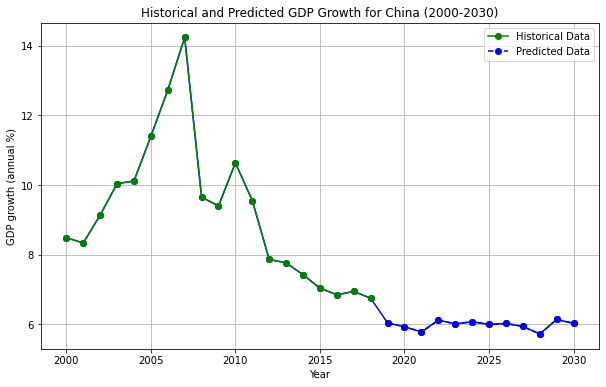

In [23]:
import matplotlib.pyplot as plt

# Function to plot historical and predicted life expectancy for a specified country
def plot_country_predictions_vs_actual(country_name):
    # Extracting predictions for the specified country
    if country_name not in country_recursive_predictions_rf:
        logger.error(f"No predictions found for {country_name}.")
        return

    predictions = country_recursive_predictions_rf[country_name]
    predicted_years = list(predictions.keys())
    predicted_values = list(predictions.values())

    # Extracting historical values for the specified country (2000-2019)
    historical_data = selected_df_2[(selected_df_2['Country Name'] == country_name) & 
                                  (selected_df_2['Year'] >= TRAIN_START_YEAR) & 
                                  (selected_df_2['Year'] <= TRAIN_END_YEAR-1)]
    historical_years = historical_data['Year'].values
    historical_values = historical_data['GDP growth (annual %)'].values

    # Combining historical and predicted data to ensure a continuous line
    combined_years = list(historical_years) + predicted_years
    combined_values = list(historical_values) + predicted_values

    # Plotting historical and predicted values as a single line
    plt.figure(figsize=(10, 6))
    plt.plot(combined_years, combined_values, color='blue', marker='o', linestyle='-')
    plt.plot(historical_years, historical_values, label='Historical Data', color='green', marker='o')
    plt.plot(predicted_years, predicted_values, label='Predicted Data', color='blue', marker='o', linestyle='--')
    plt.xlabel("Year")
    plt.ylabel("GDP growth (annual %)")
    plt.title(f"Historical and Predicted GDP Growth for {country_name} (2000-2030)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Rerun the plotting function for Canada as an example
plot_country_predictions_vs_actual("China")

In [24]:
# !pip install shap

In [25]:
# Displaying feature importances from the Random Forest model directly

# Calculating feature importances
feature_importances = model_rf.feature_importances_
feature_names = ['Year', 'Moving_Avg_2Y', 'Moving_Avg_3Y', 'Moving_Avg_5Y', 'Moving_Avg_10Y']

# Creating a DataFrame to organize and sort feature importances
import pandas as pd
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
importance_df.reset_index(drop=True, inplace=True)
importance_df

,Feature,Importance
0,Moving_Avg_2Y,0.737839
1,Moving_Avg_3Y,0.095792
2,Moving_Avg_5Y,0.068874
3,Moving_Avg_10Y,0.056200
4,Year,0.041294


In [26]:
# Converting the dictionary of predictions for each country (country_recursive_predictions_rf) into a DataFrame

# Initialize an empty list to store rows for the DataFrame
rows = []

# Loop through each country and its predictions to build the DataFrame rows
for country, predictions in country_recursive_predictions_rf.items():
    for year, life_expectancy in predictions.items():
        # Append each prediction as a new row with the country, year, and predicted value
        rows.append({'Country Name': country, 'Year': year, 'GDP growth (annual %)': life_expectancy})

# Convert the list of rows into a DataFrame
predictions_df = pd.DataFrame(rows)

# Display the first few rows of the DataFrame
predictions_df

,Country Name,Year,GDP growth (annual %)
0,Afghanistan,2019,3.572955
1,Afghanistan,2020,3.558780
2,Afghanistan,2021,3.634775
3,Afghanistan,2022,3.549564
4,Afghanistan,2023,3.630096
...,...,...,...
2304,Zimbabwe,2026,-0.344381
2305,Zimbabwe,2027,-0.448227
2306,Zimbabwe,2028,-0.502083
2307,Zimbabwe,2029,-0.264938
